In [1]:
import librosa

# Load the audio file
audio_file = "chopin.wav"
y, sr = librosa.load(audio_file, sr=44100)

# Calculate tempo
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

print("Tempo:", tempo, "beats per minute")

Tempo: 114.84375 beats per minute


In [2]:
print("Sample rate:", sr, "Hz")

Sample rate: 44100 Hz


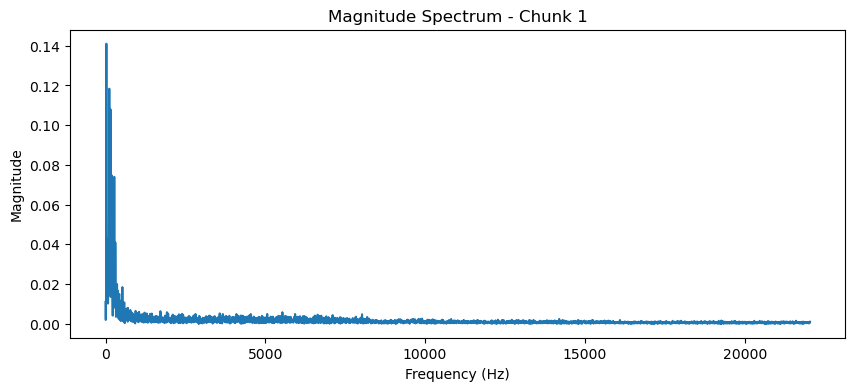

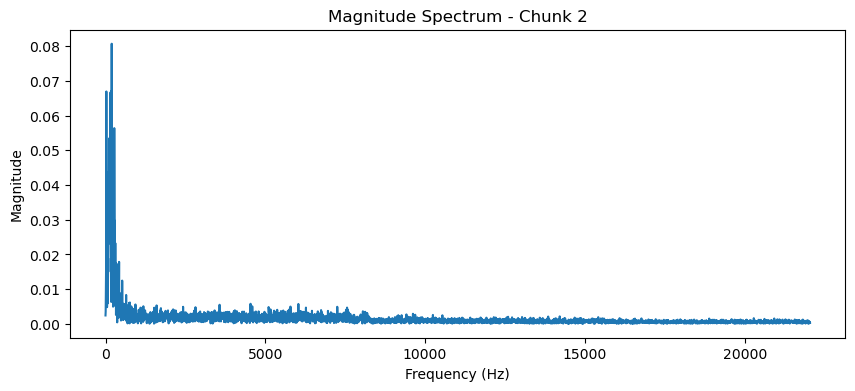

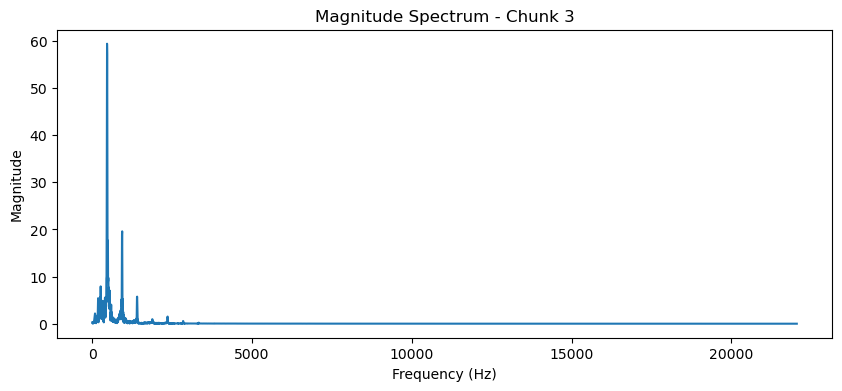

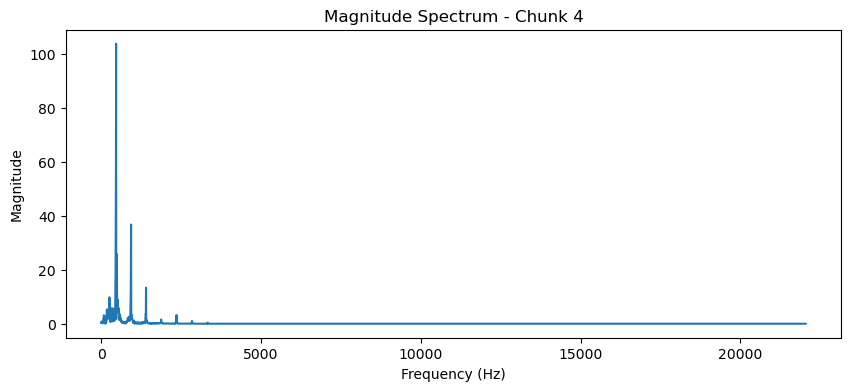

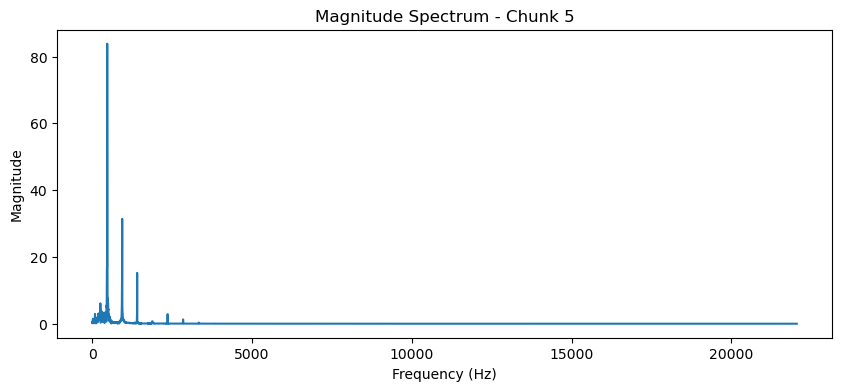

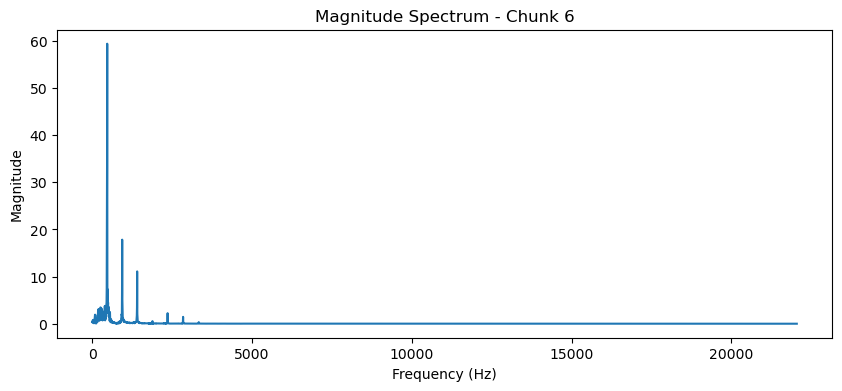

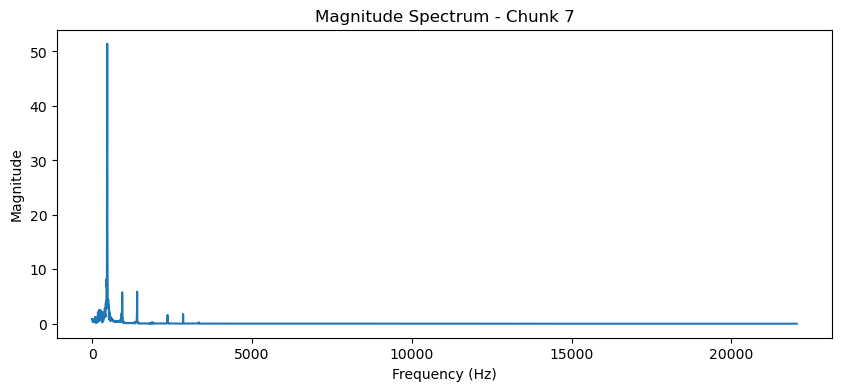

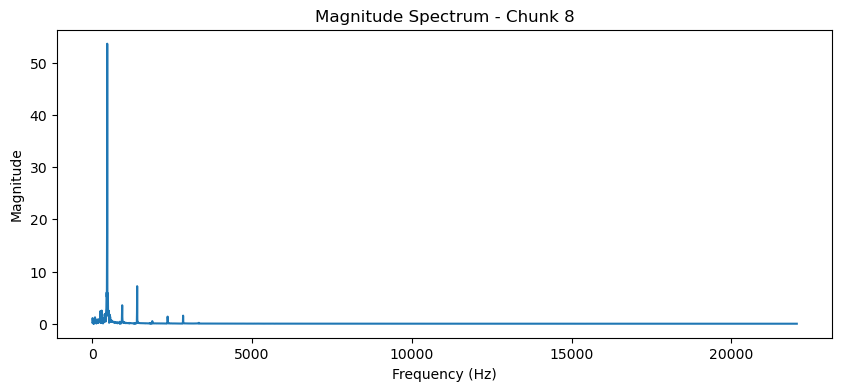

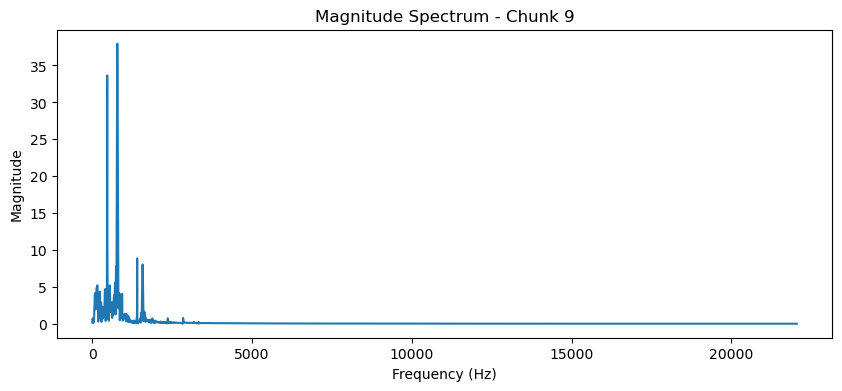

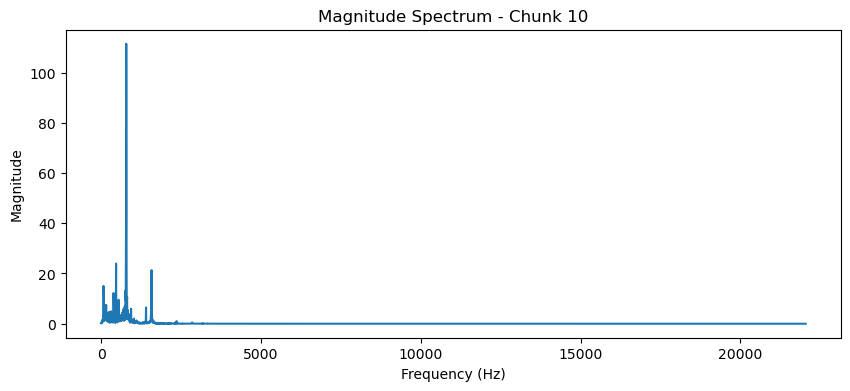

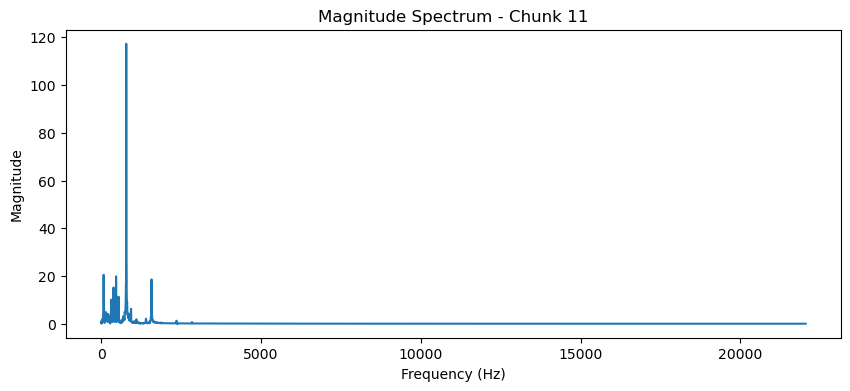

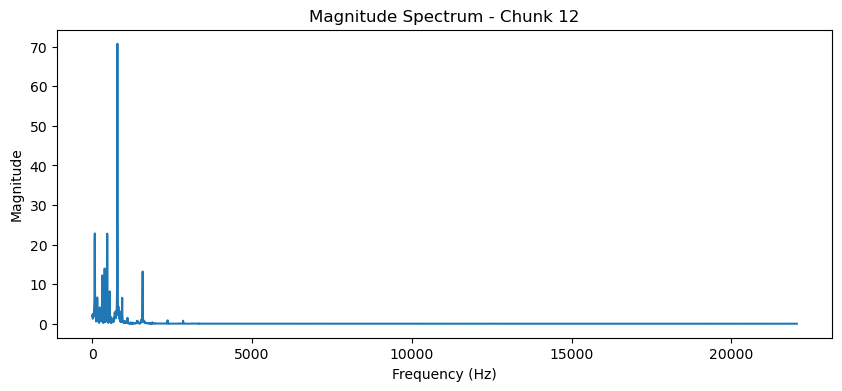

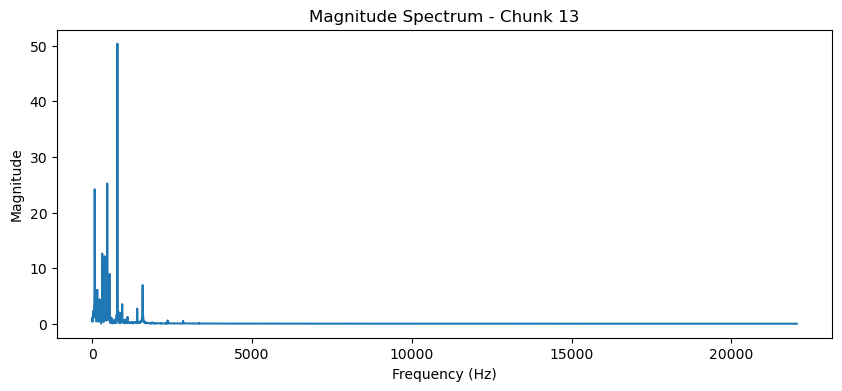

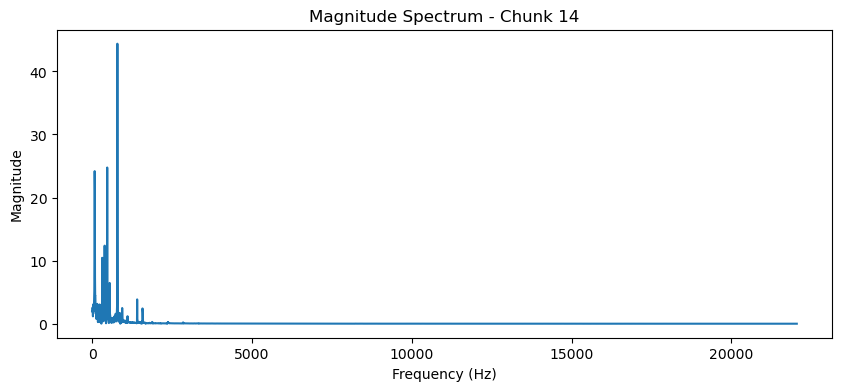

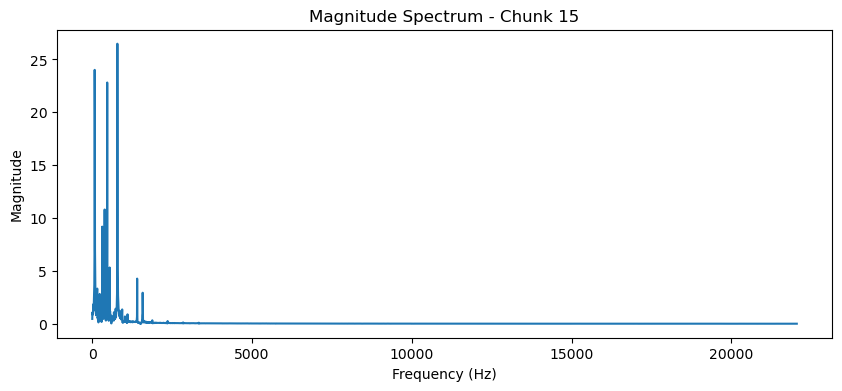

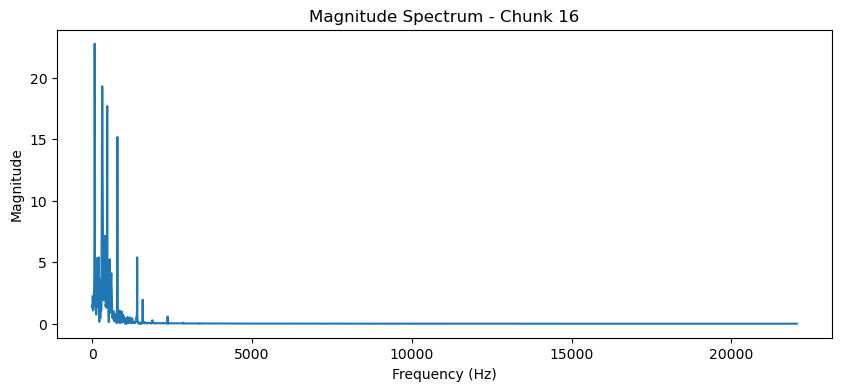

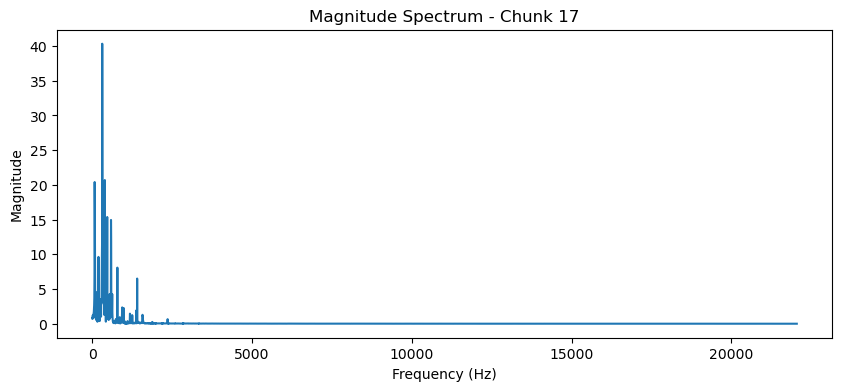

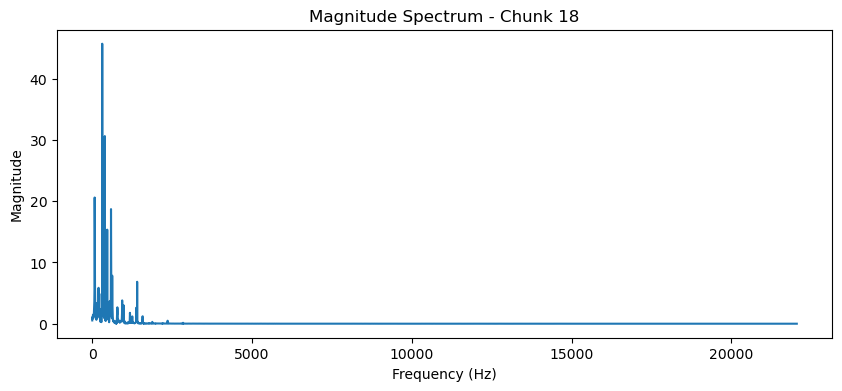

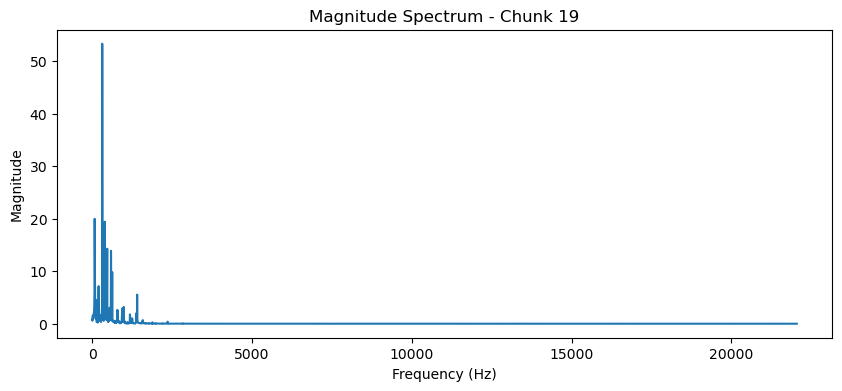

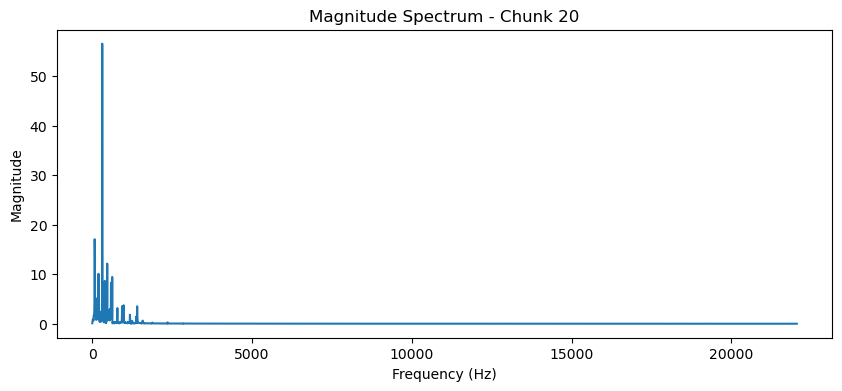

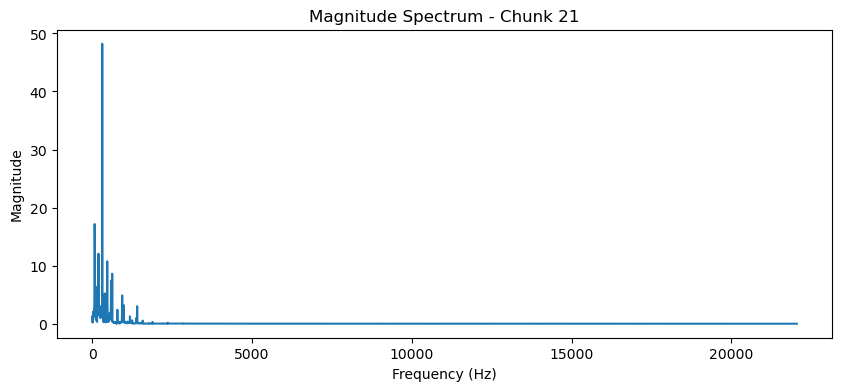

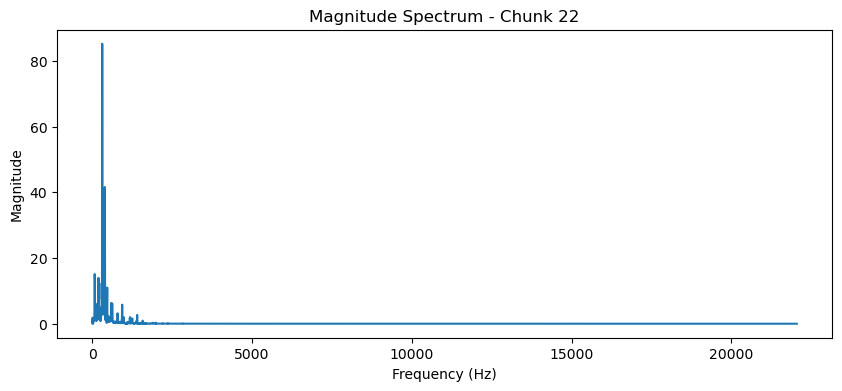

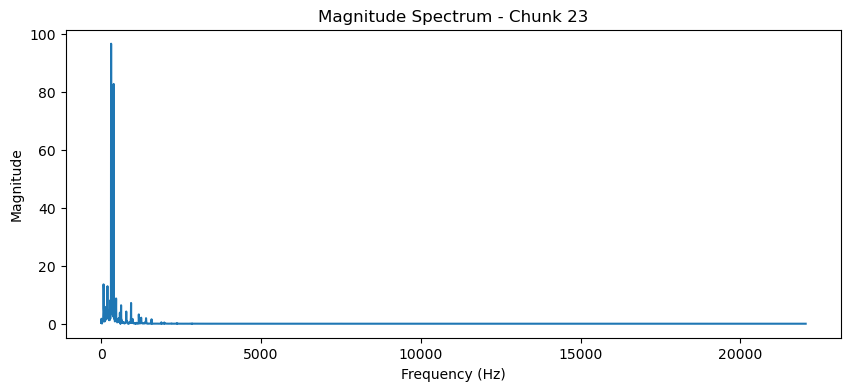

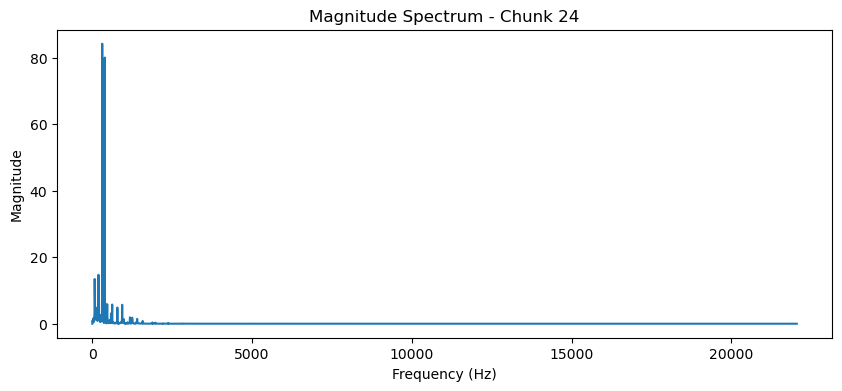

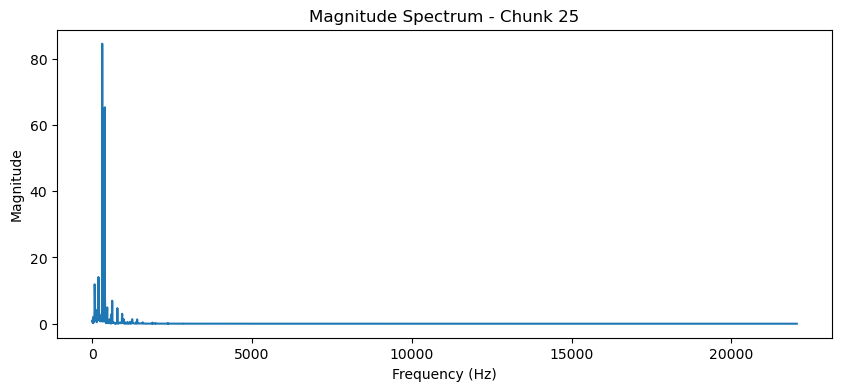

In [6]:
import numpy as np
import librosa

# Load the audio file
audio_file = "chopin.wav"
y, sr = librosa.load(audio_file, sr=None)

# Define chunk size and overlap
chunk_size = 8192  # Increase chunk size for higher resolution
overlap = 4096

# Calculate number of chunks
num_chunks = (len(y) - overlap) // (chunk_size - overlap)

# Display FFT plots for the first 25 chunks
for i in range(min(num_chunks, 25)):  # Loop over first 25 chunks or less if the audio has fewer chunks
    start = i * (chunk_size - overlap)
    end = start + chunk_size
    chunk = y[start:end]

    # Perform FFT on the chunk
    fft_result = np.fft.fft(chunk)

    # Calculate frequencies corresponding to FFT result
    frequencies = np.fft.fftfreq(len(chunk), d=1/sr)

    # Keep only positive frequencies
    positive_frequencies = frequencies[:len(chunk)//2]
    magnitude_spectrum = np.abs(fft_result)[:len(chunk)//2]

    # Plot the magnitude spectrum
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 4))
    plt.plot(positive_frequencies, magnitude_spectrum)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum - Chunk {}'.format(i+1))
    plt.show()


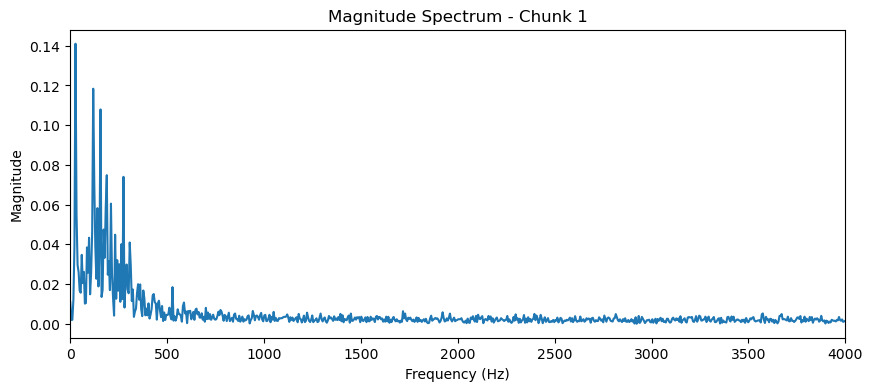

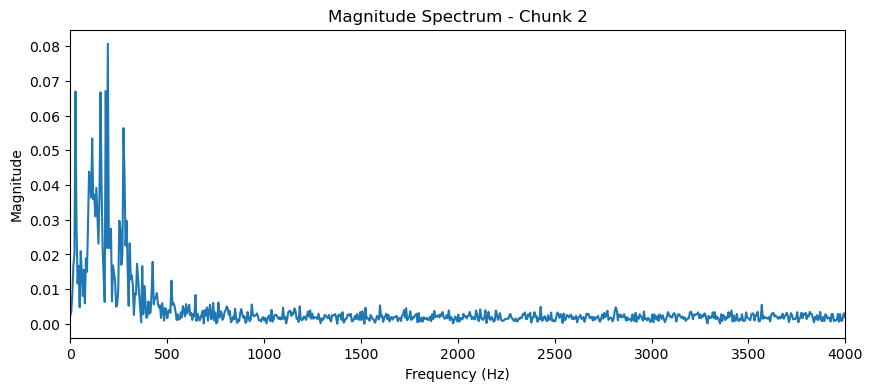

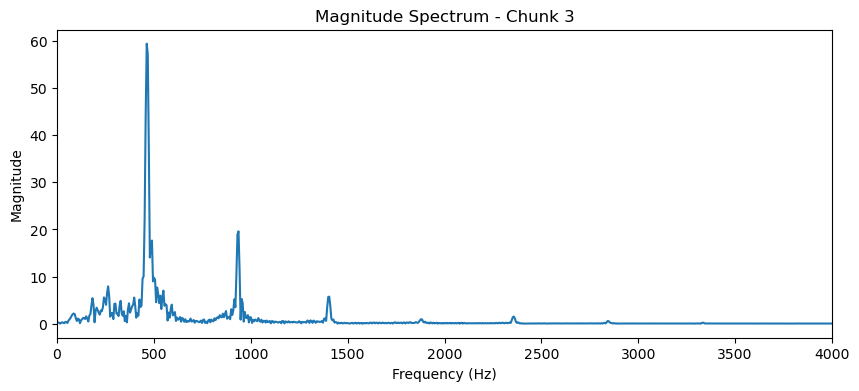

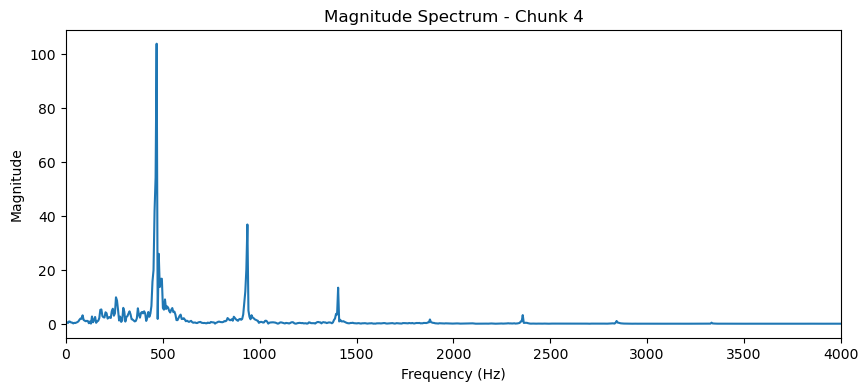

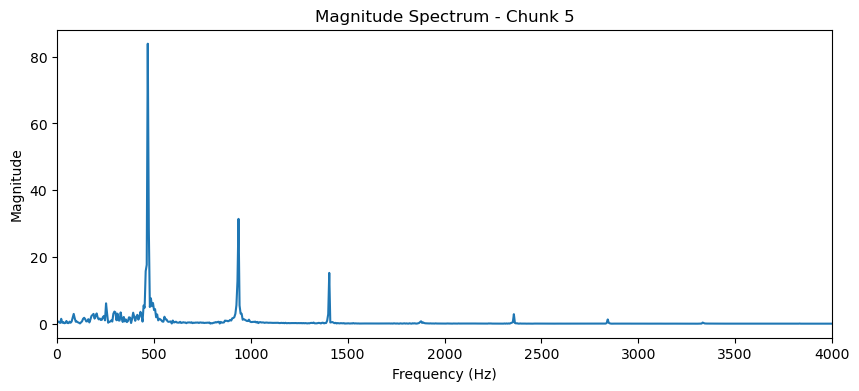

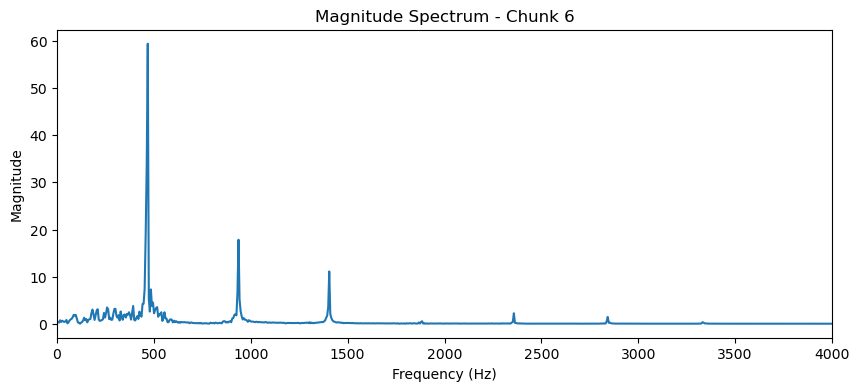

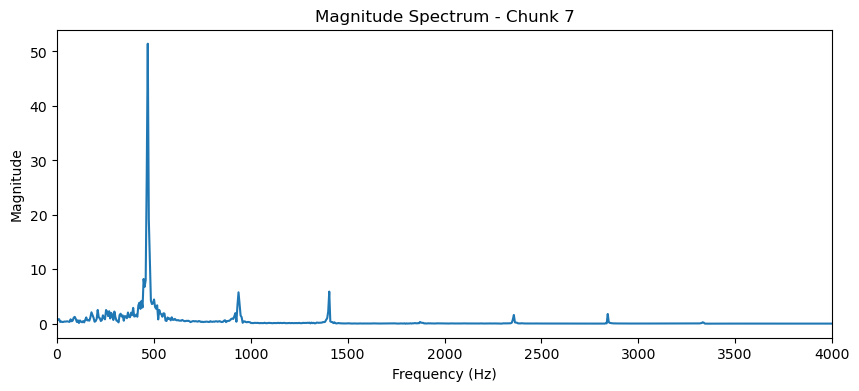

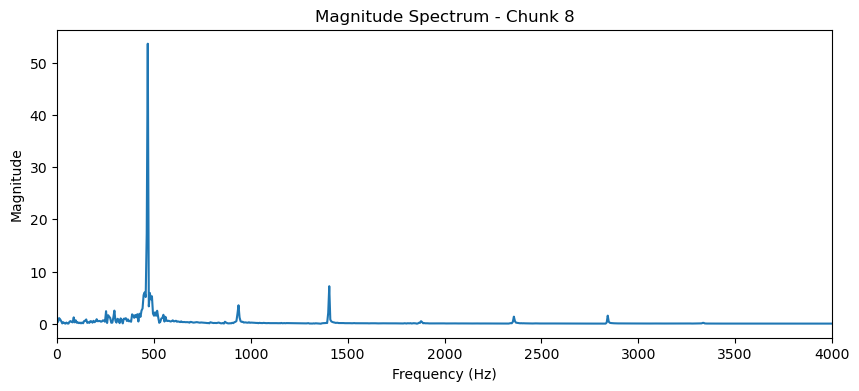

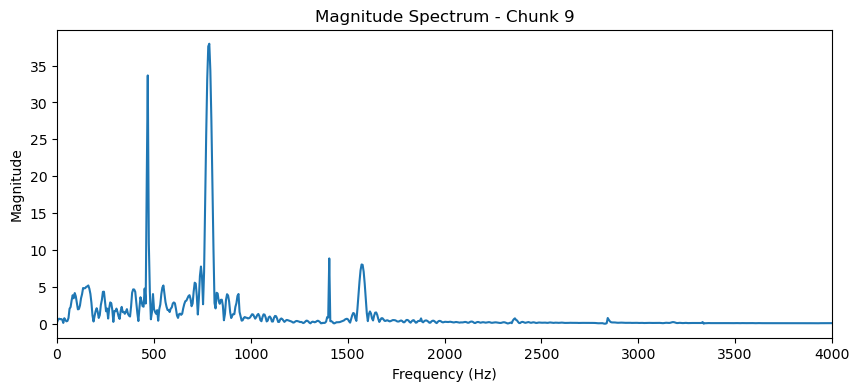

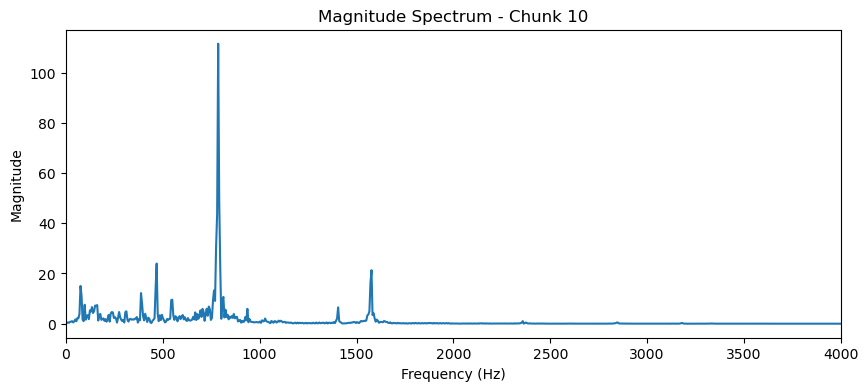

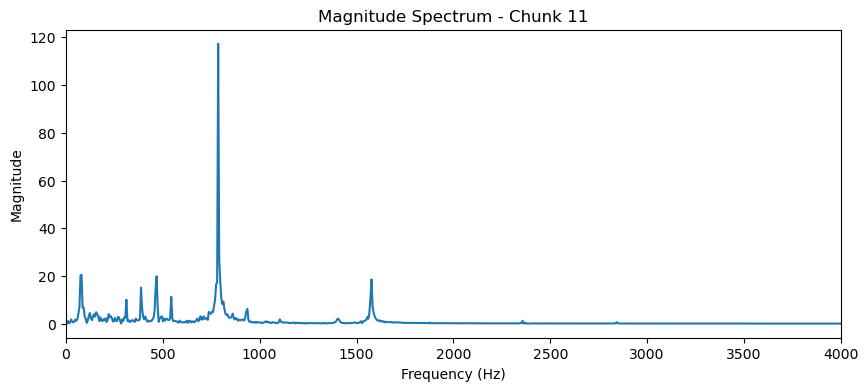

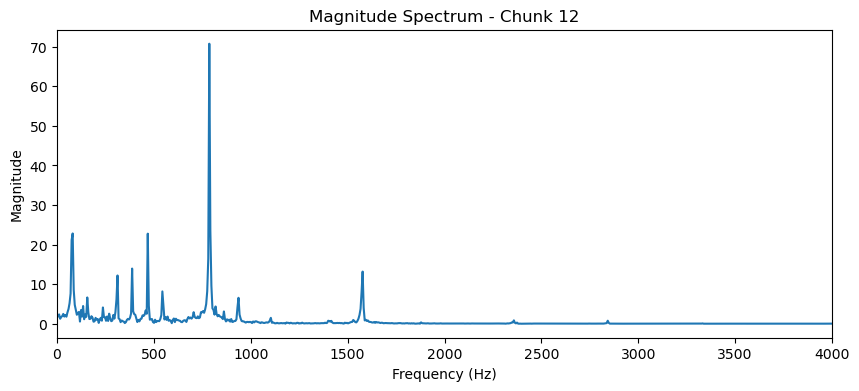

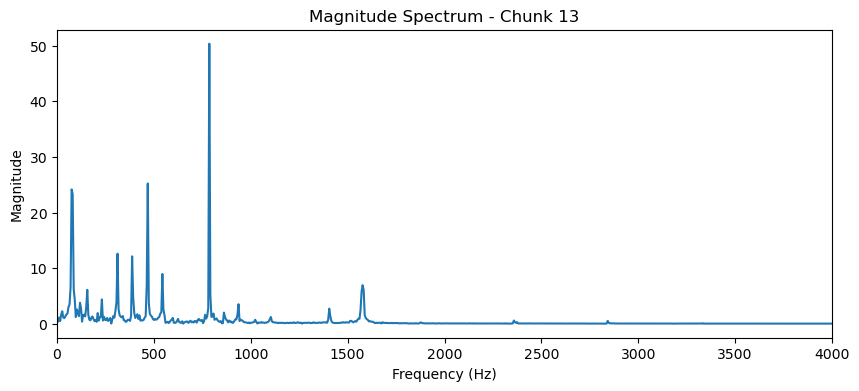

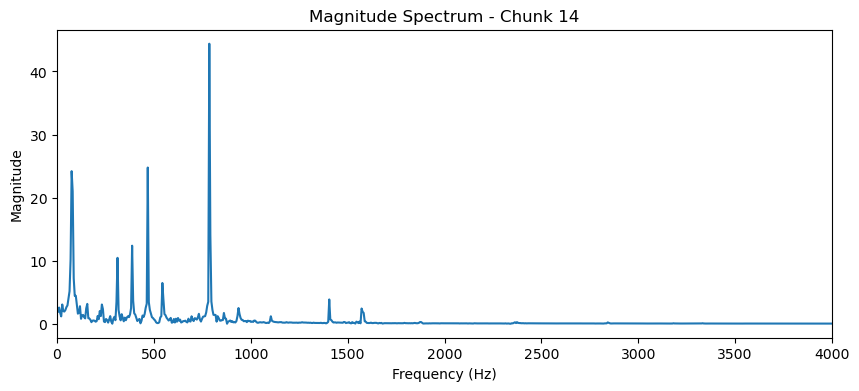

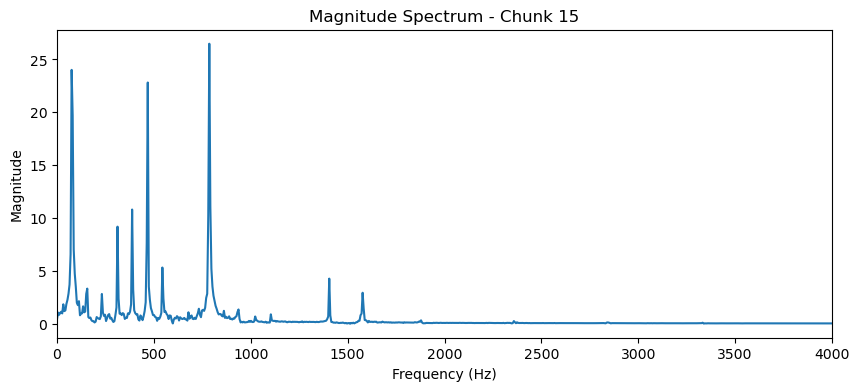

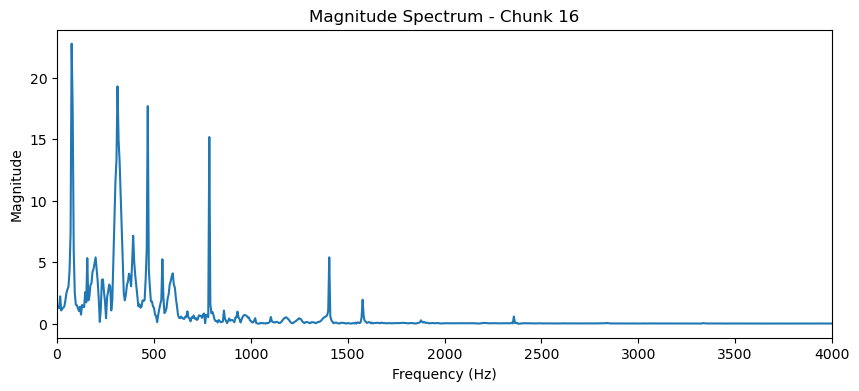

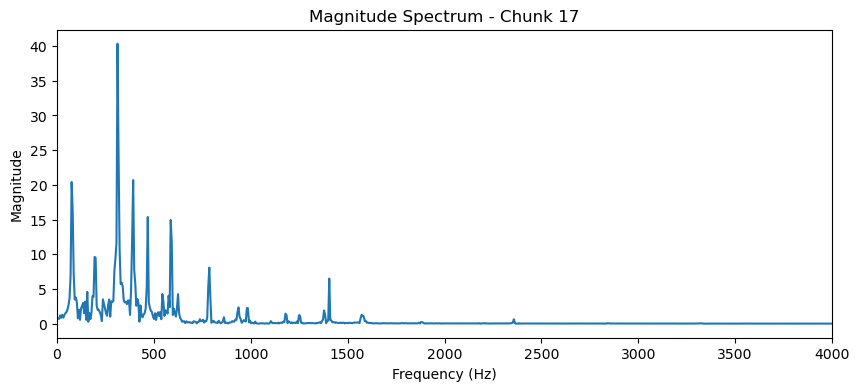

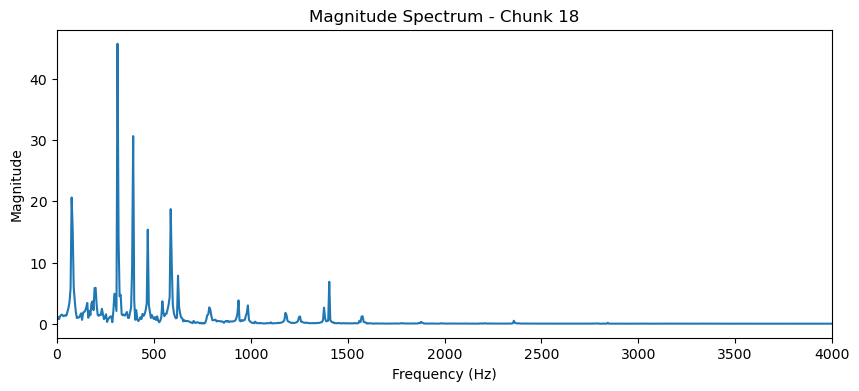

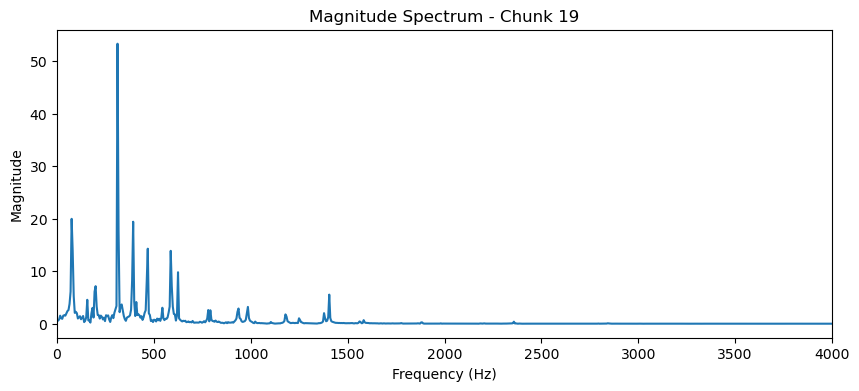

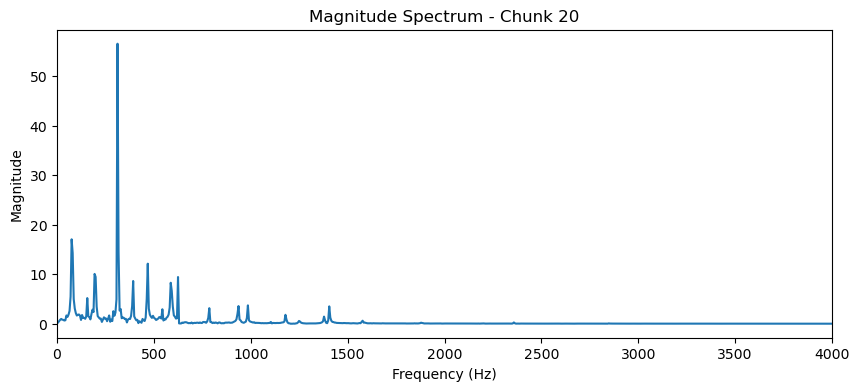

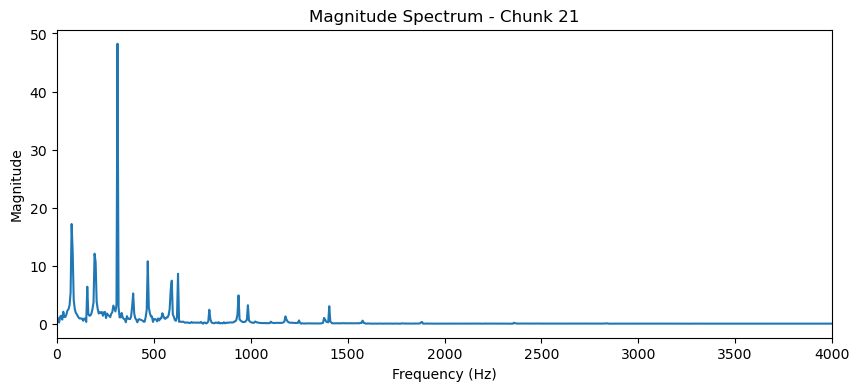

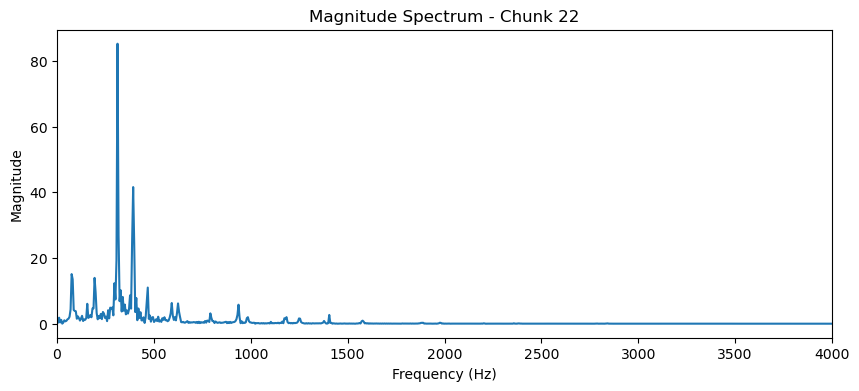

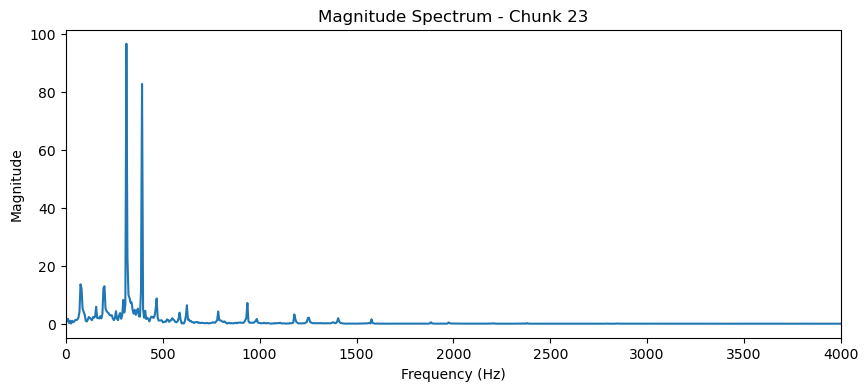

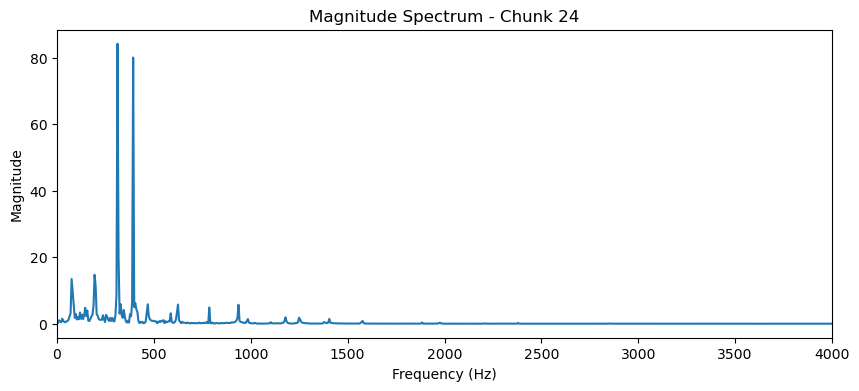

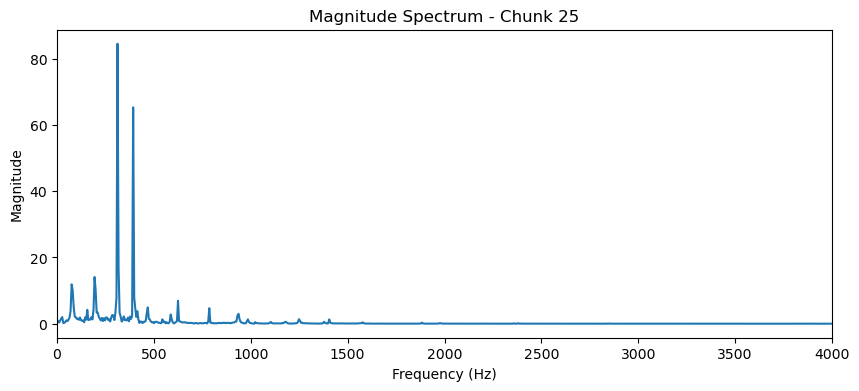

In [11]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_file = "chopin.wav"
y, sr = librosa.load(audio_file, sr=None)

# Define chunk size and overlap
chunk_size = 8192  # Increase chunk size for higher resolution
overlap = 4096

# Calculate number of chunks
num_chunks = (len(y) - overlap) // (chunk_size - overlap)

# Display FFT plots for the first 25 chunks
for i in range(min(num_chunks, 25)):  # Loop over first 25 chunks or less if the audio has fewer chunks
    start = i * (chunk_size - overlap)
    end = start + chunk_size
    chunk = y[start:end]

    # Perform FFT on the chunk
    fft_result = np.fft.fft(chunk)

    # Calculate frequencies corresponding to FFT result
    frequencies = np.fft.fftfreq(len(chunk), d=1/sr)

    # Keep only positive frequencies
    positive_frequencies = frequencies[:len(chunk)//2]
    magnitude_spectrum = np.abs(fft_result)[:len(chunk)//2]

    # Limit frequencies to 4,000 Hz
    max_frequency_index = np.argmax(positive_frequencies >= 4000)
    positive_frequencies = positive_frequencies[:max_frequency_index]
    magnitude_spectrum = magnitude_spectrum[:max_frequency_index]

    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(positive_frequencies, magnitude_spectrum)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum - Chunk {}'.format(i+1))
    plt.xlim(0, 4000)  # Limit x-axis to 4,000 Hz
    plt.show()


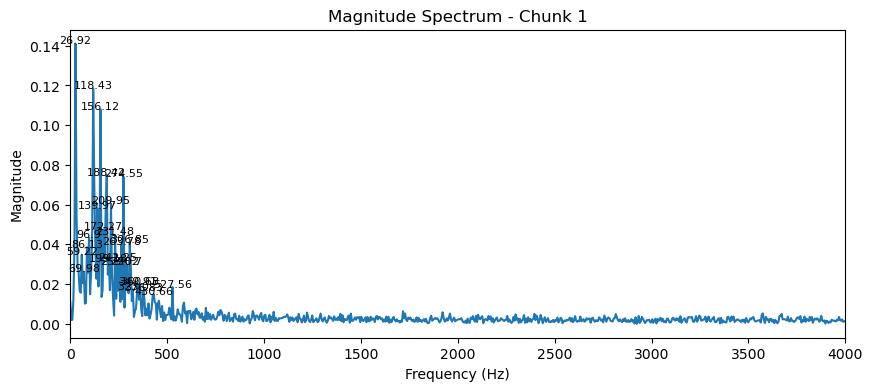

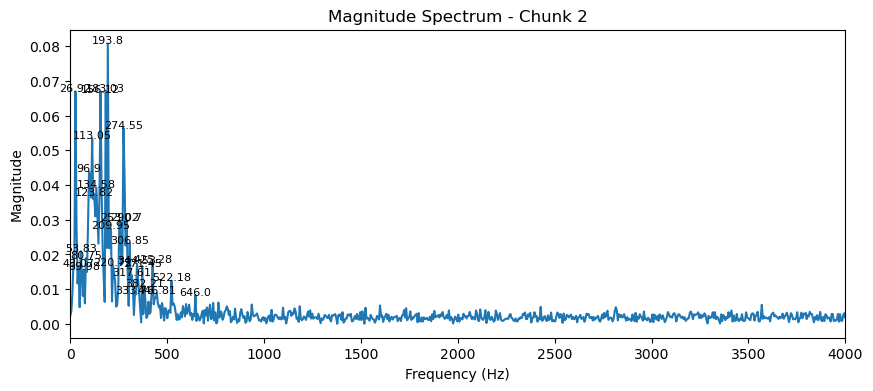

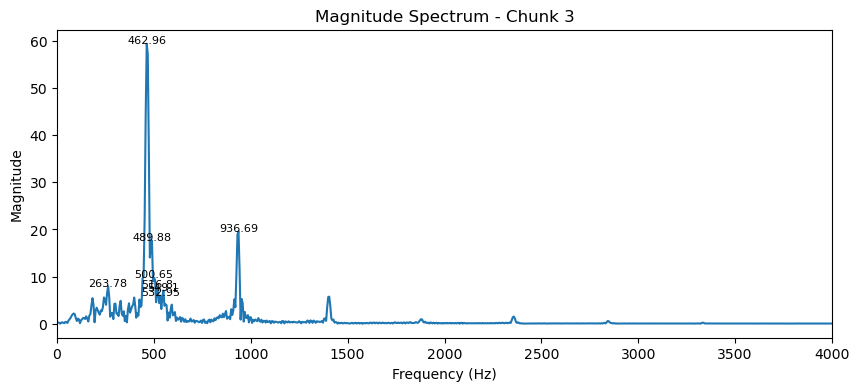

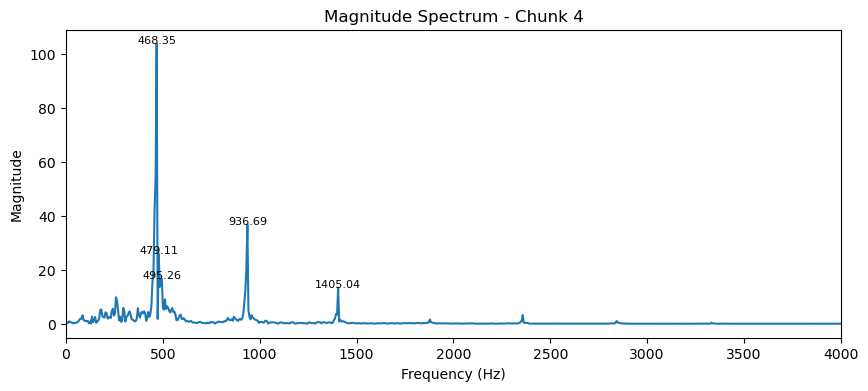

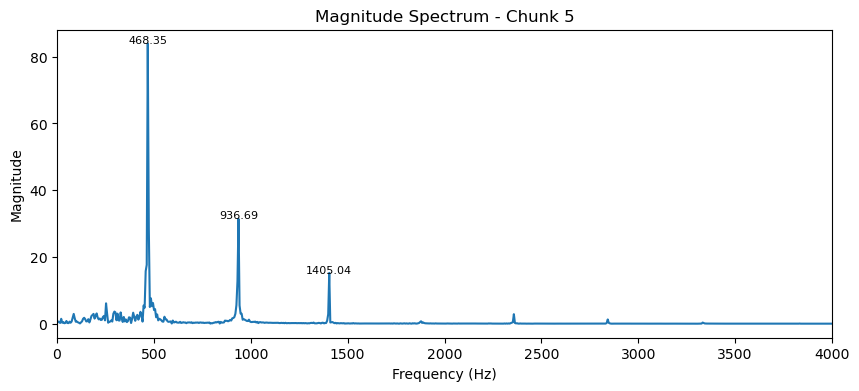

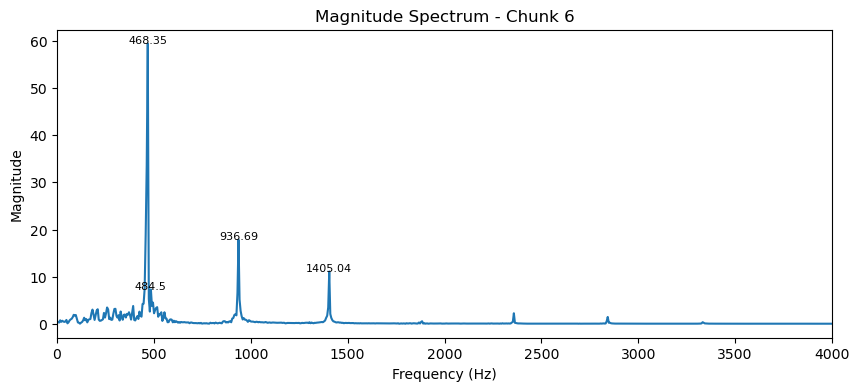

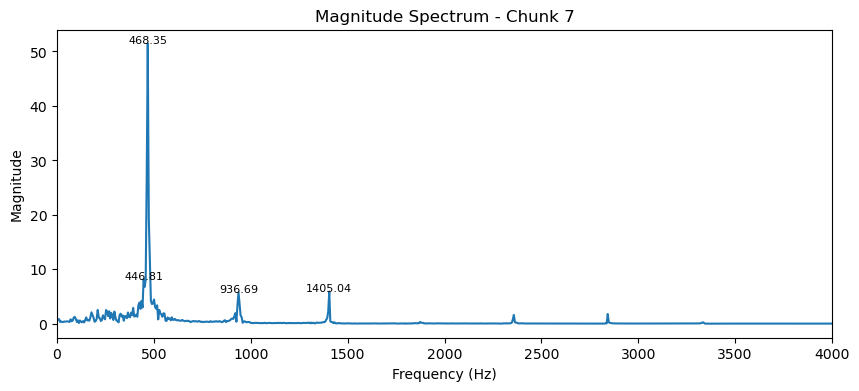

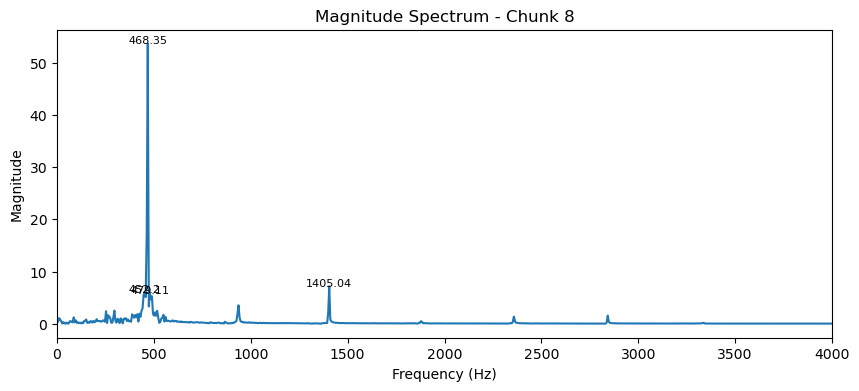

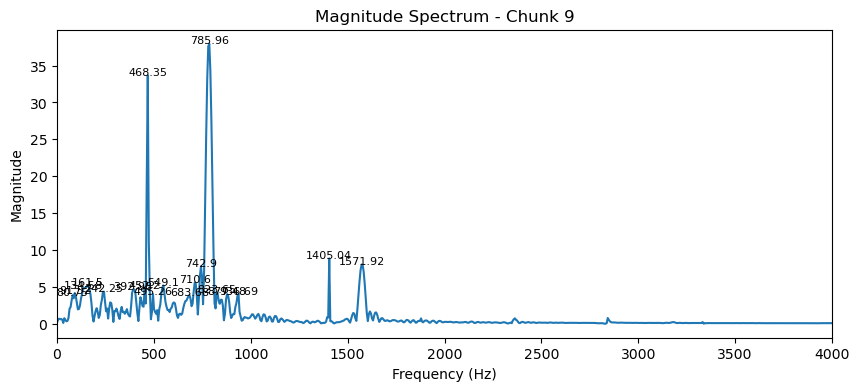

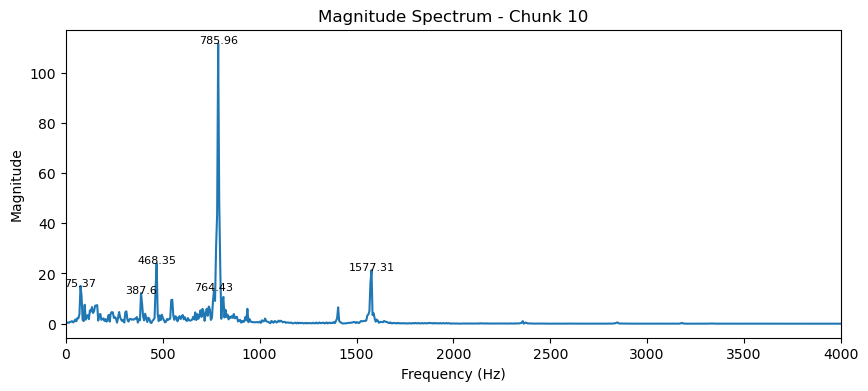

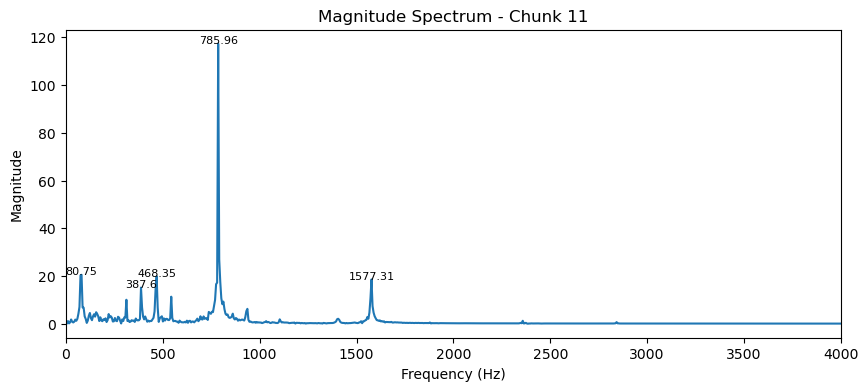

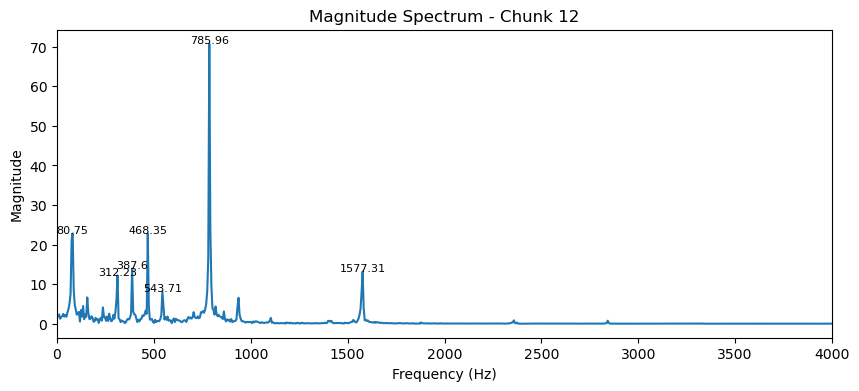

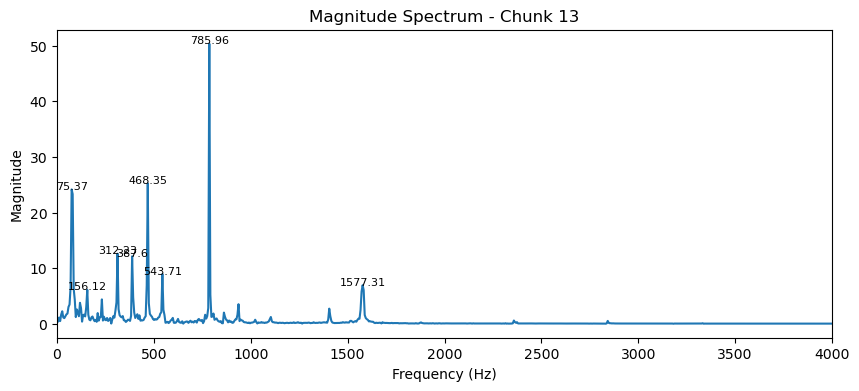

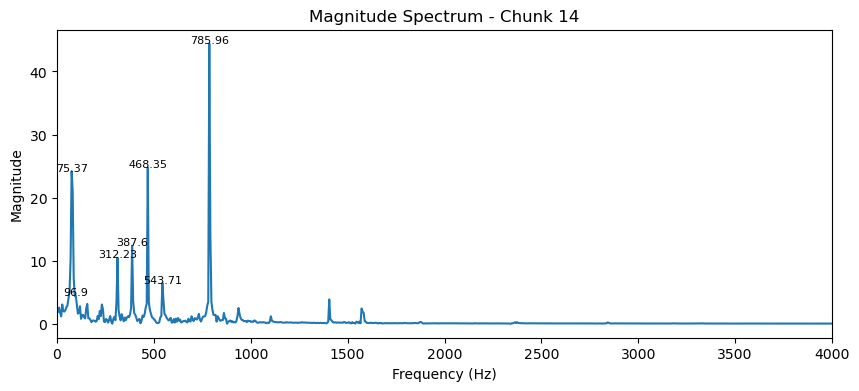

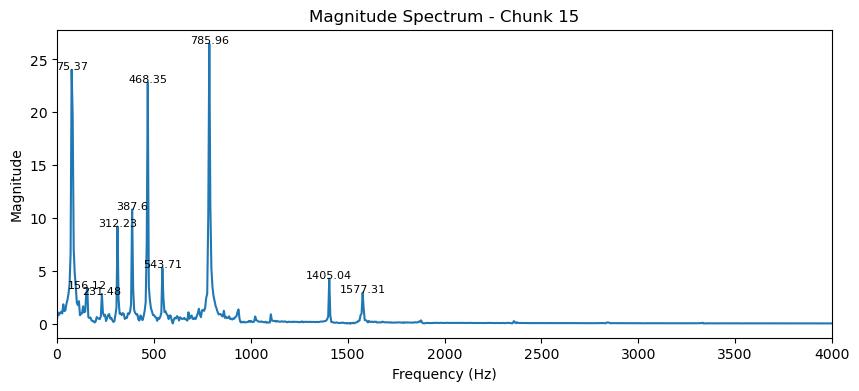

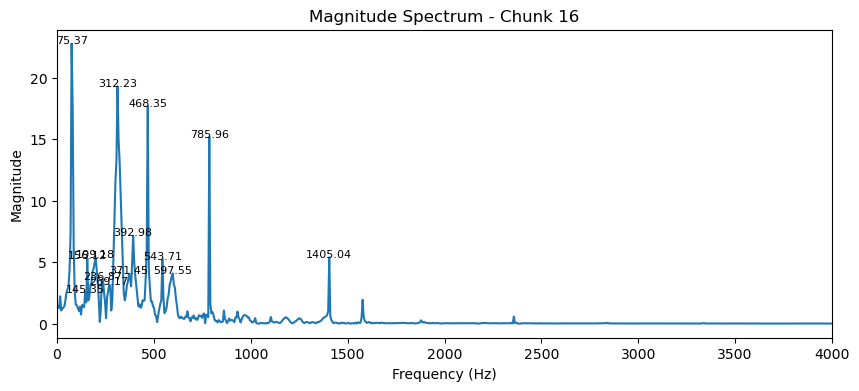

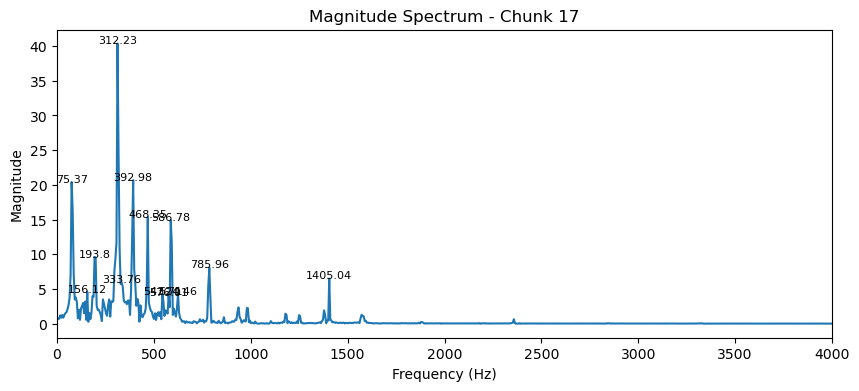

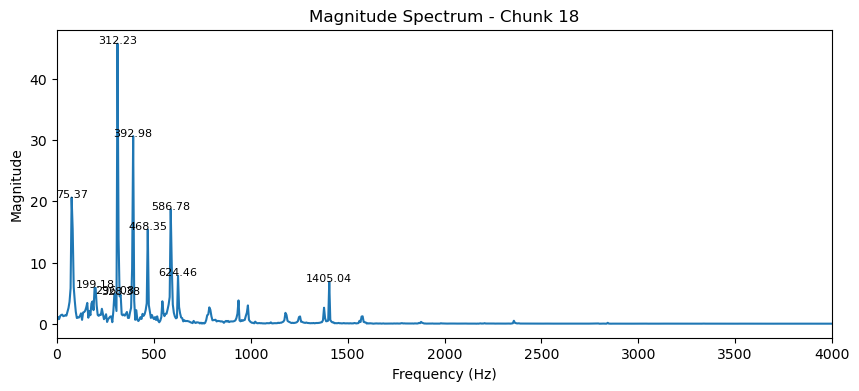

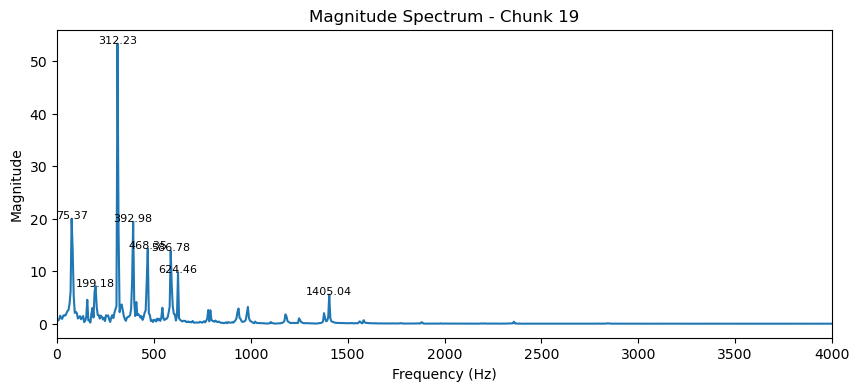

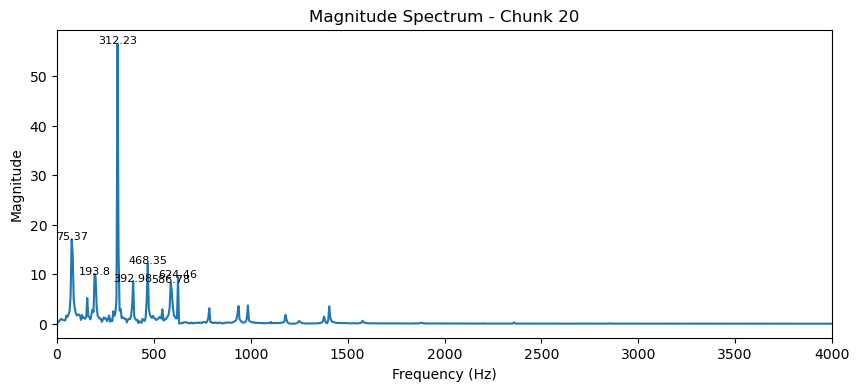

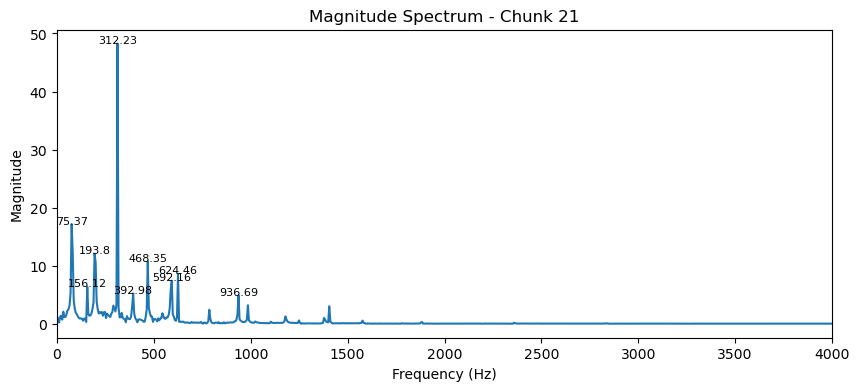

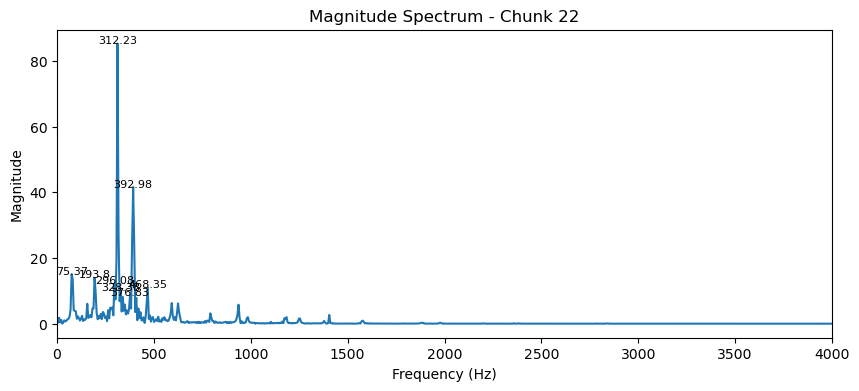

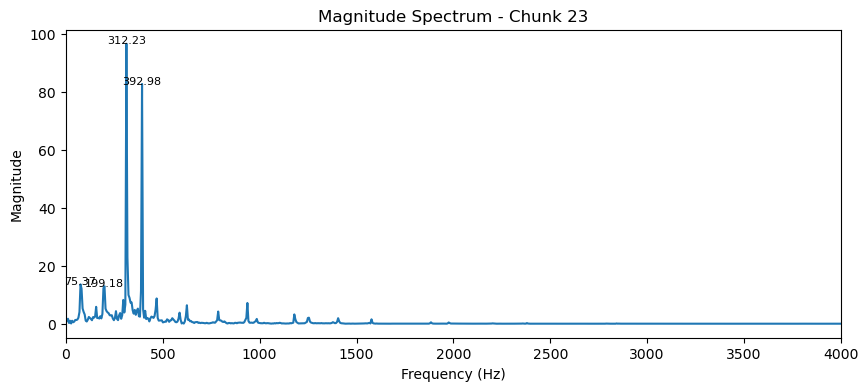

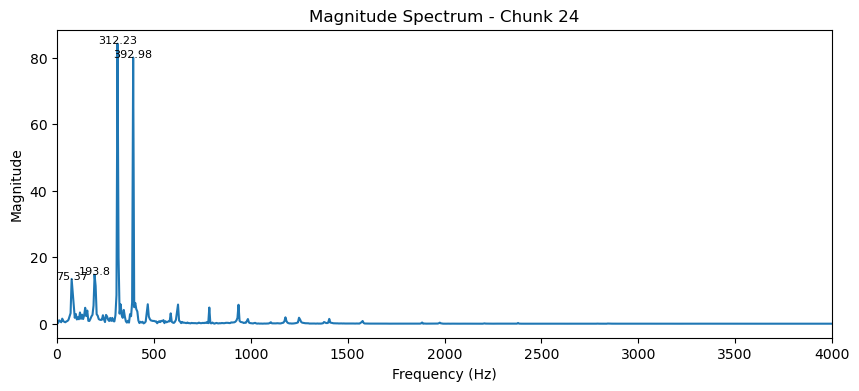

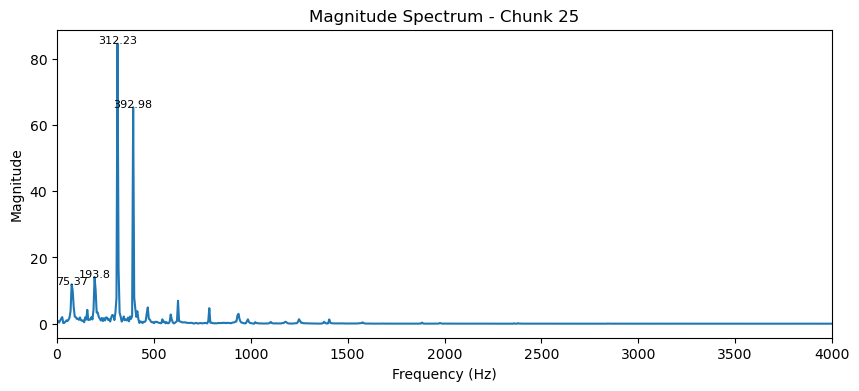

In [13]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the audio file
audio_file = "chopin.wav"
y, sr = librosa.load(audio_file, sr=None)

# Define chunk size and overlap
chunk_size = 8192  # Increase chunk size for higher resolution
overlap = 4096

# Calculate number of chunks
num_chunks = (len(y) - overlap) // (chunk_size - overlap)

# Display FFT plots for the first 25 chunks
for i in range(min(num_chunks, 25)):  # Loop over first 25 chunks or less if the audio has fewer chunks
    start = i * (chunk_size - overlap)
    end = start + chunk_size
    chunk = y[start:end]

    # Perform FFT on the chunk
    fft_result = np.fft.fft(chunk)

    # Calculate frequencies corresponding to FFT result
    frequencies = np.fft.fftfreq(len(chunk), d=1/sr)

    # Keep only positive frequencies
    positive_frequencies = frequencies[:len(chunk)//2]
    magnitude_spectrum = np.abs(fft_result)[:len(chunk)//2]

    # Limit frequencies to 4,000 Hz
    max_frequency_index = np.argmax(positive_frequencies >= 4000)
    positive_frequencies = positive_frequencies[:max_frequency_index]
    magnitude_spectrum = magnitude_spectrum[:max_frequency_index]

    # Find peaks above a certain threshold
    peaks, _ = find_peaks(magnitude_spectrum, height=np.max(magnitude_spectrum) * 0.1)

    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(positive_frequencies, magnitude_spectrum)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum - Chunk {}'.format(i+1))
    plt.xlim(0, 4000)  # Limit x-axis to 4,000 Hz

    # Annotate significant peaks
    for peak in peaks:
        plt.text(positive_frequencies[peak], magnitude_spectrum[peak], str(round(positive_frequencies[peak], 2)), fontsize=8, ha='center')

    plt.show()


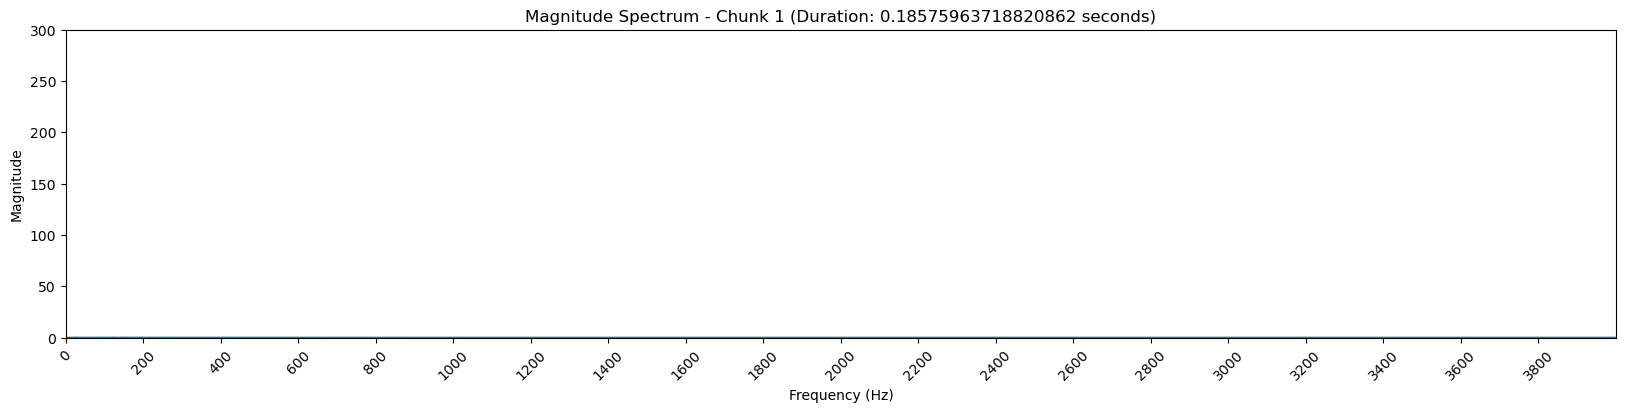

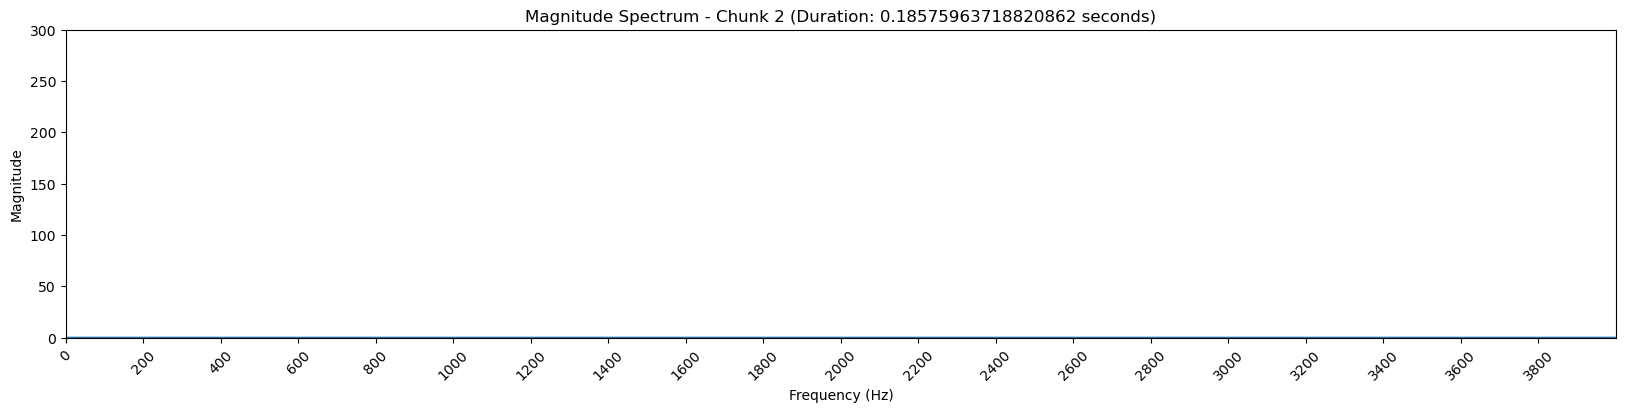

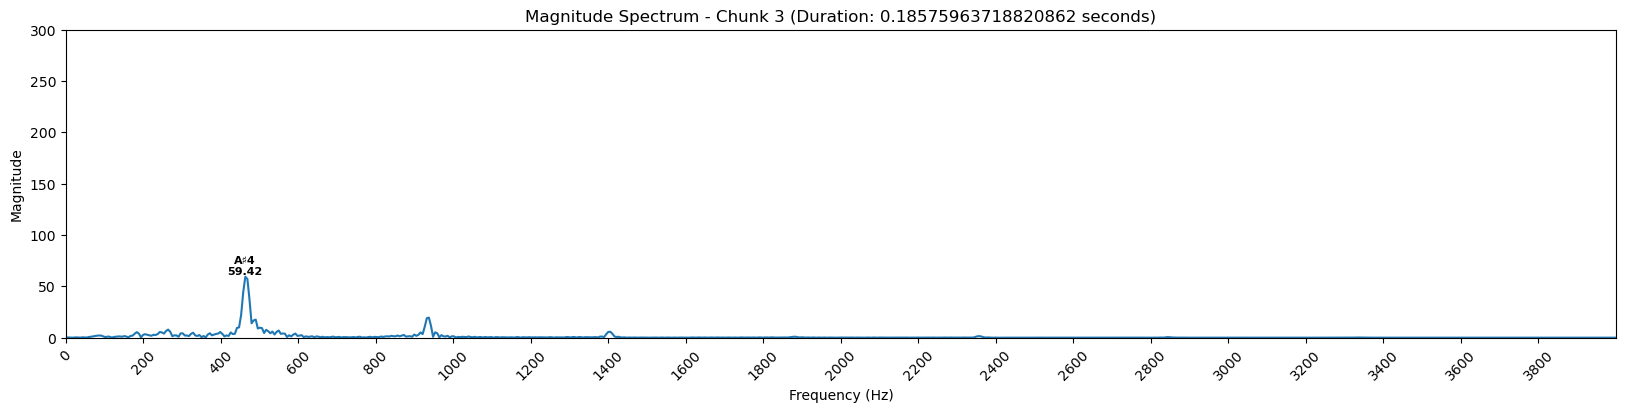

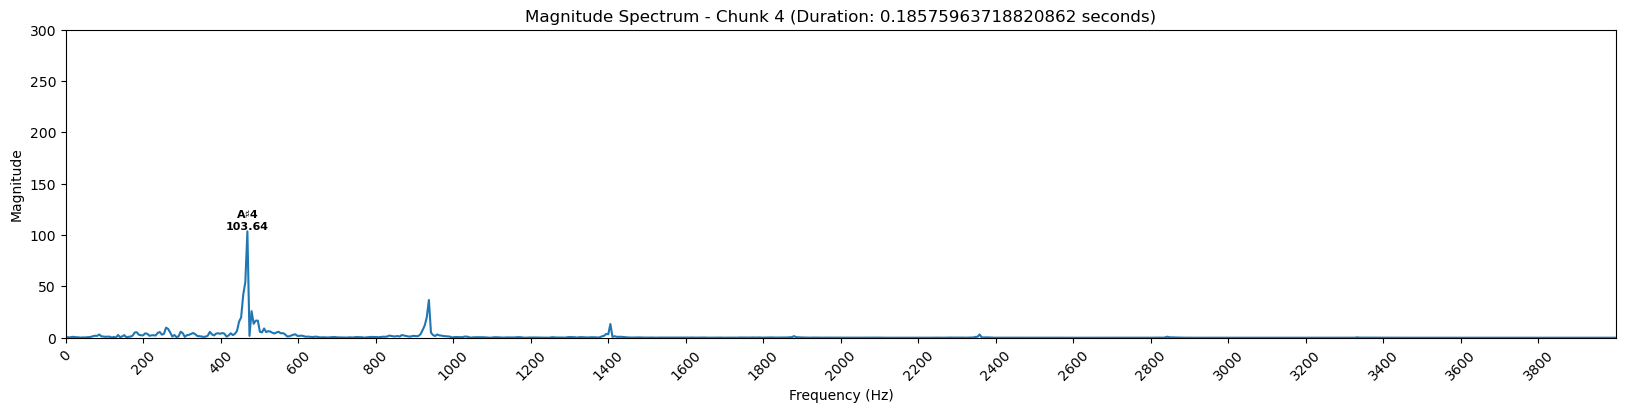

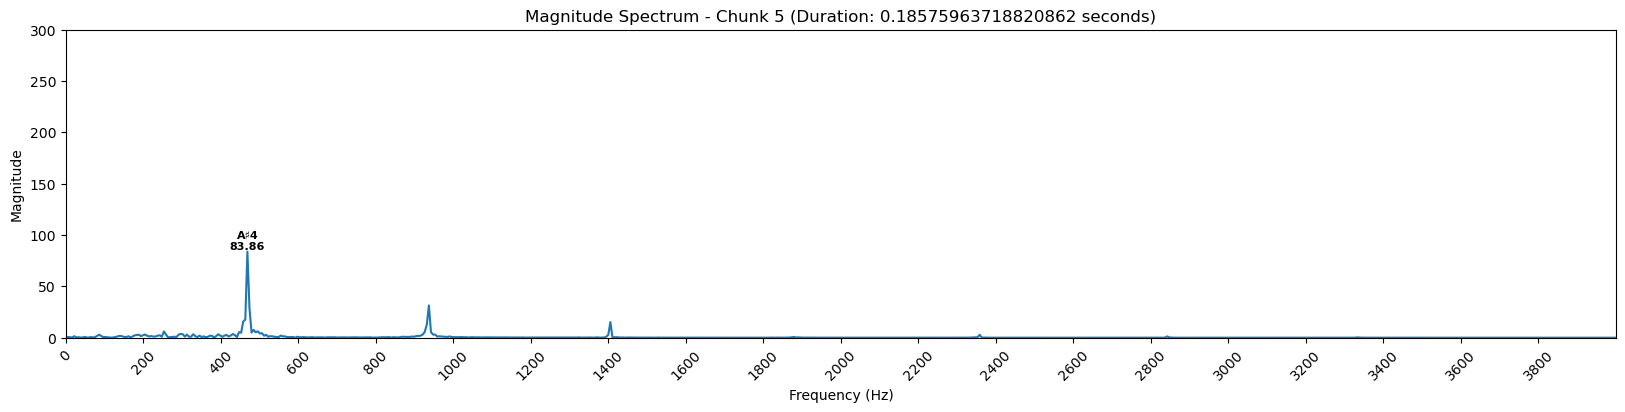

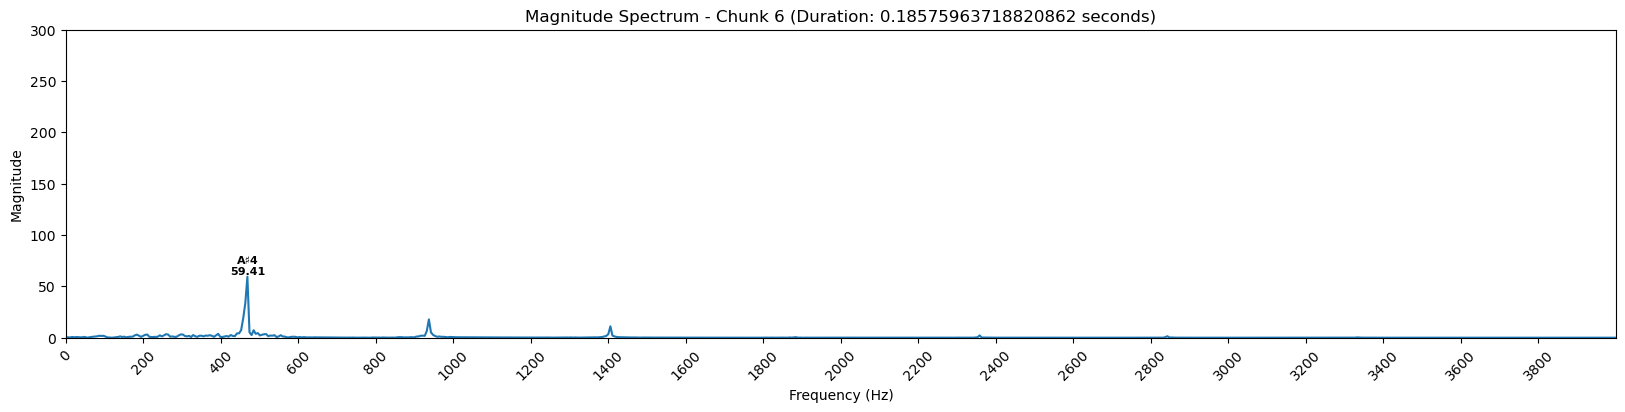

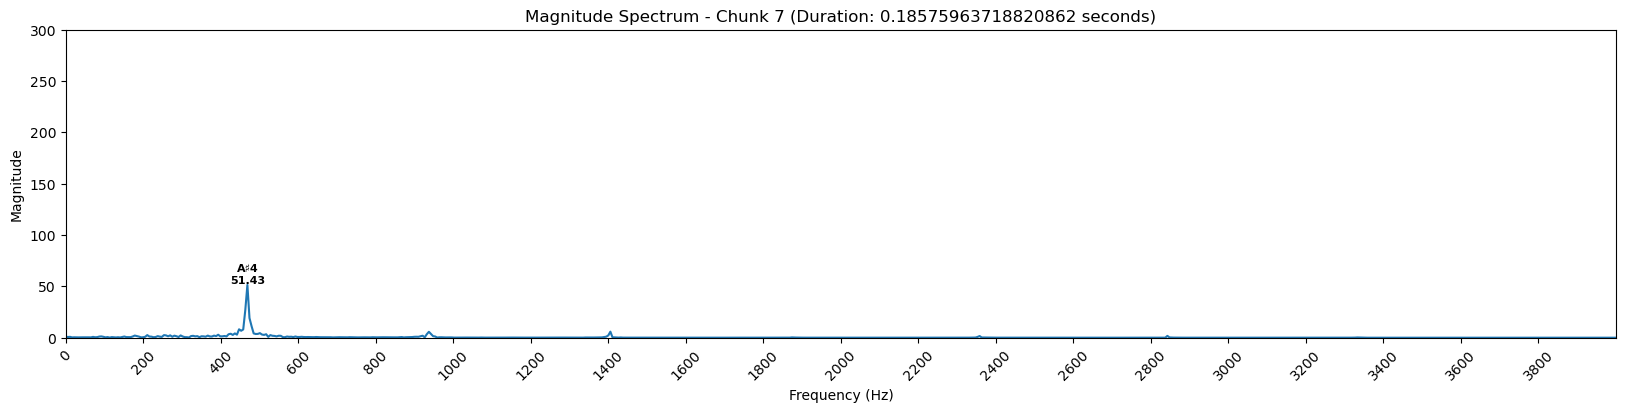

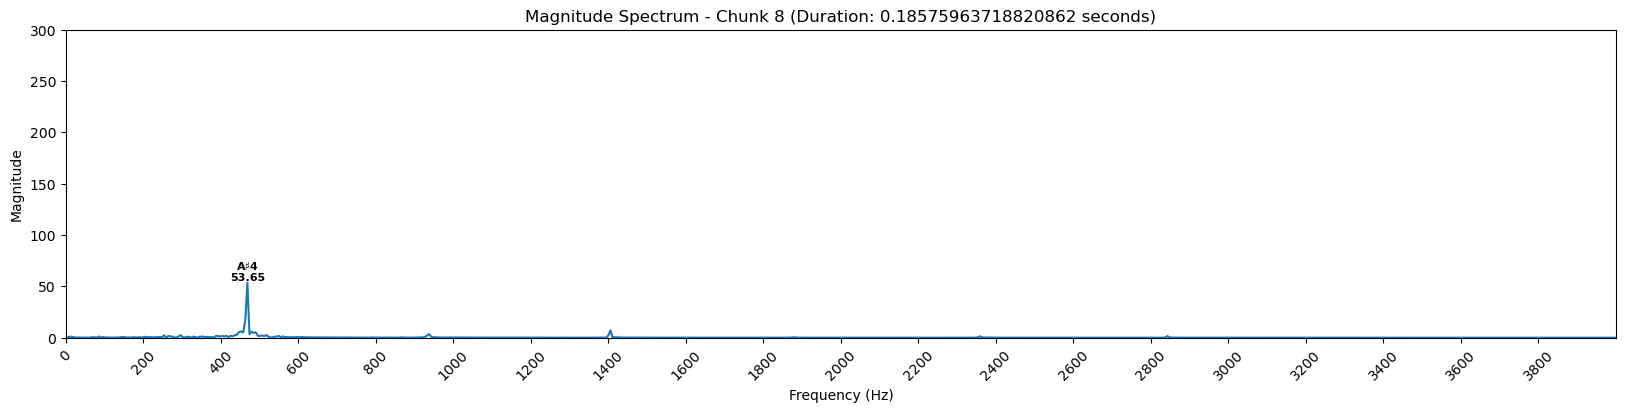

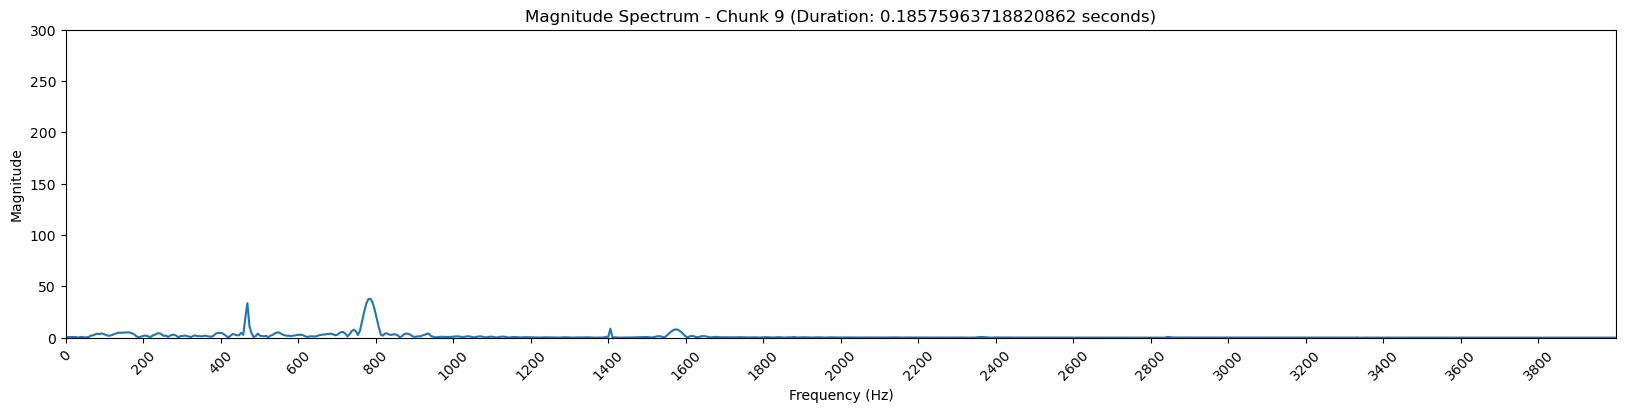

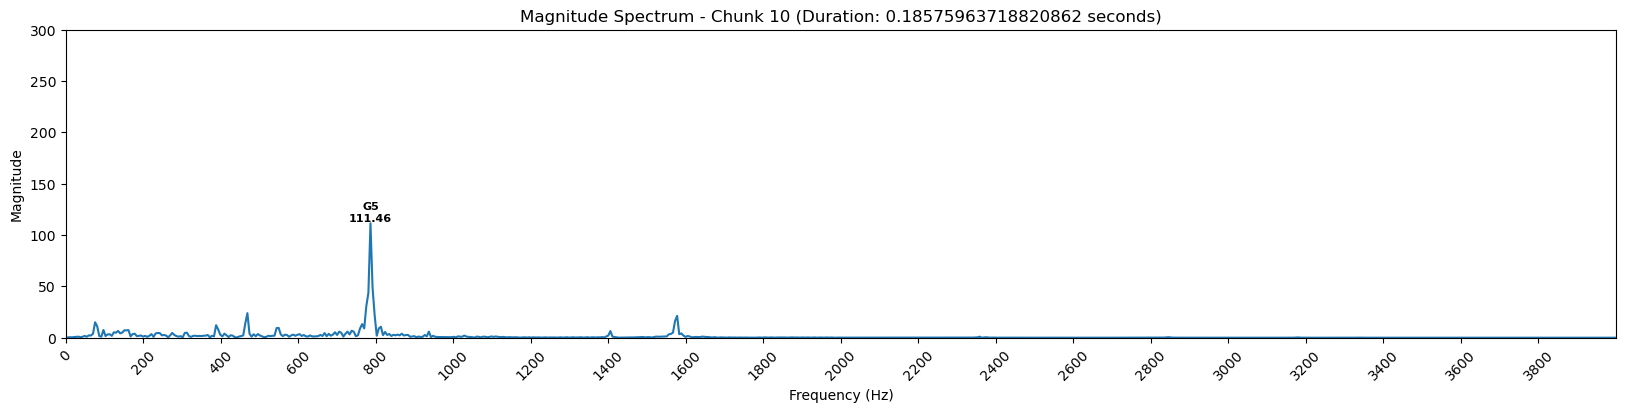

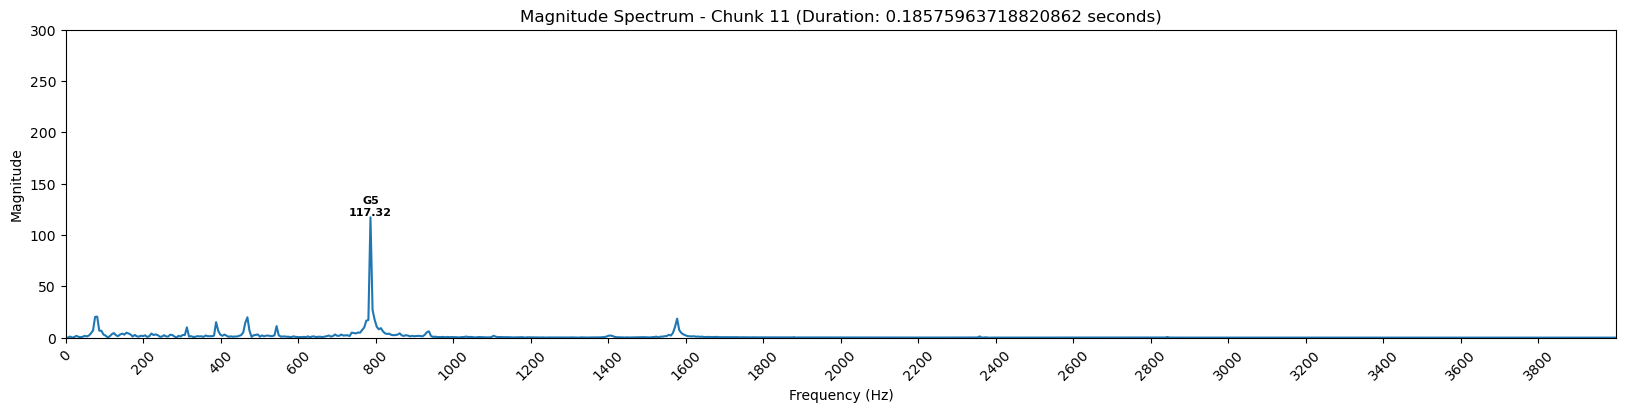

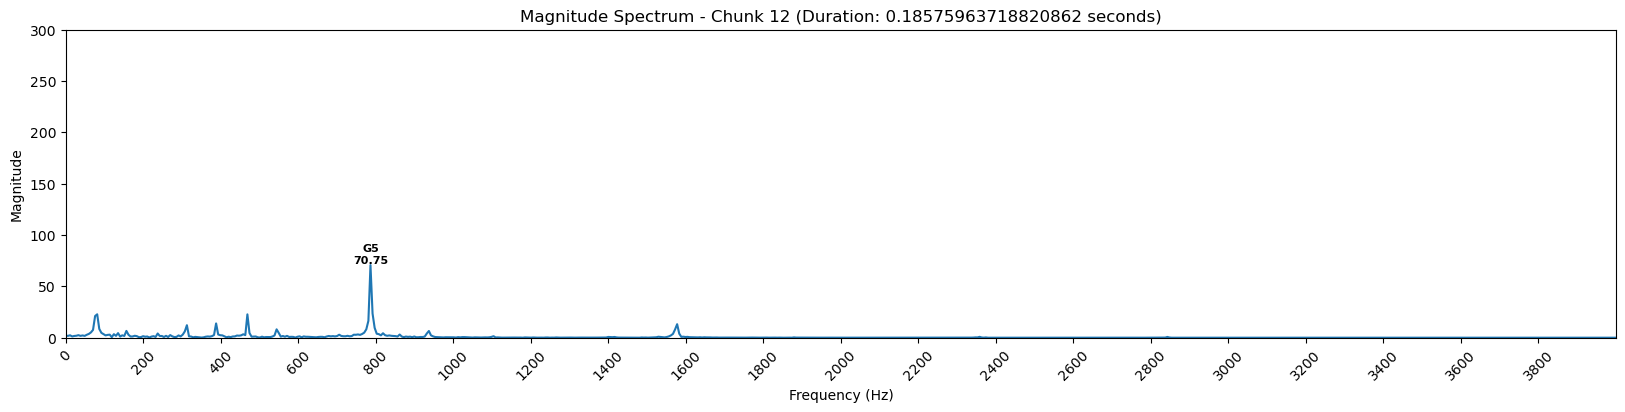

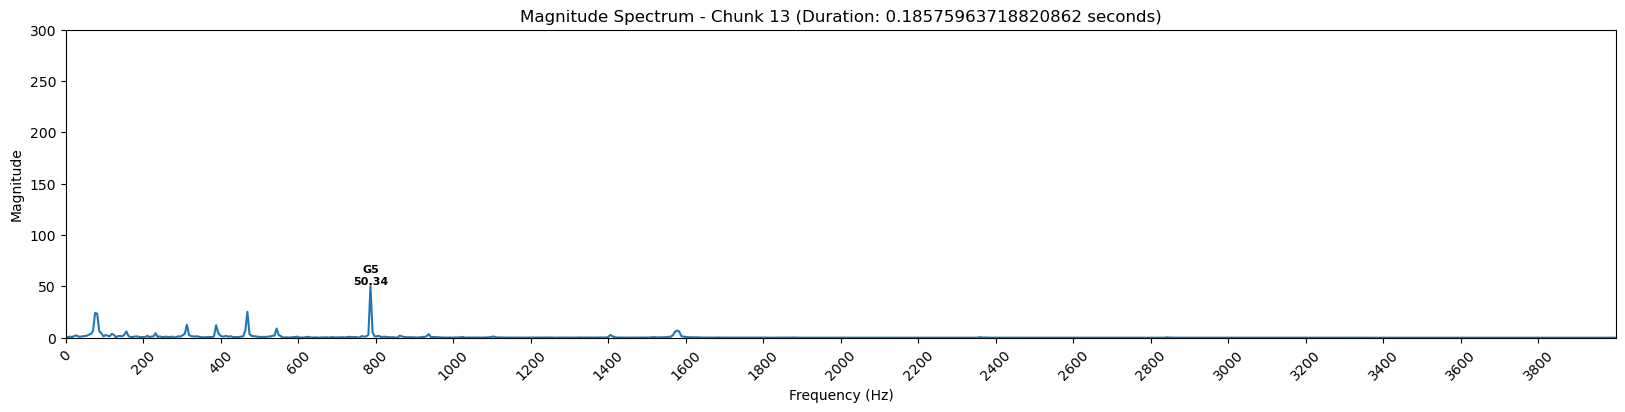

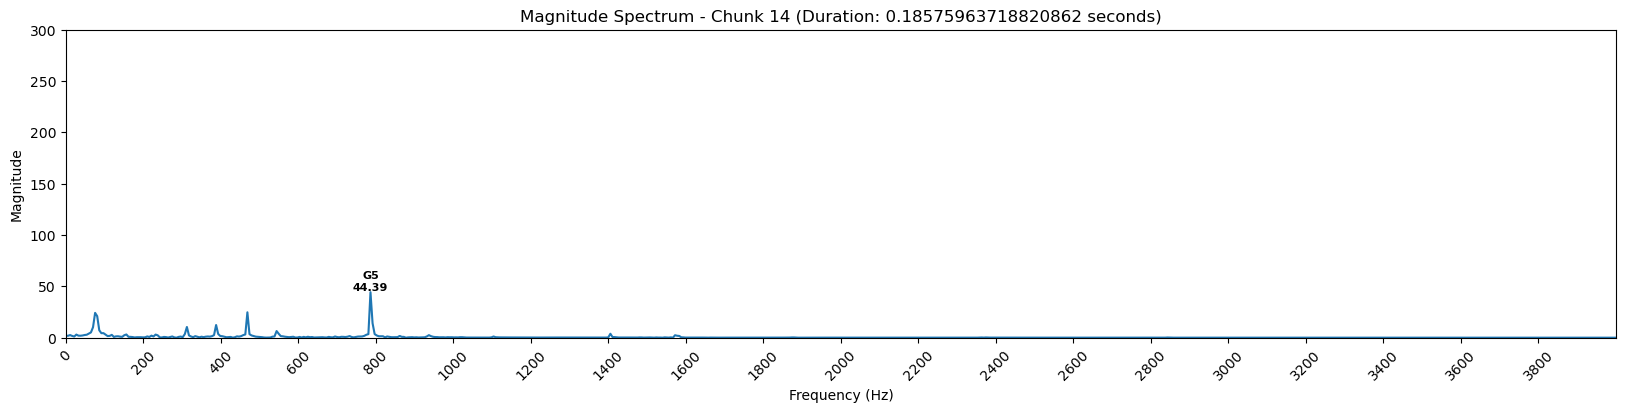

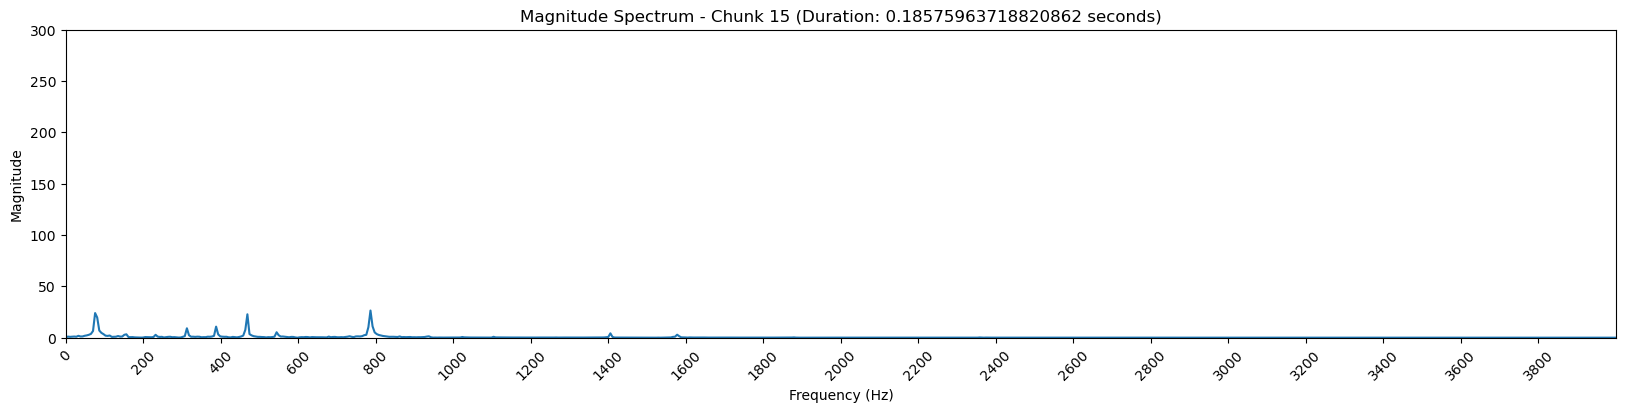

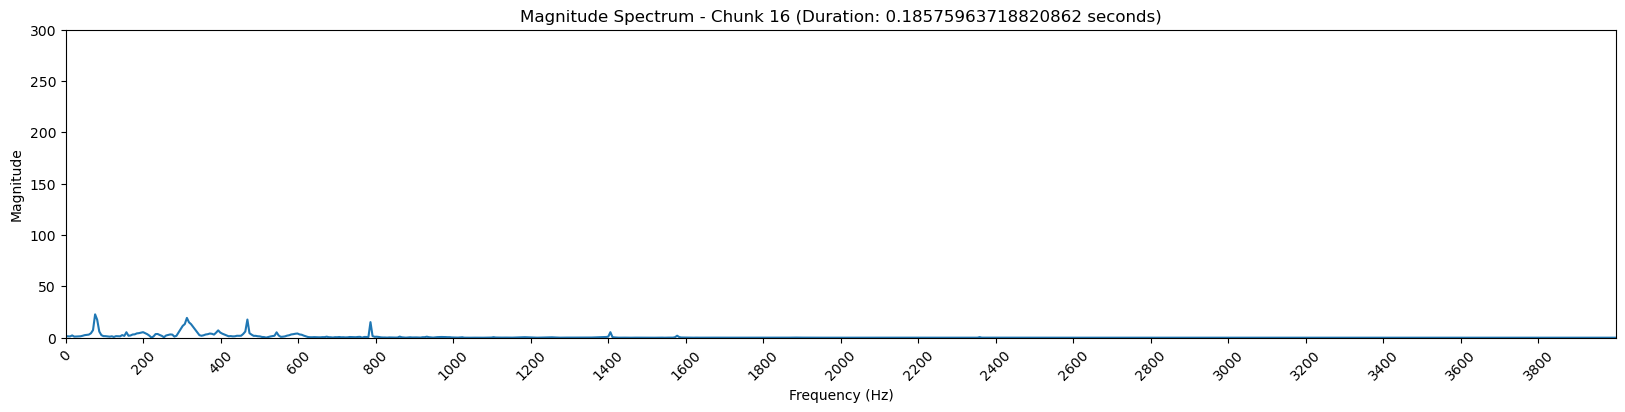

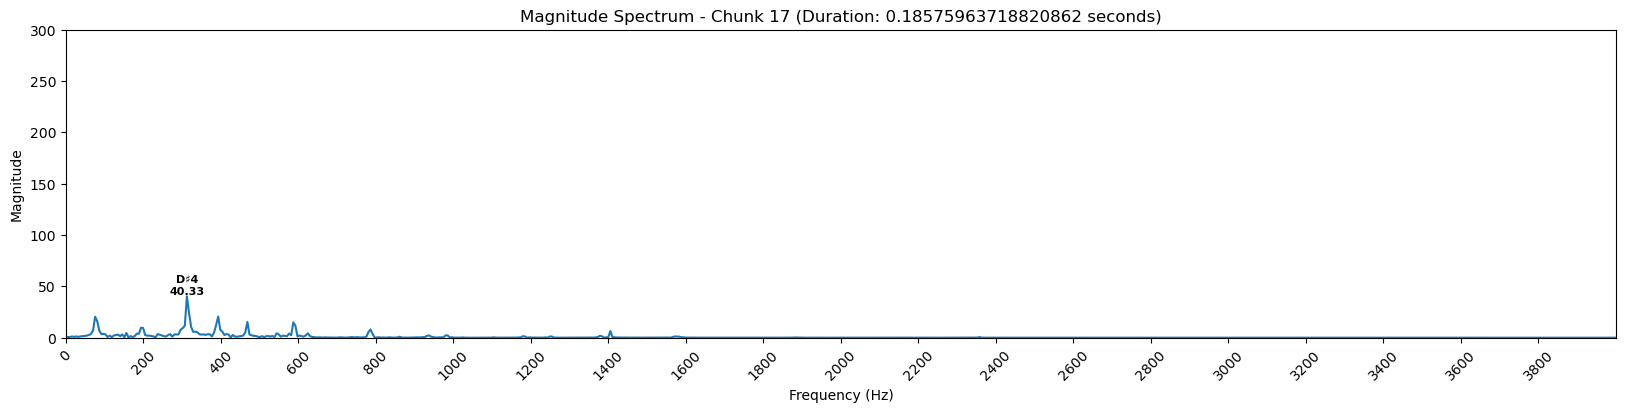

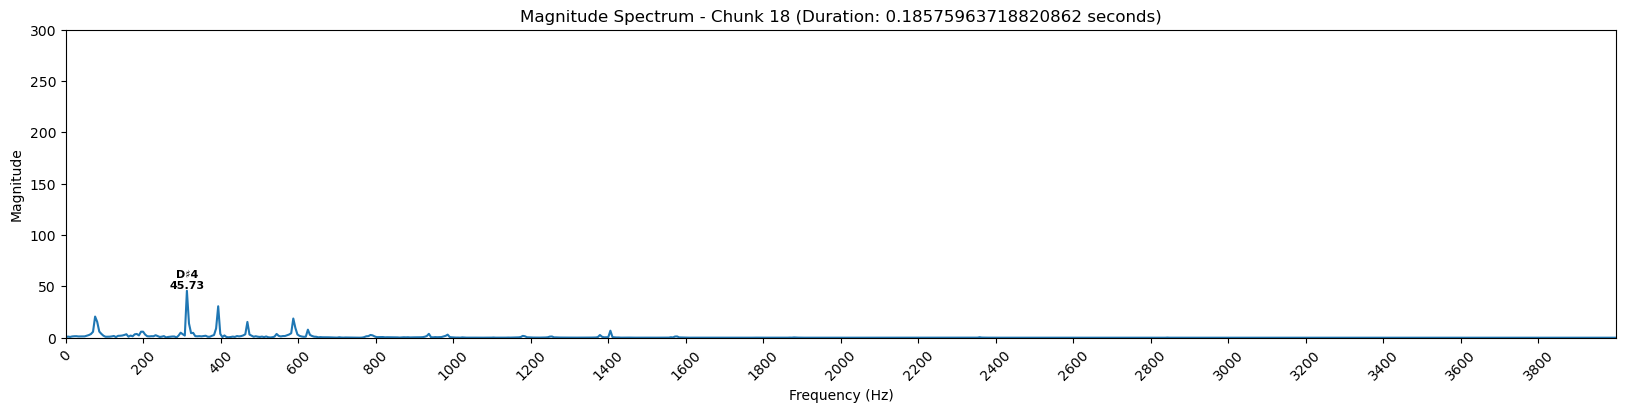

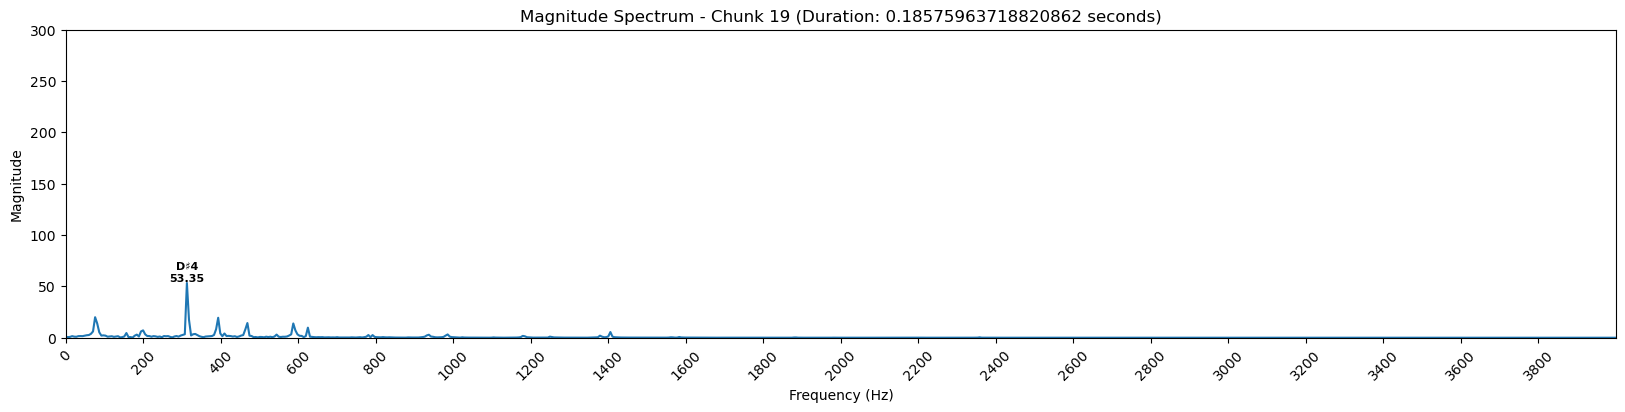

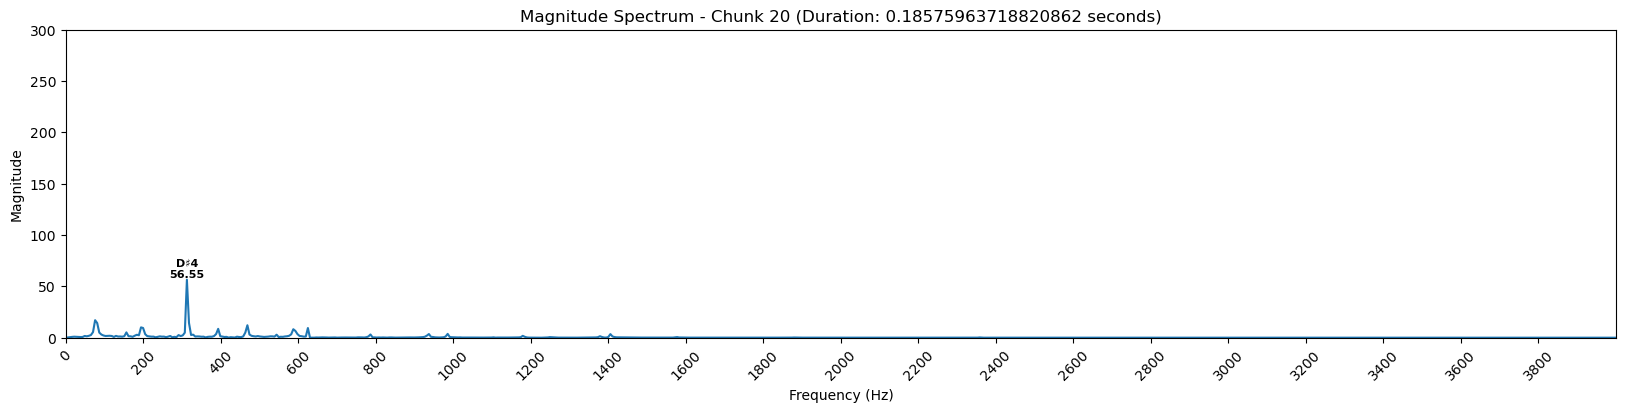

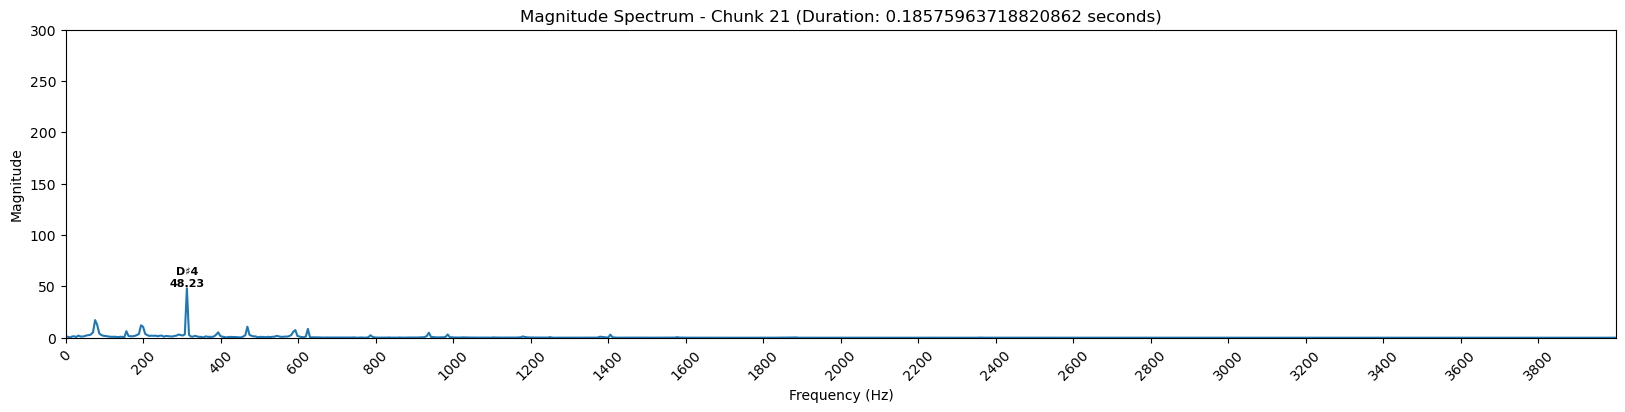

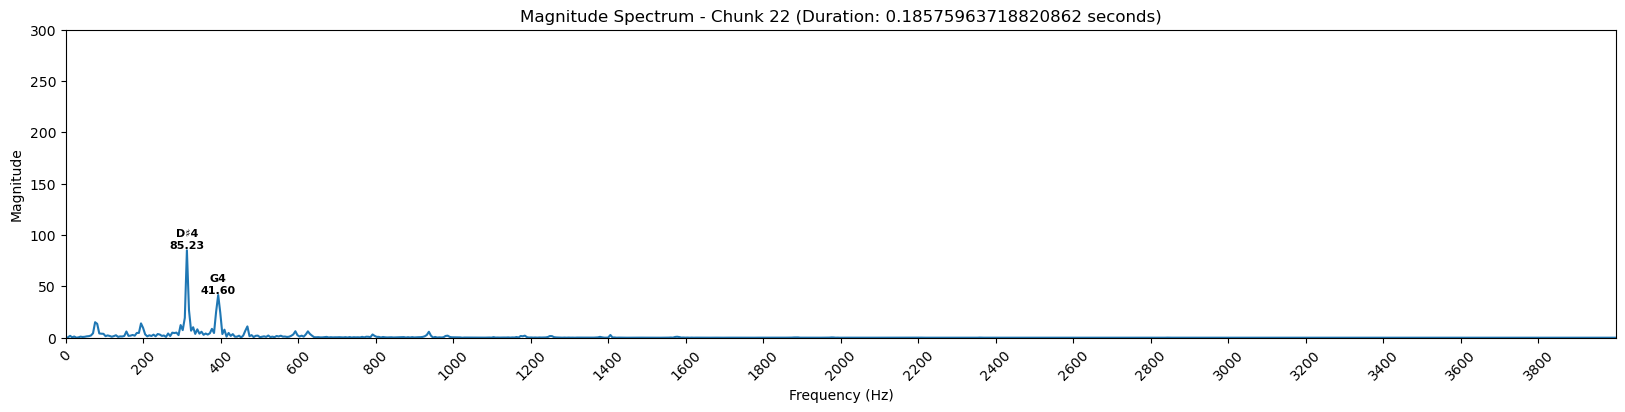

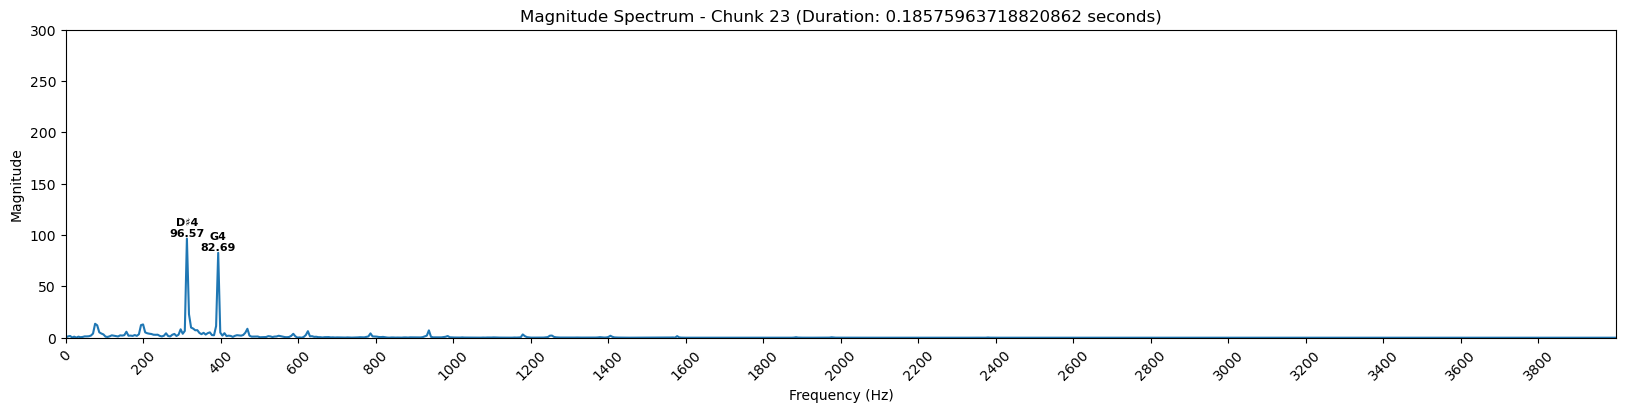

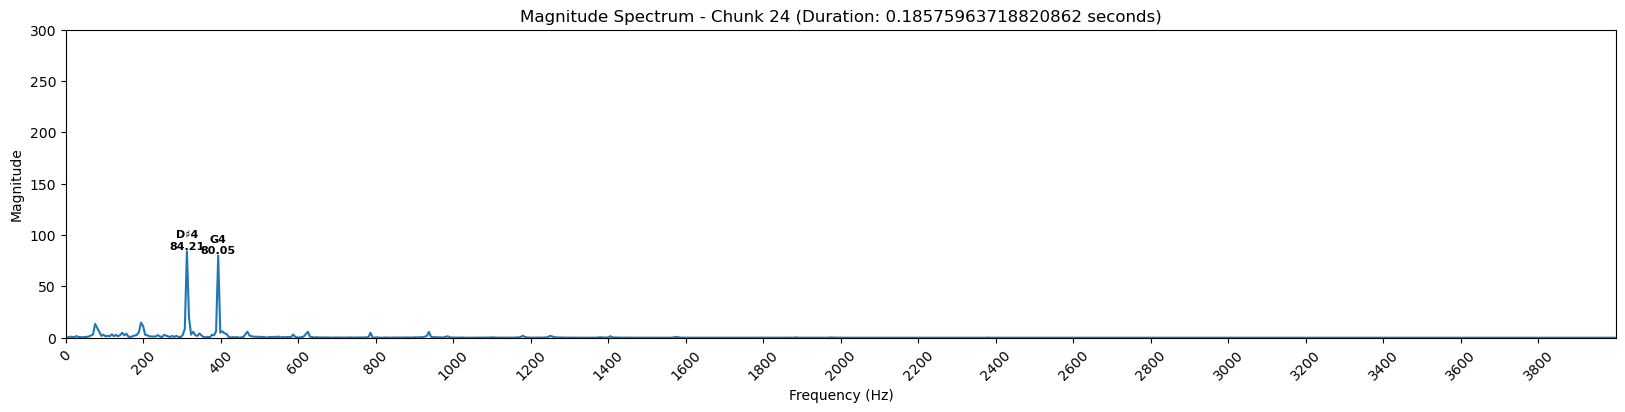

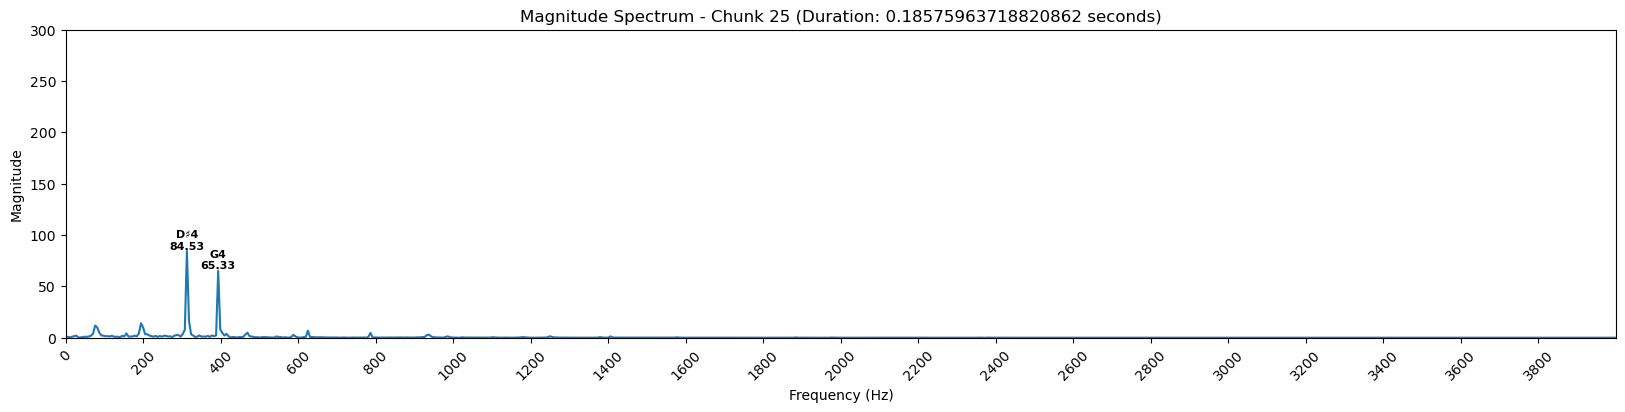

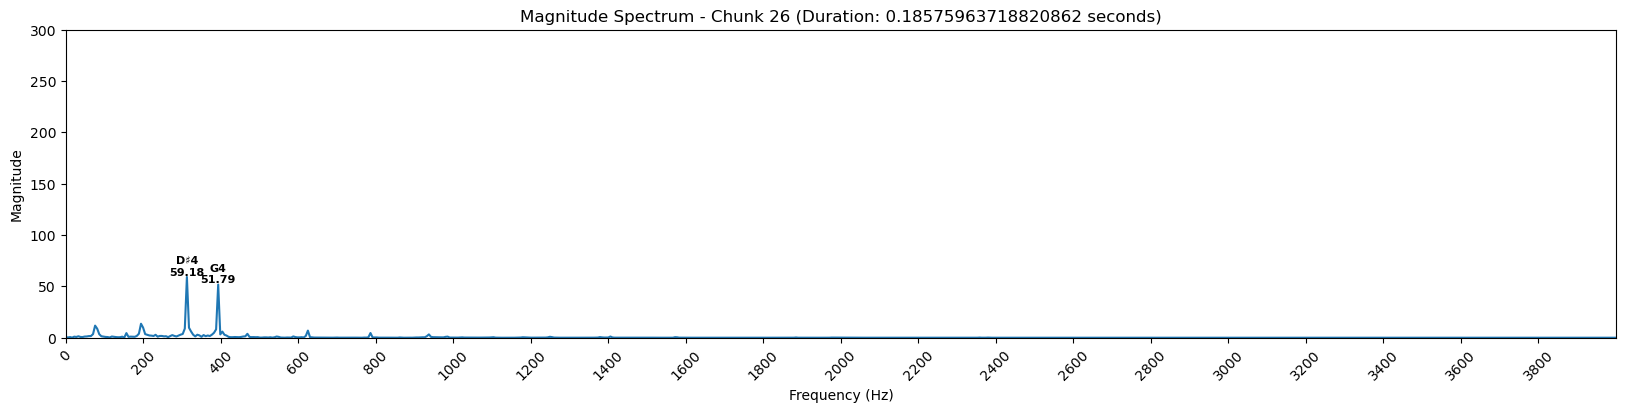

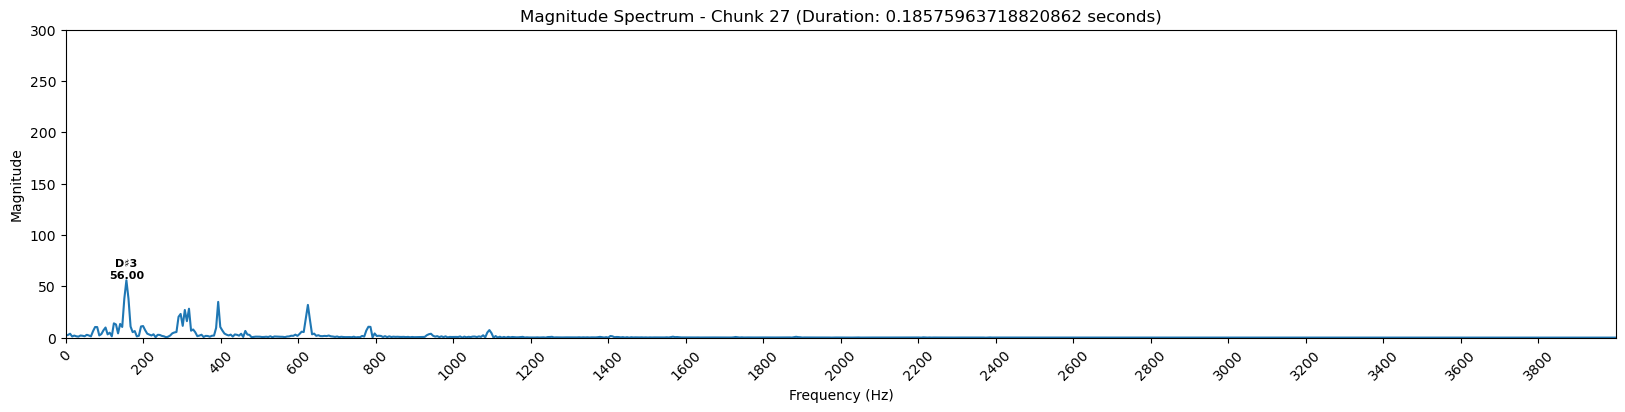

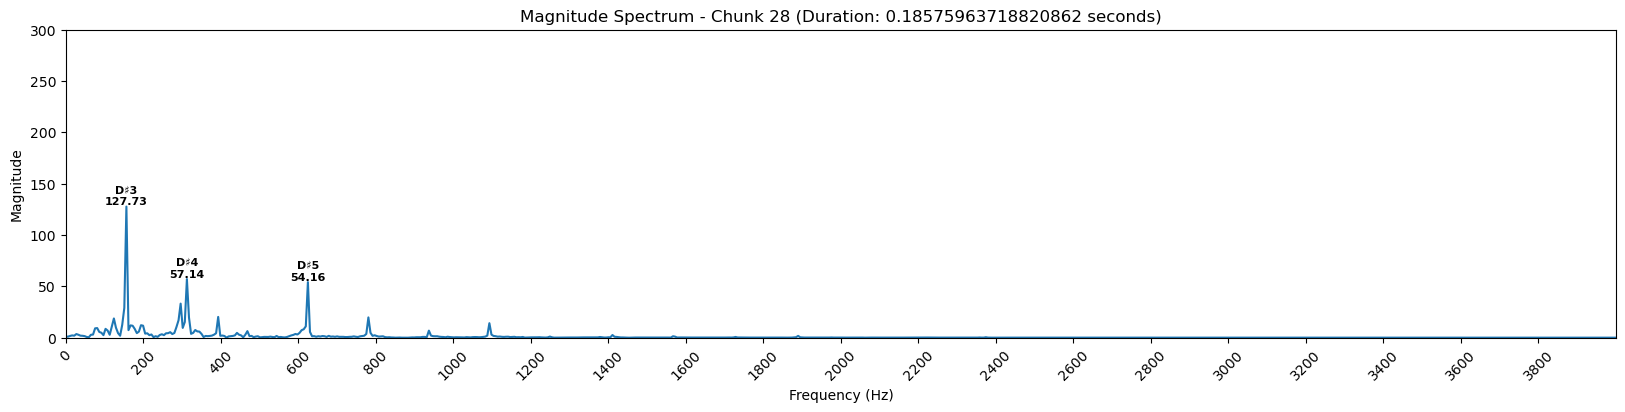

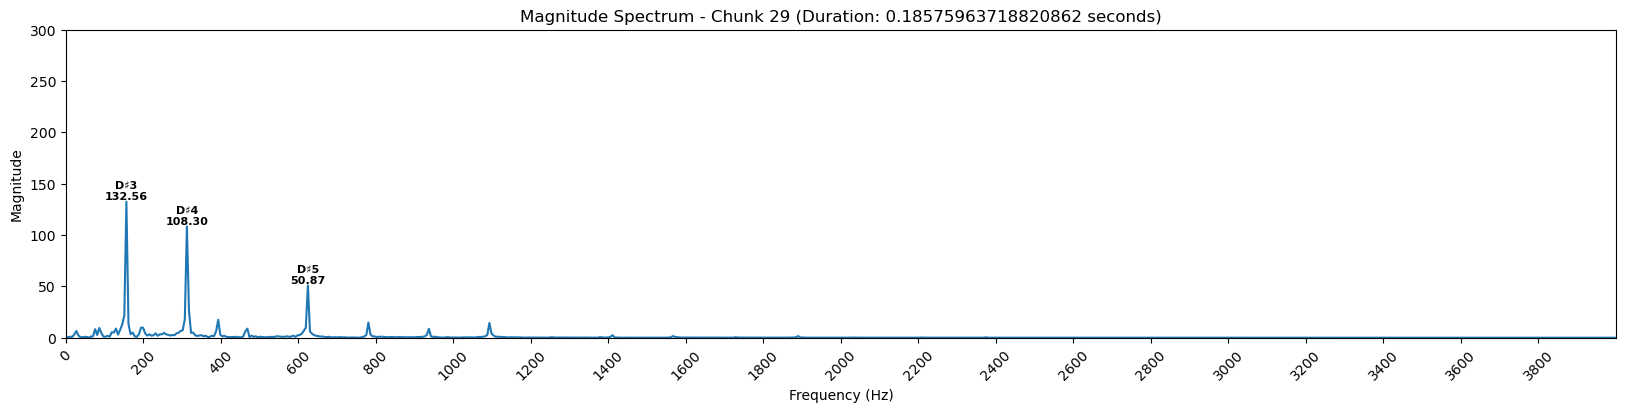

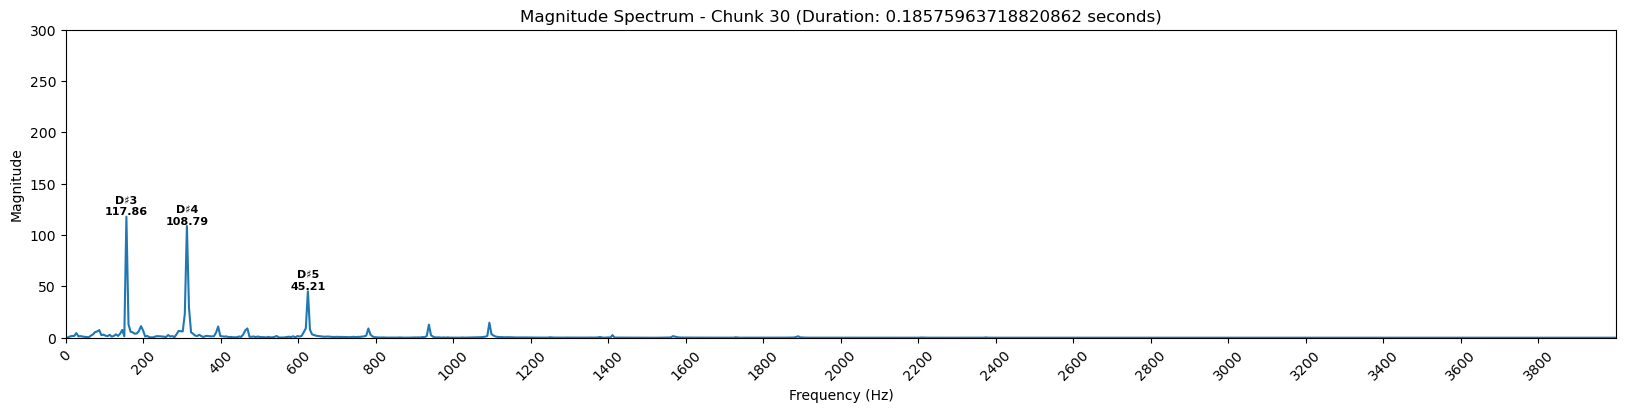

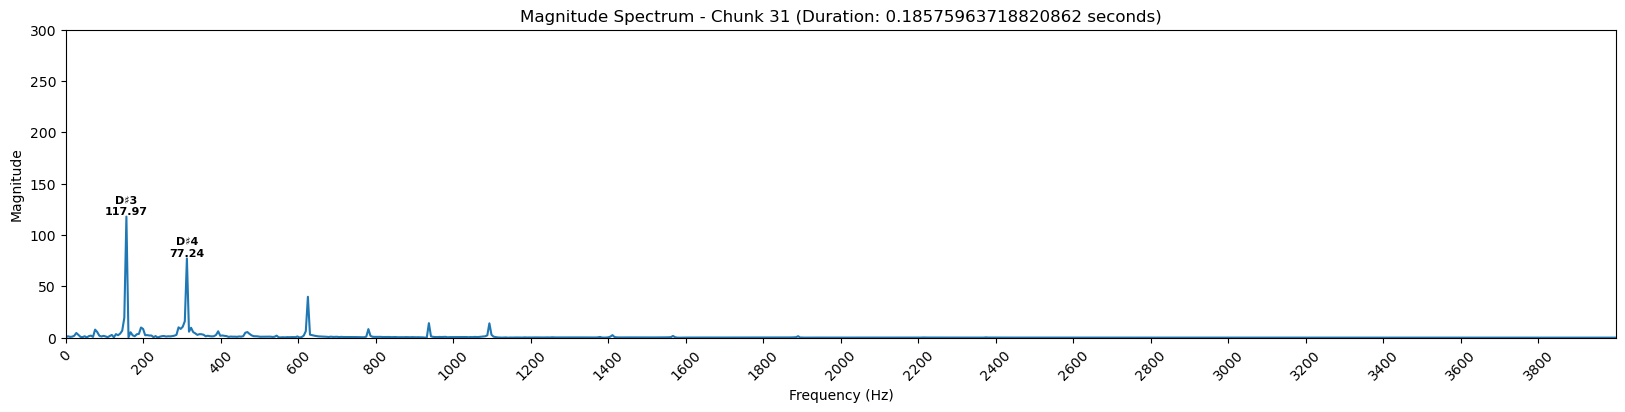

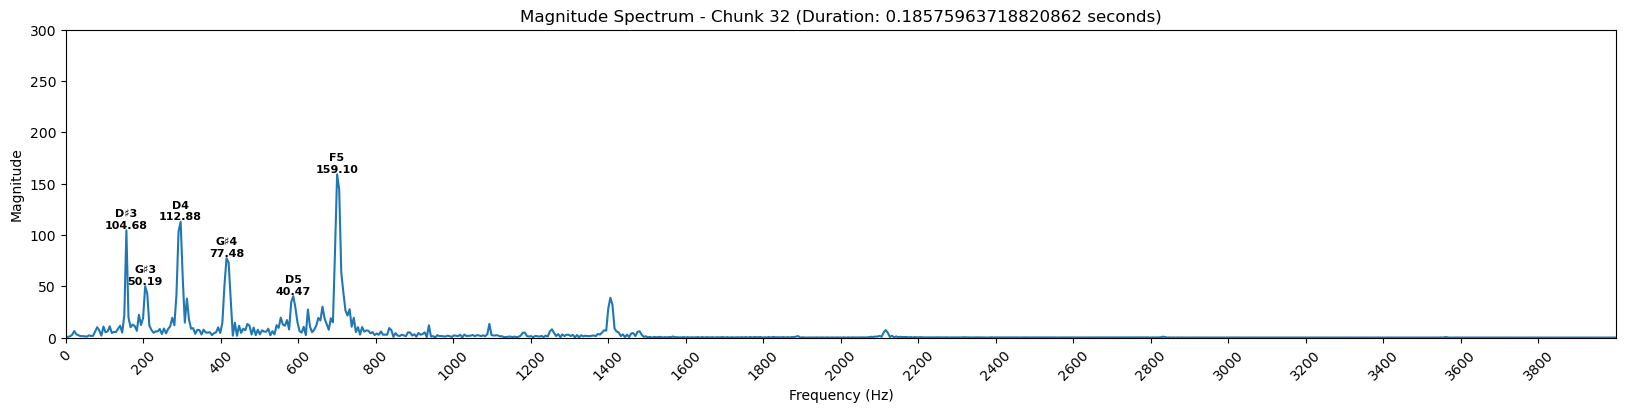

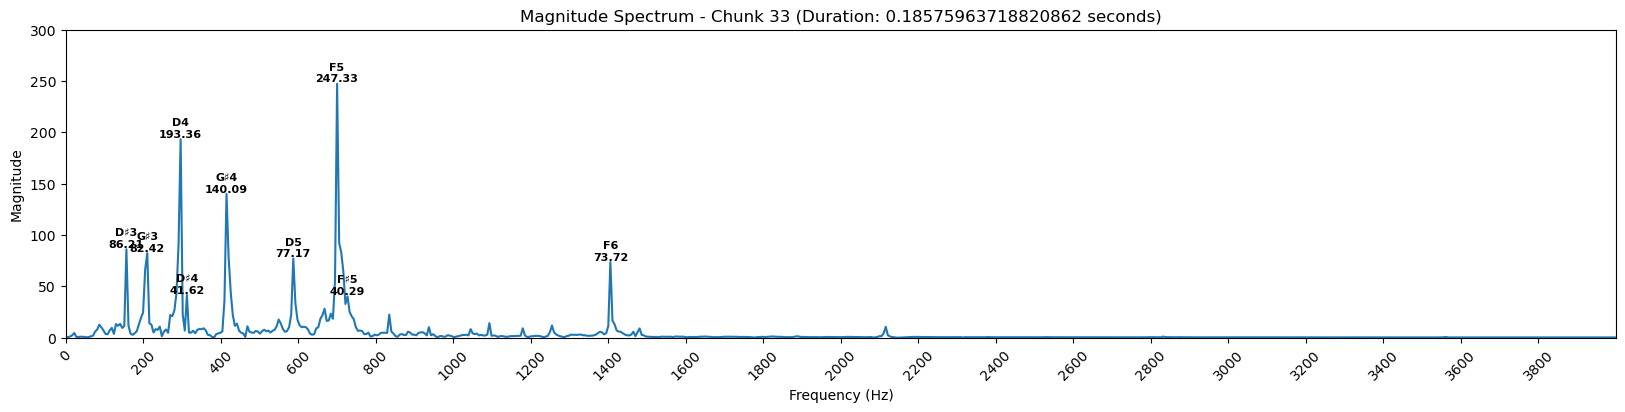

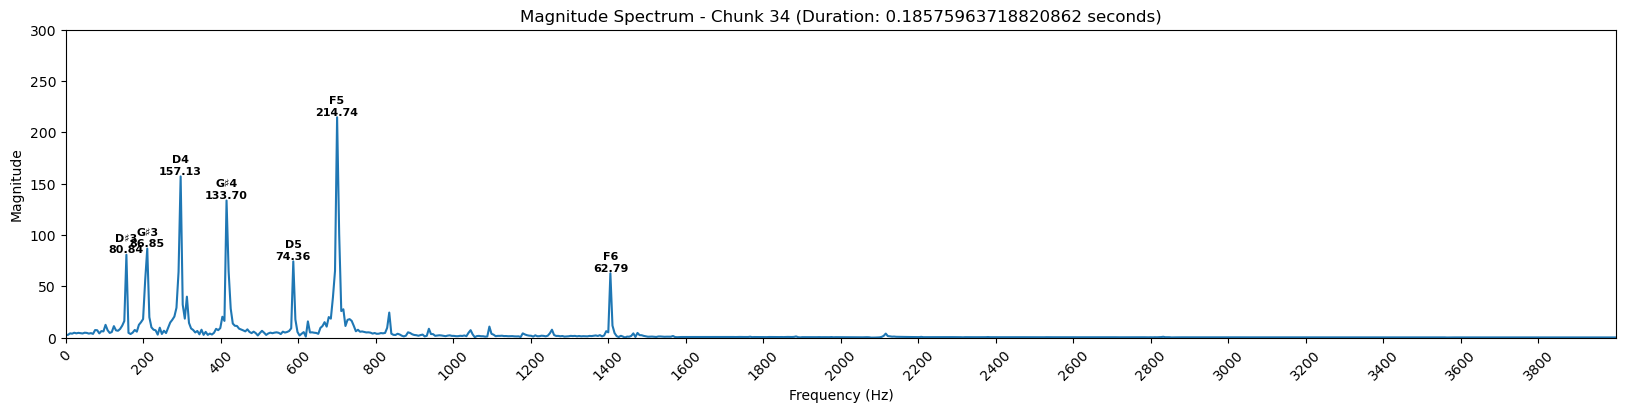

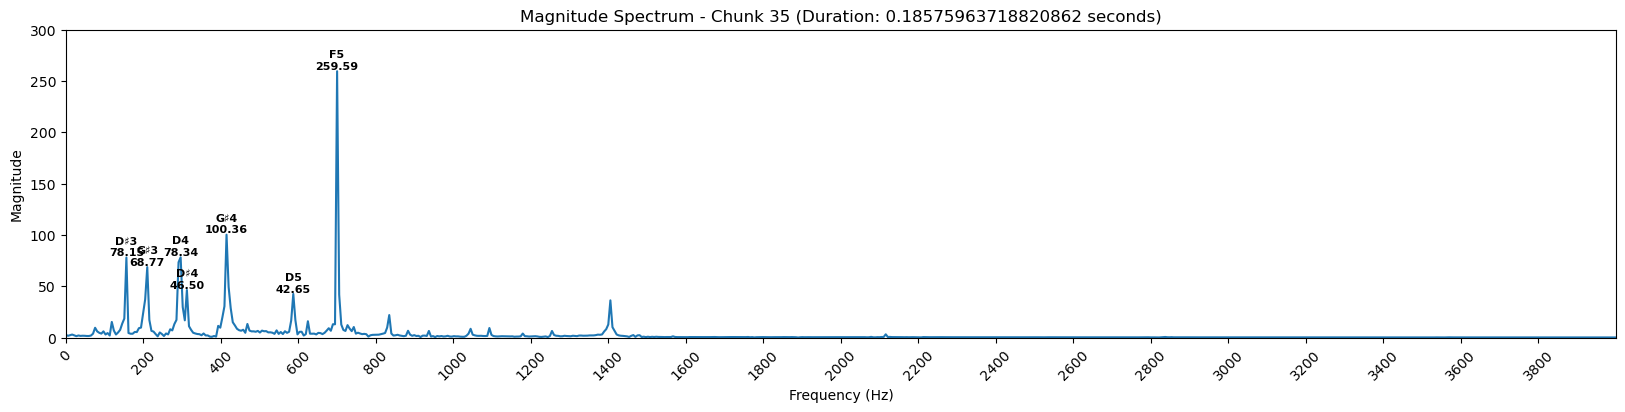

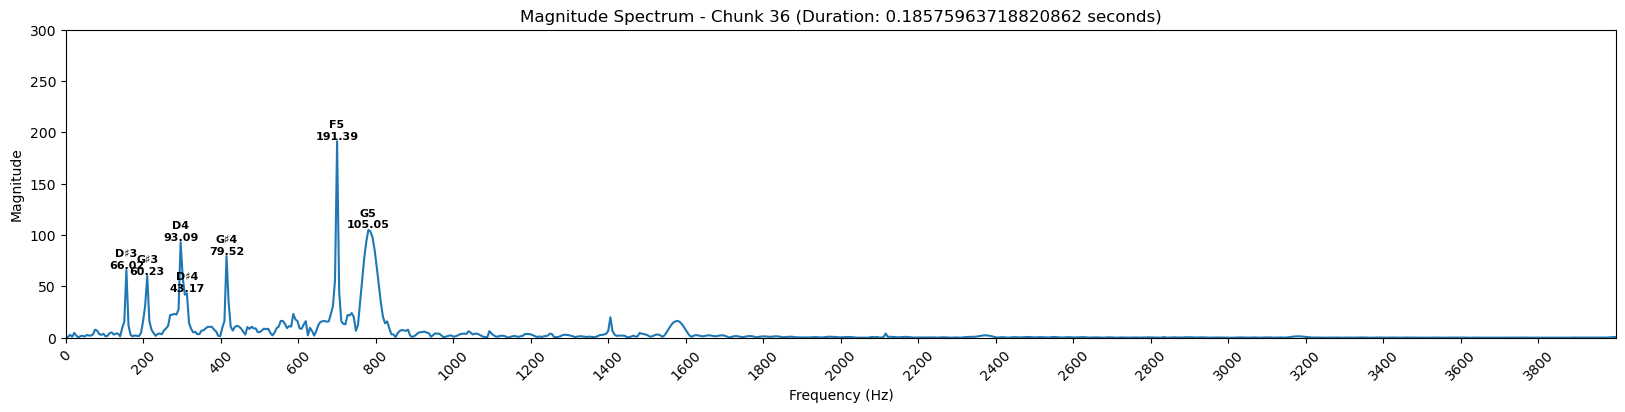

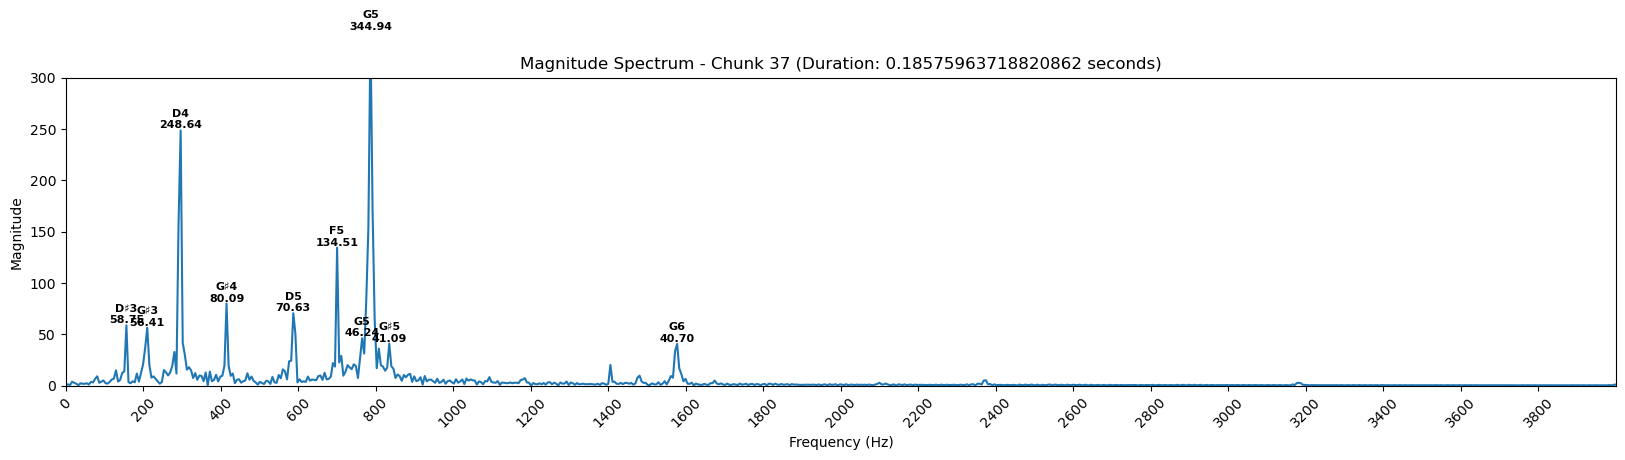

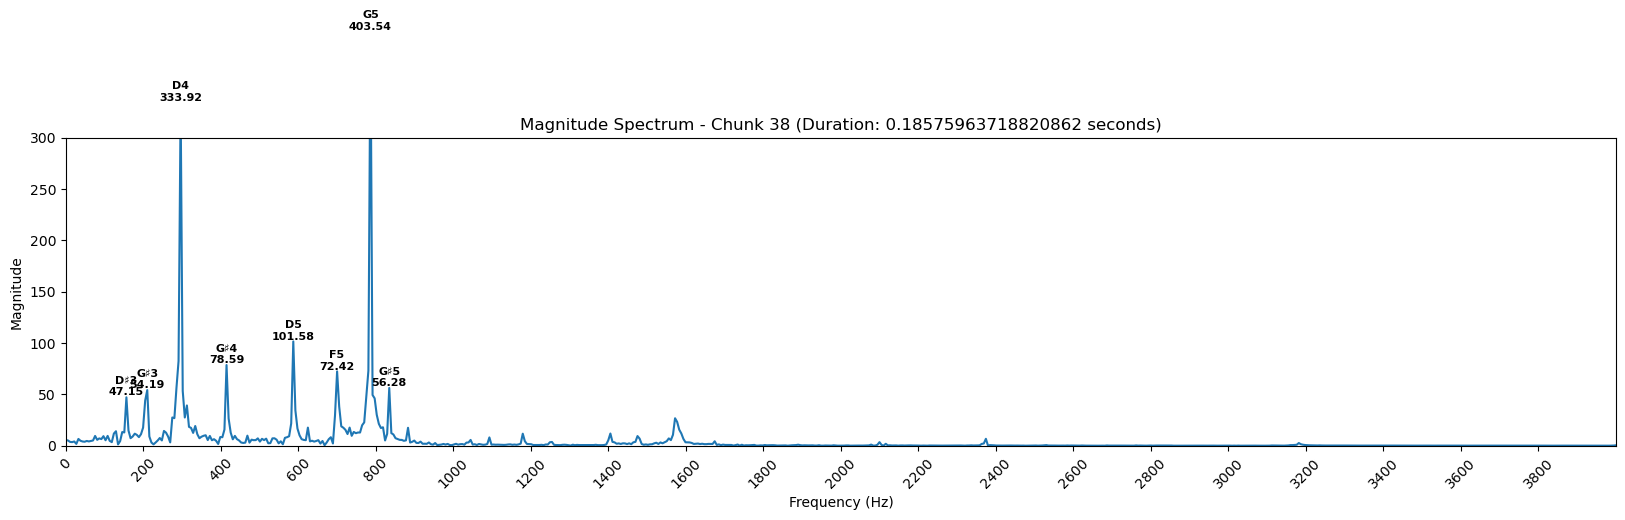

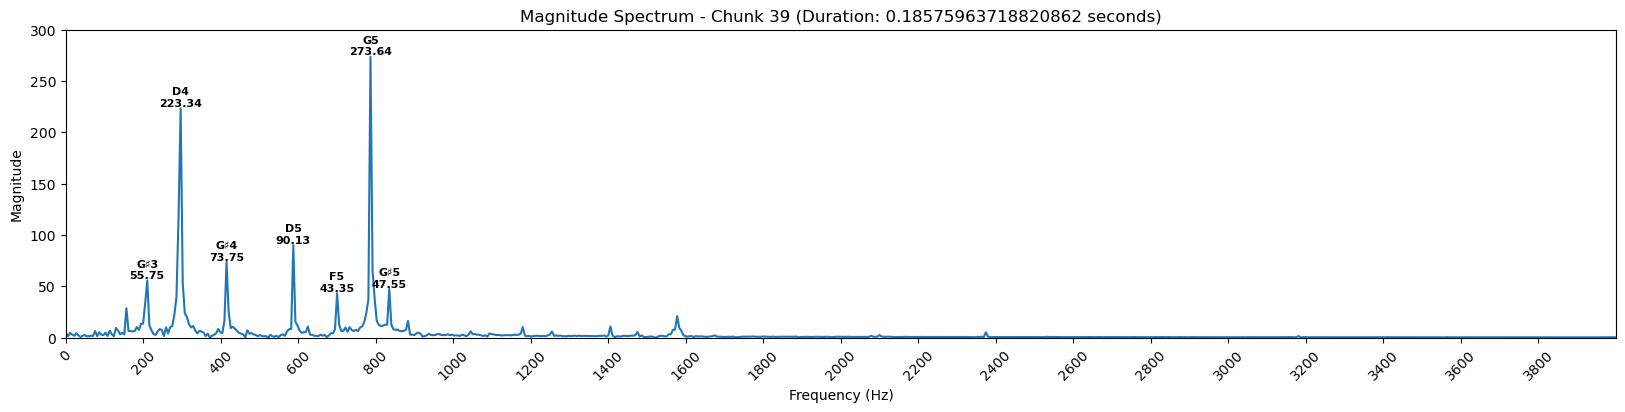

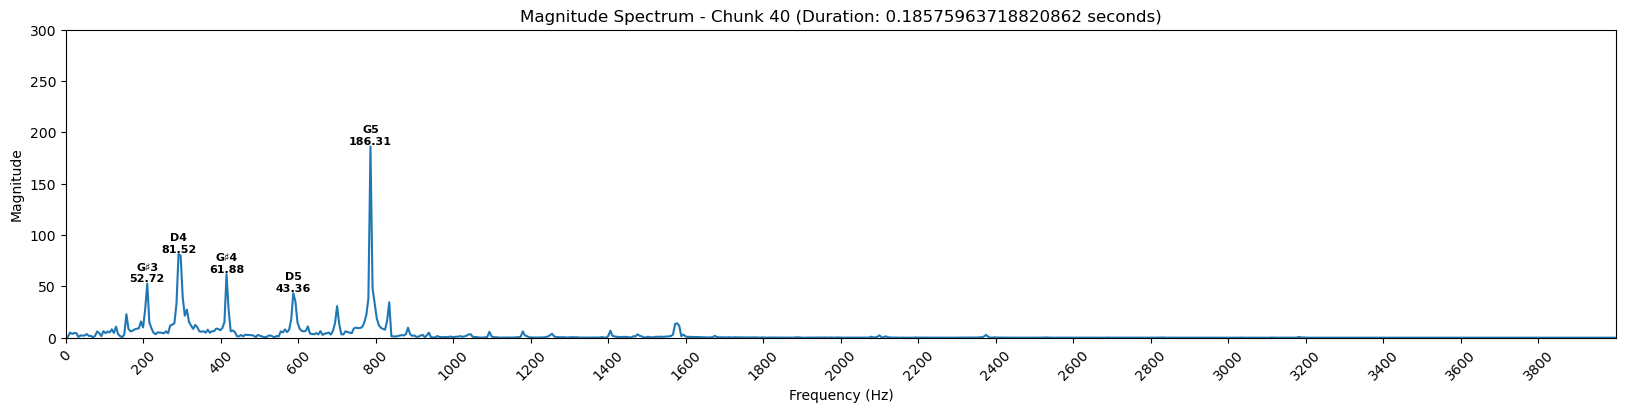

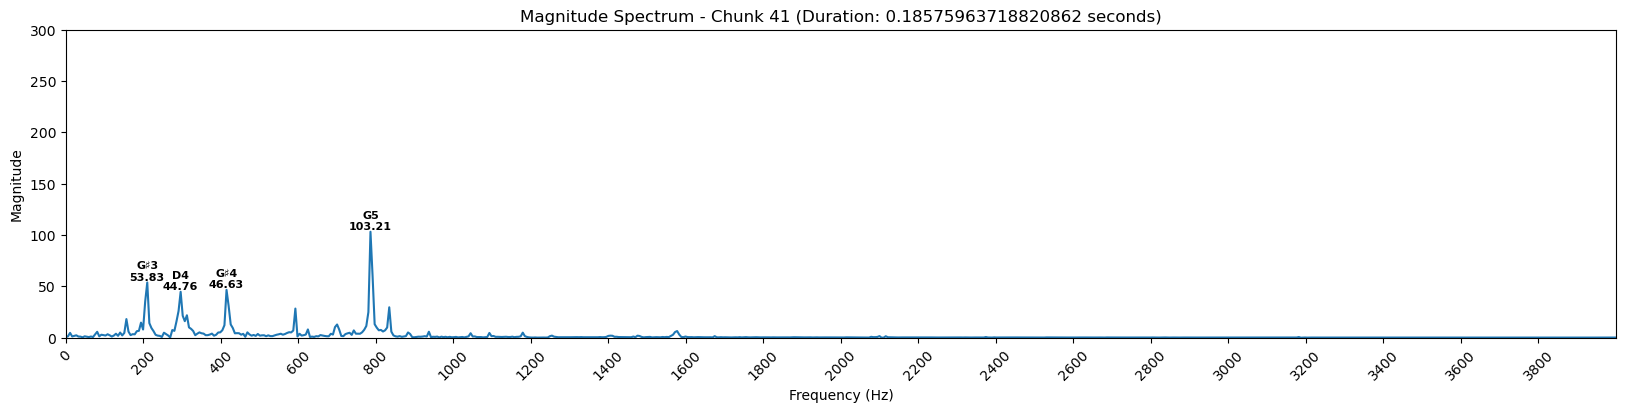

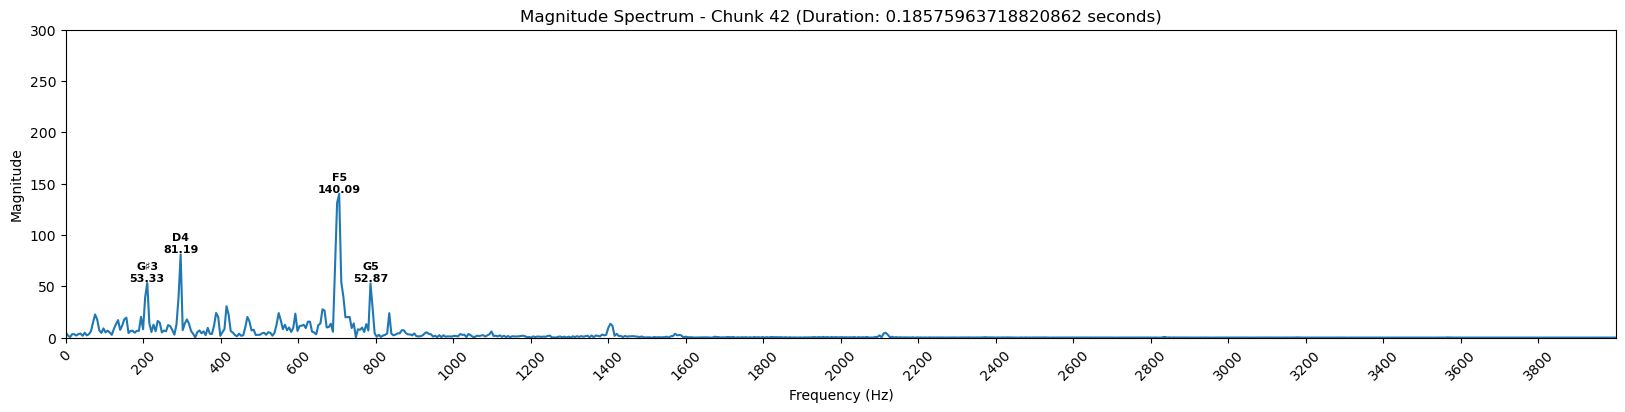

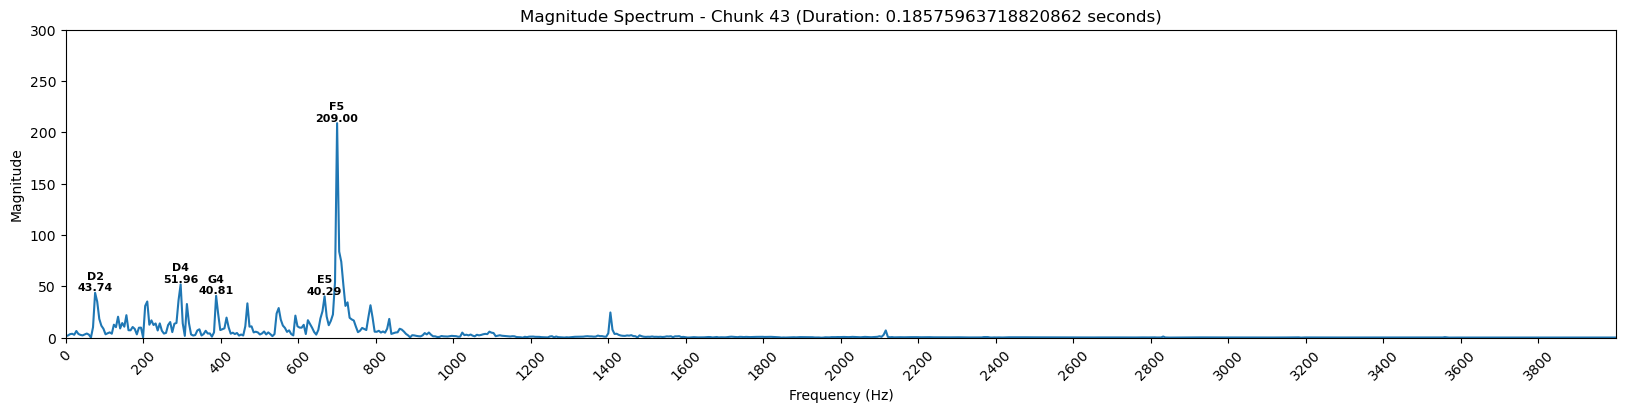

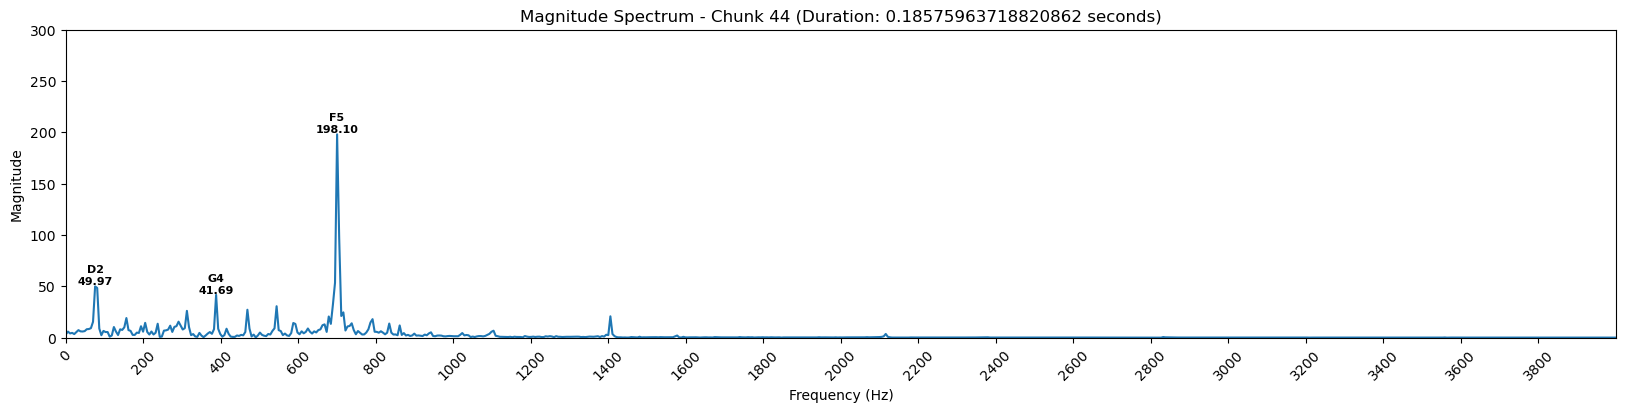

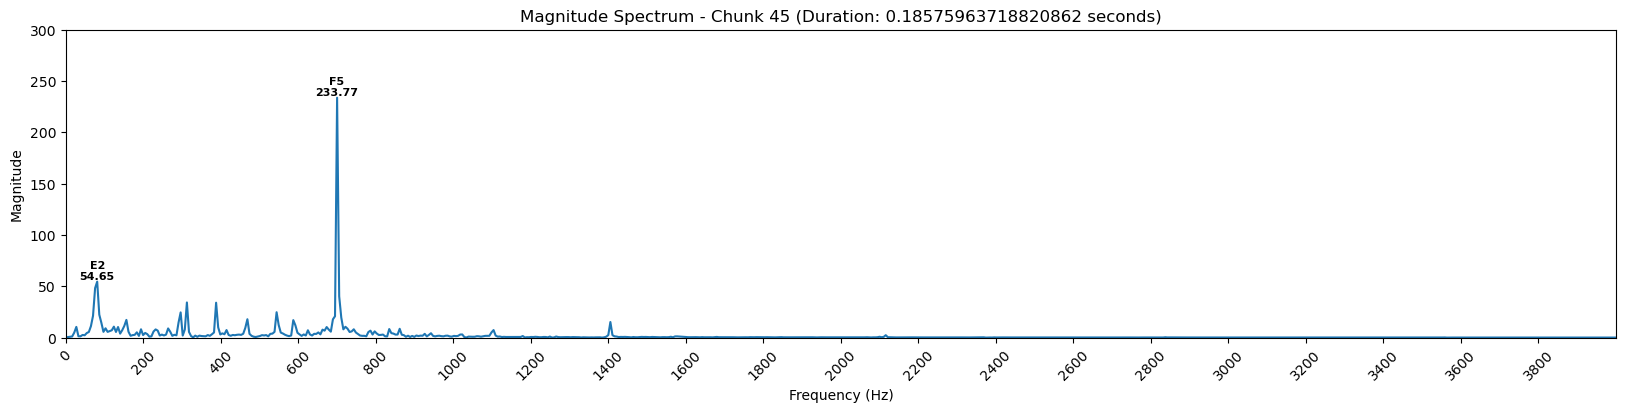

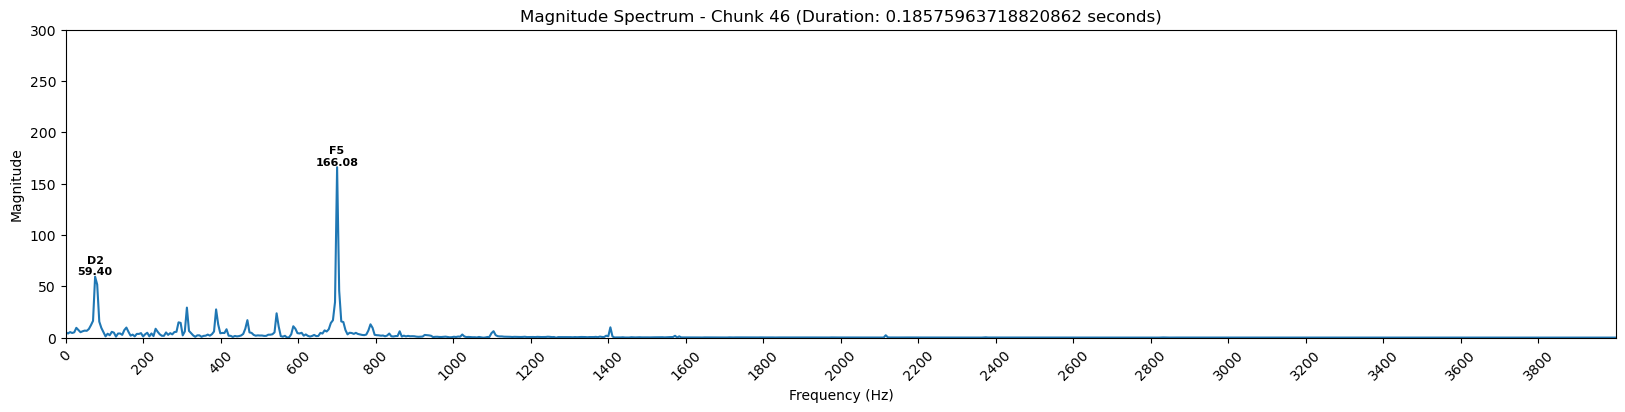

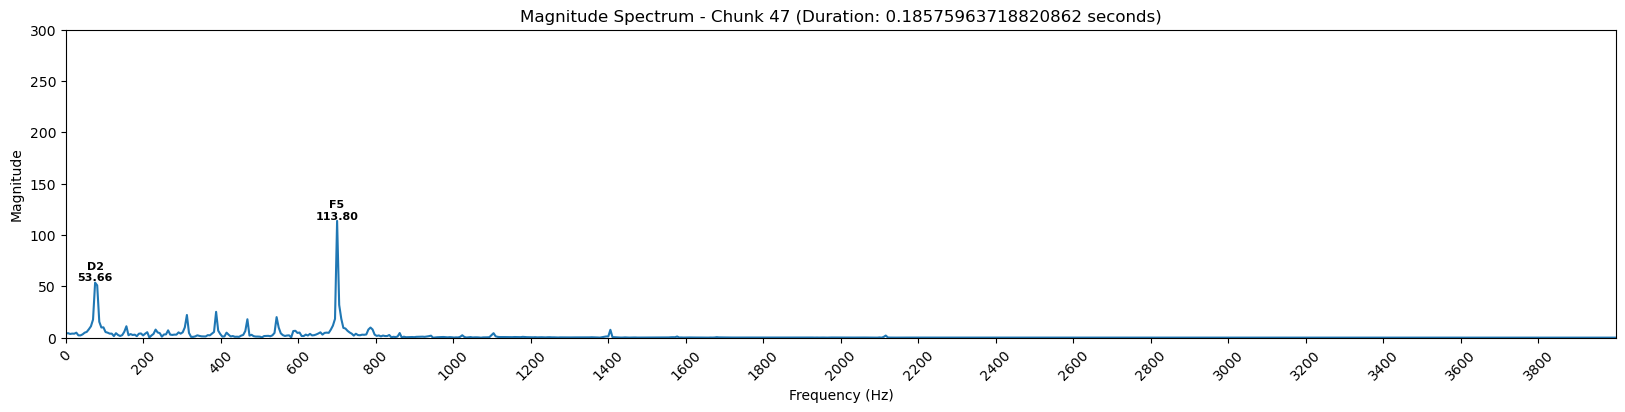

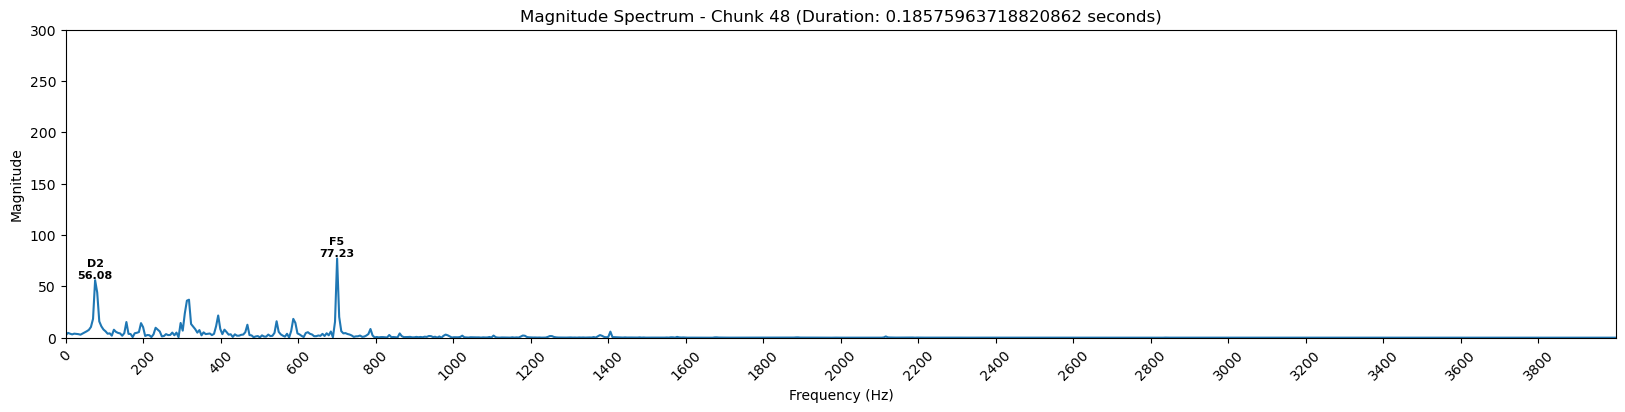

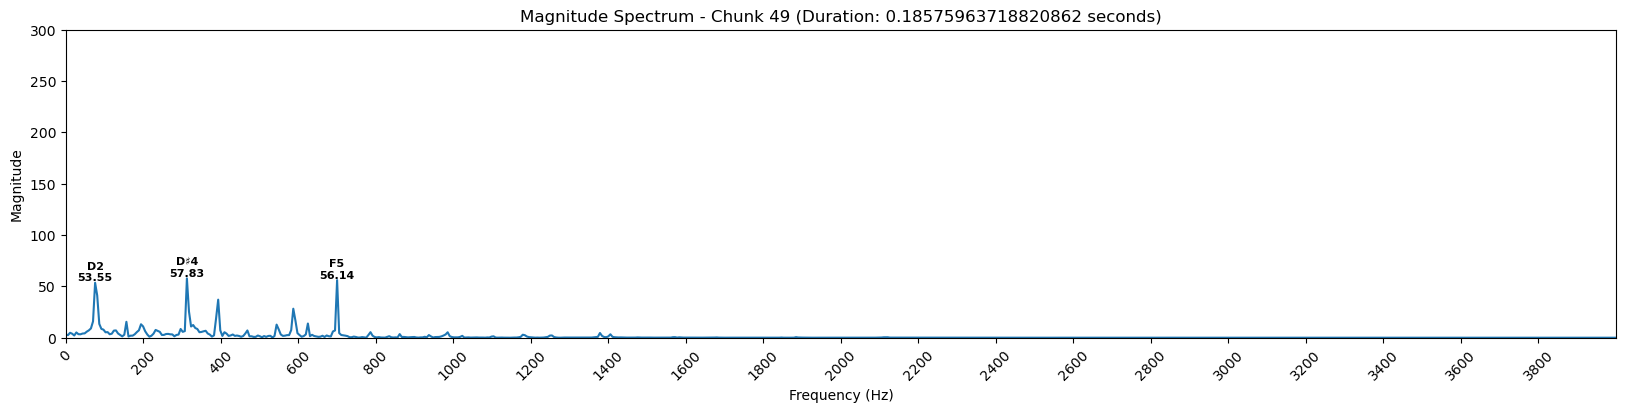

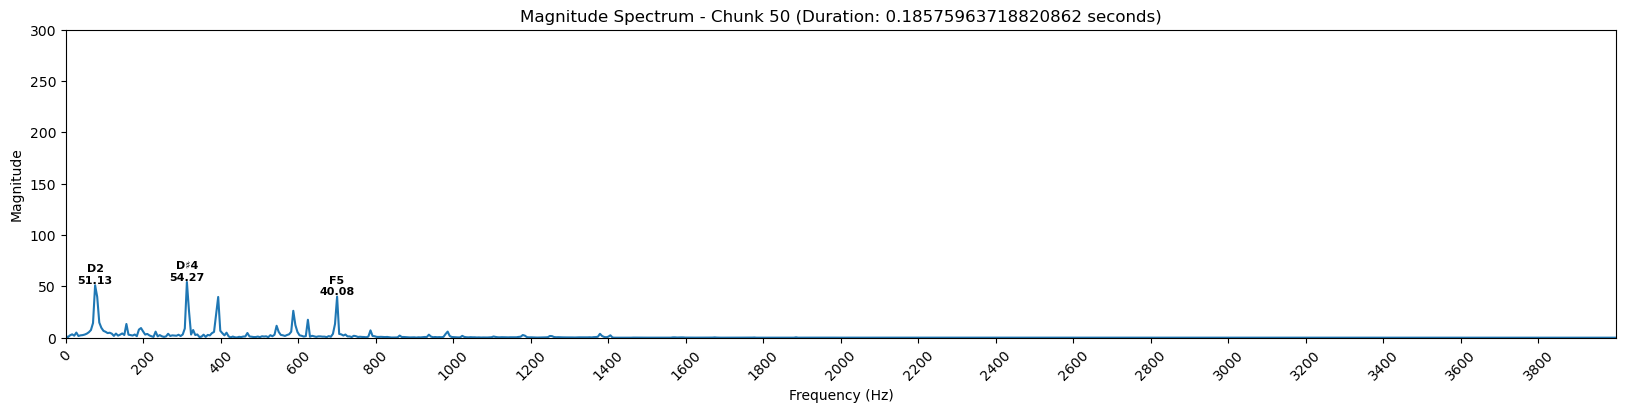

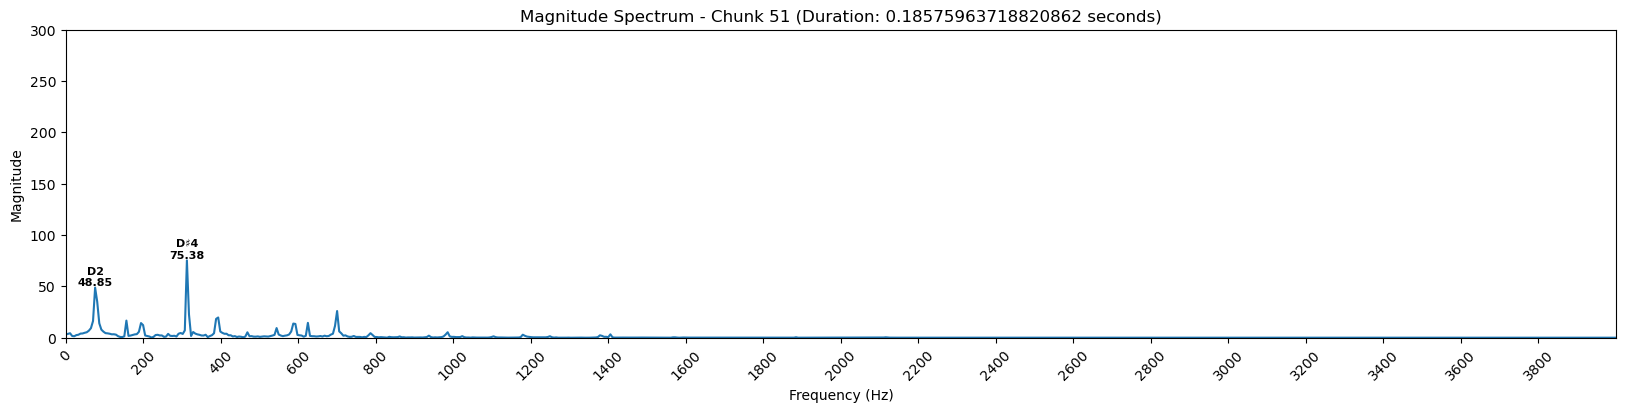

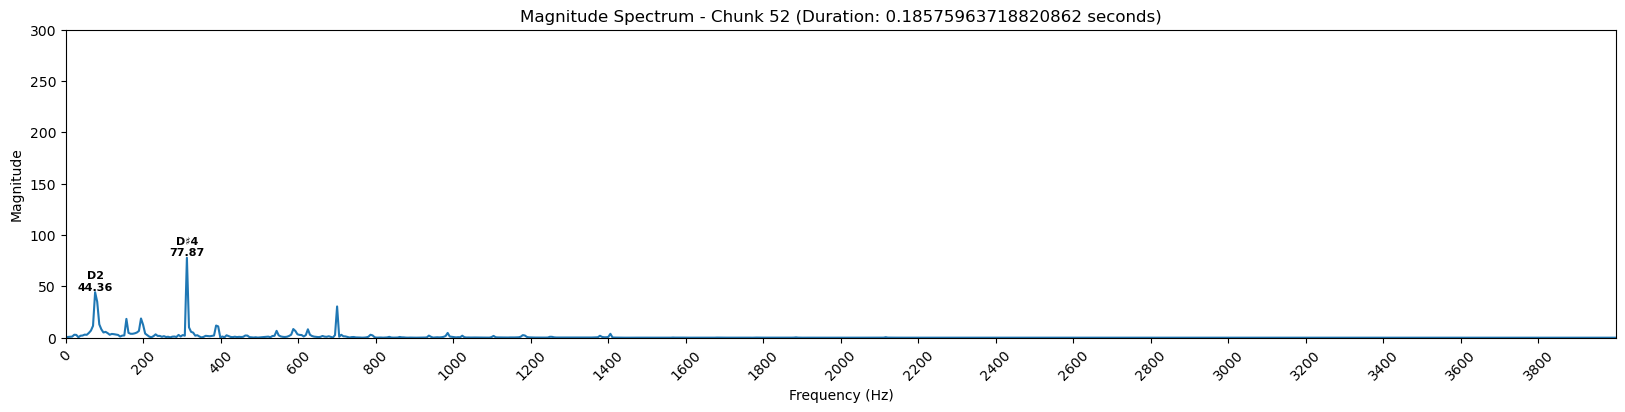

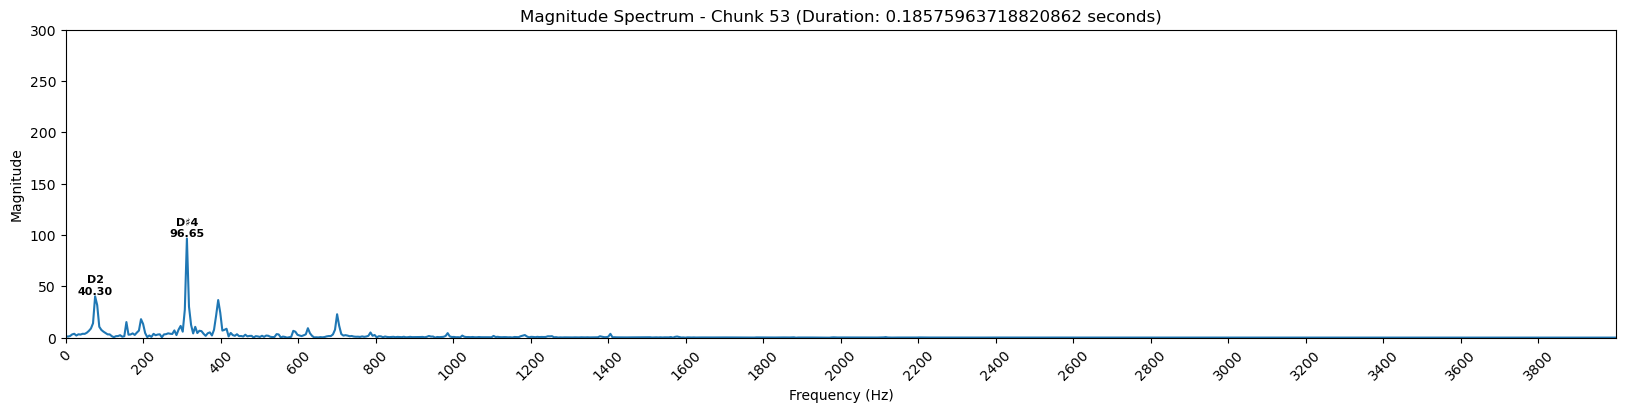

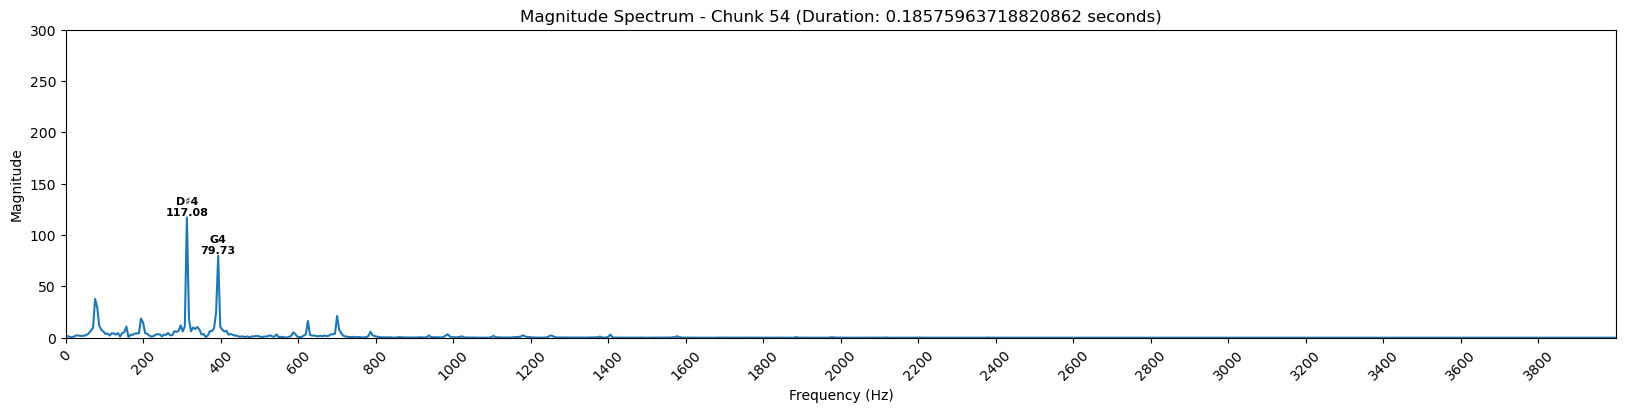

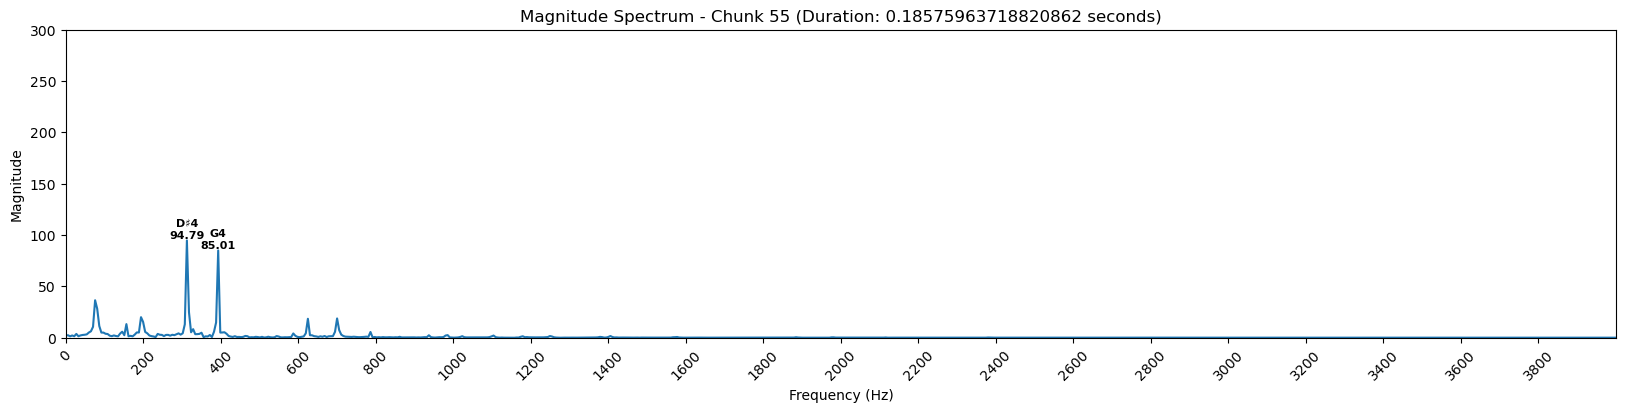

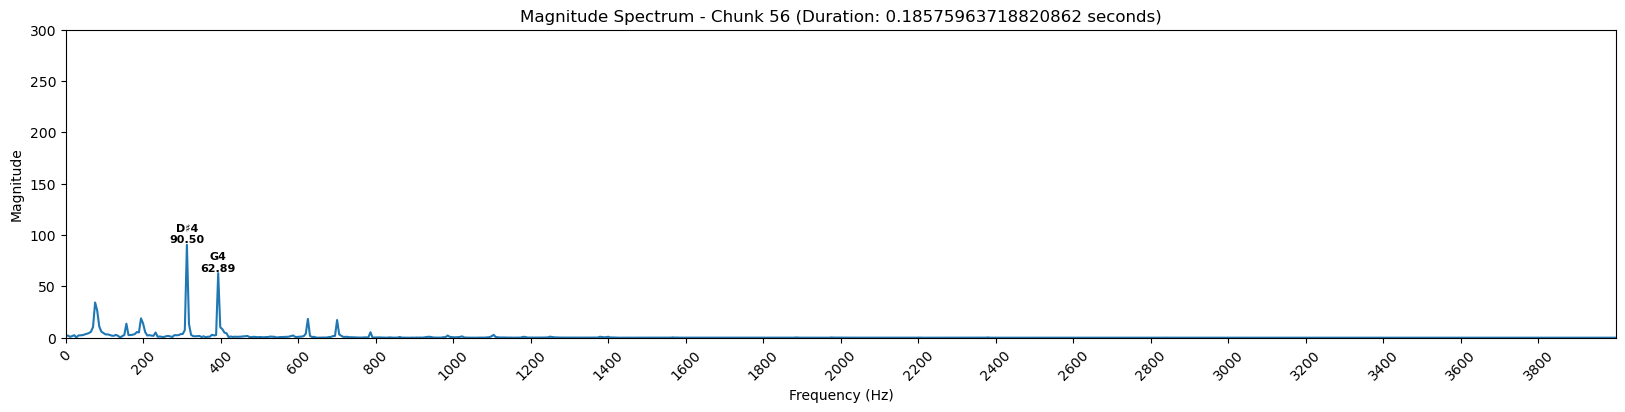

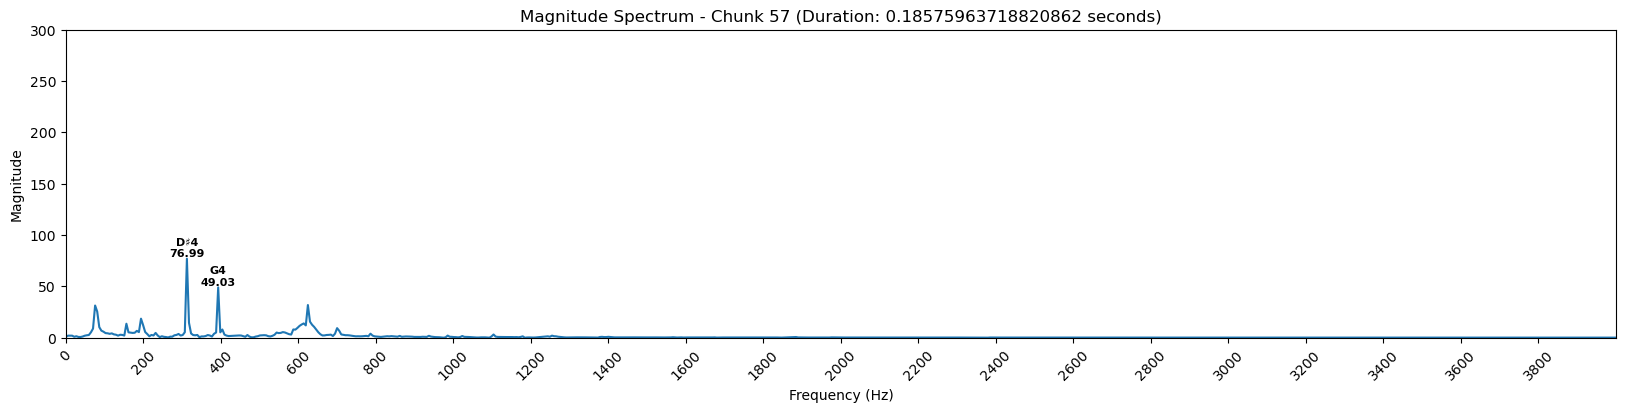

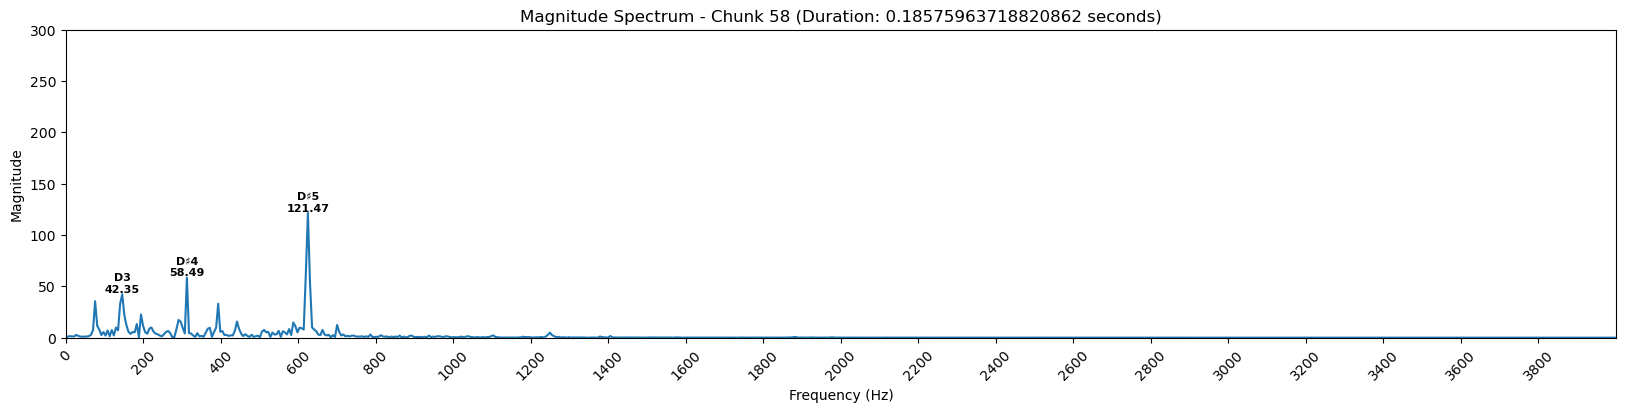

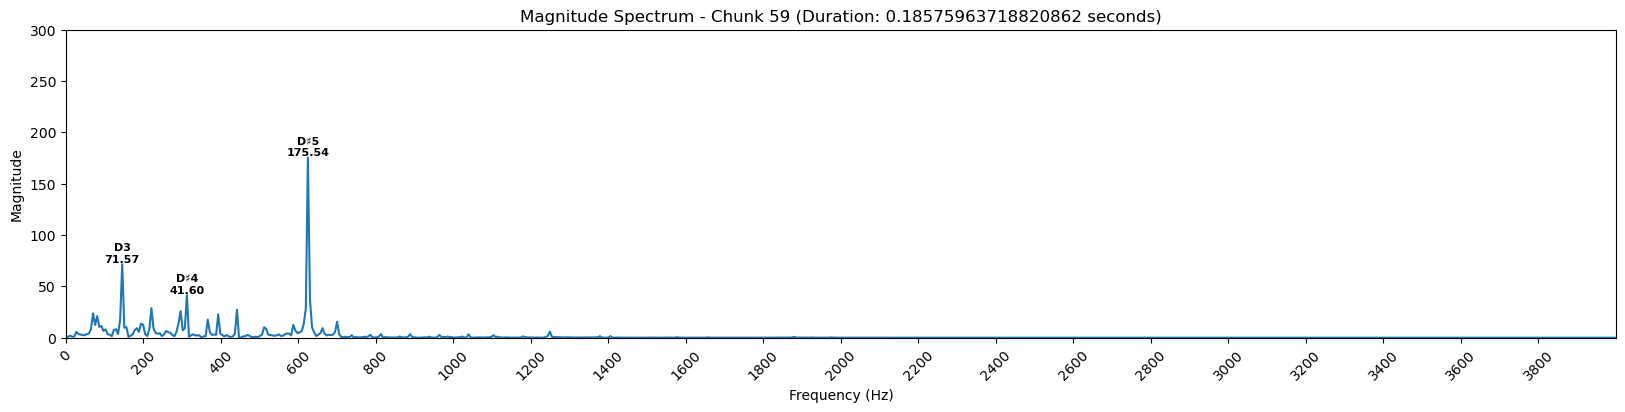

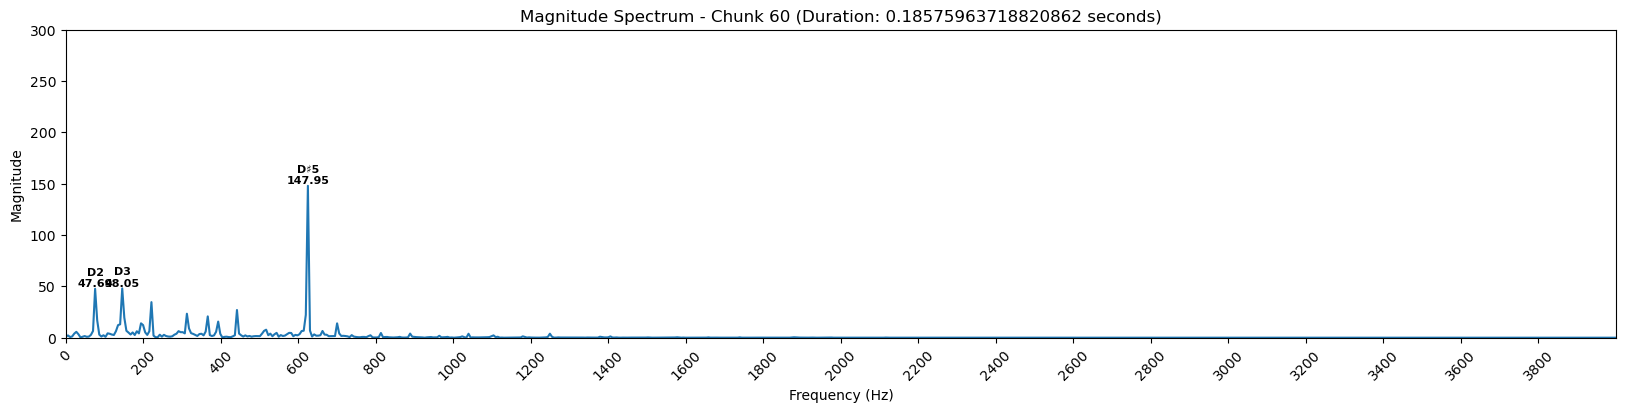

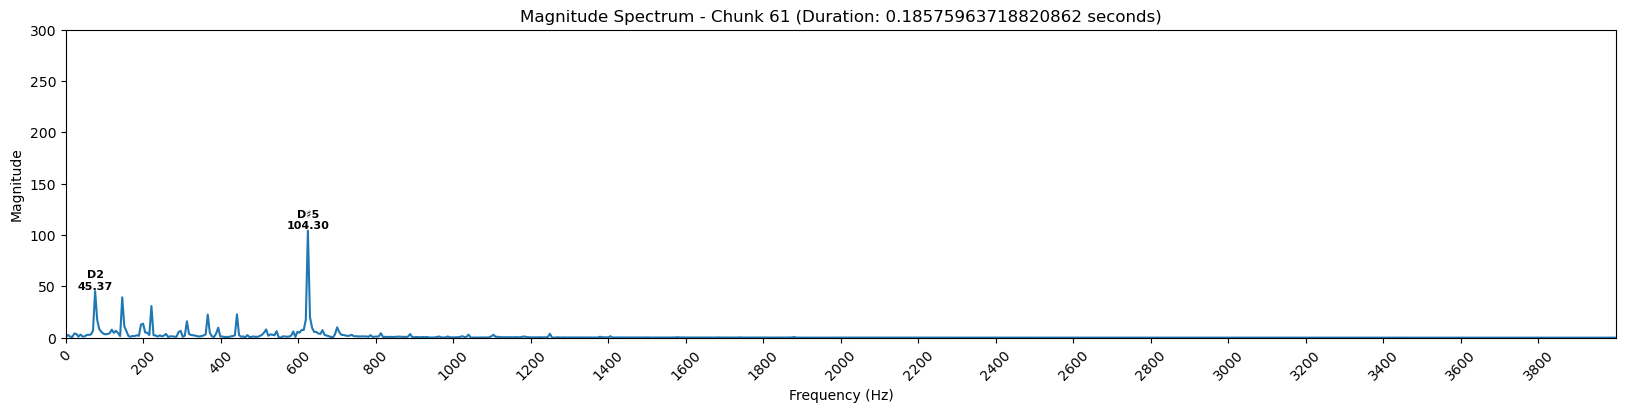

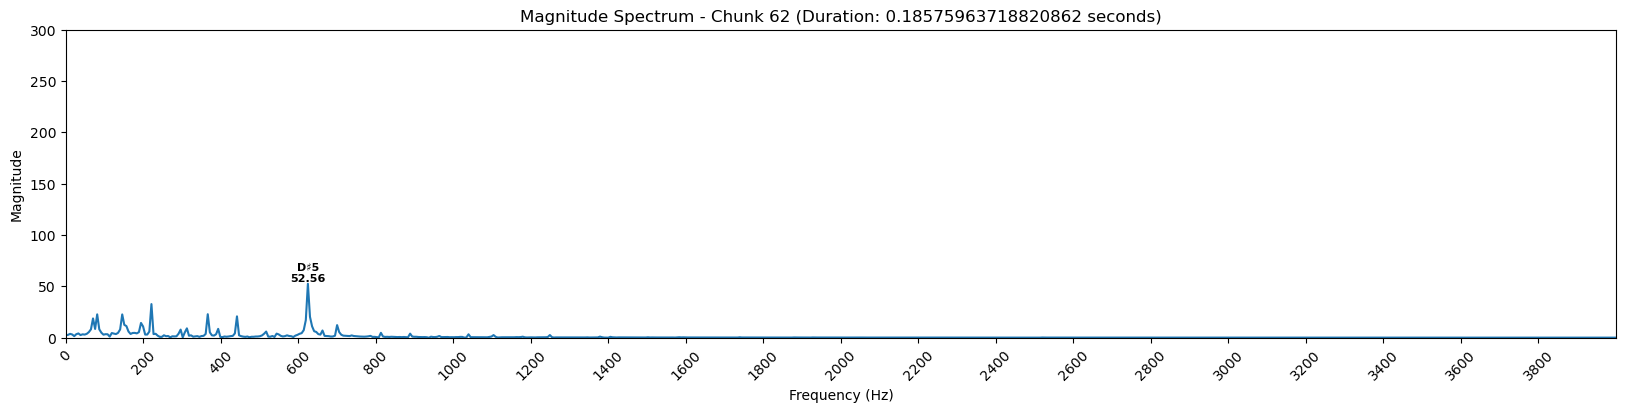

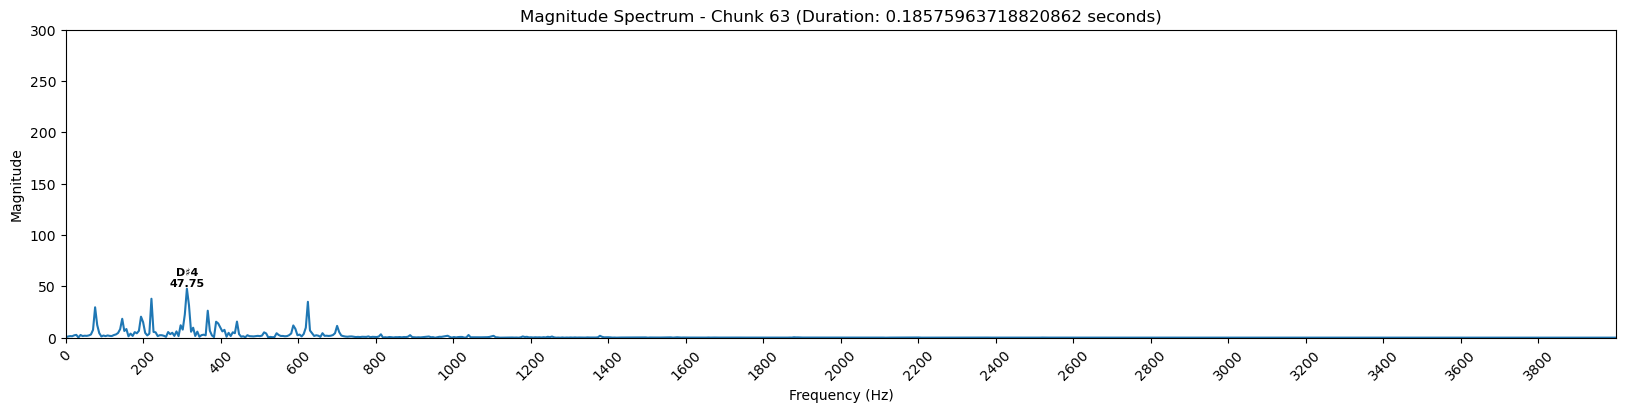

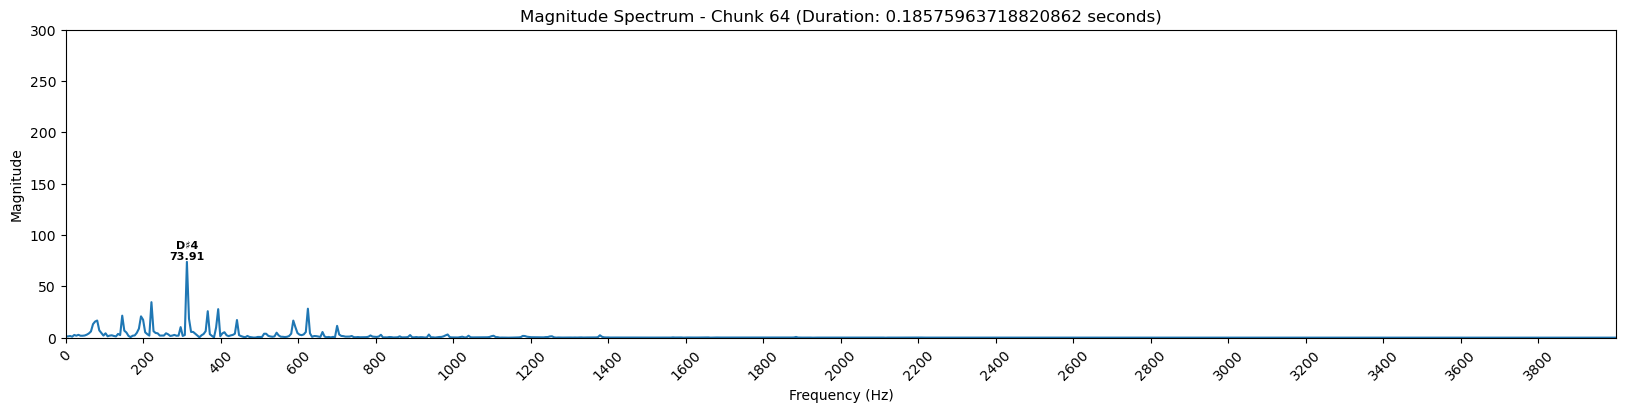

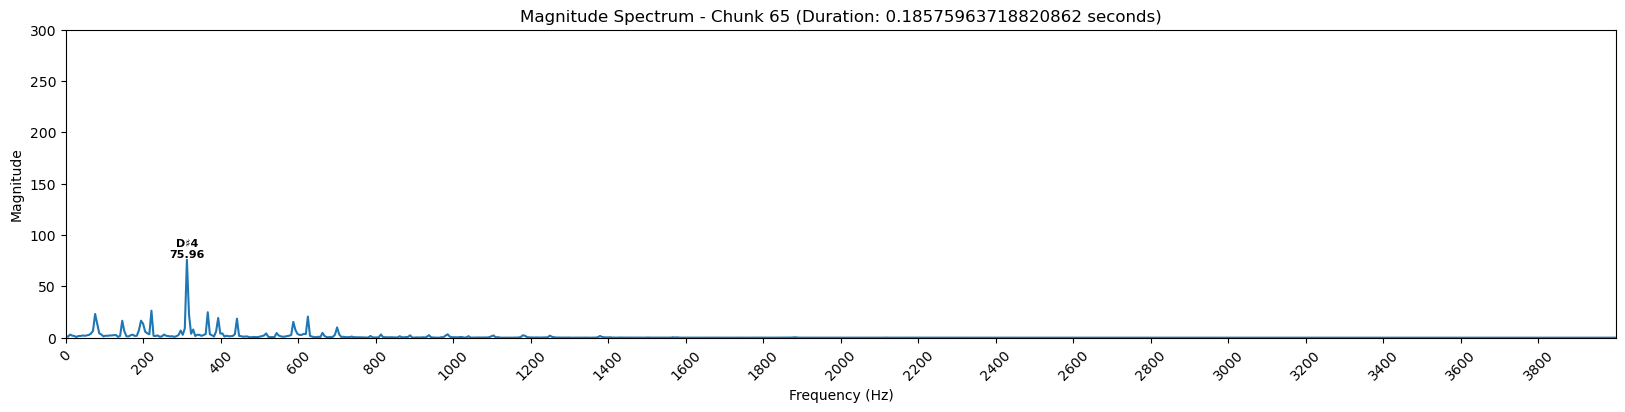

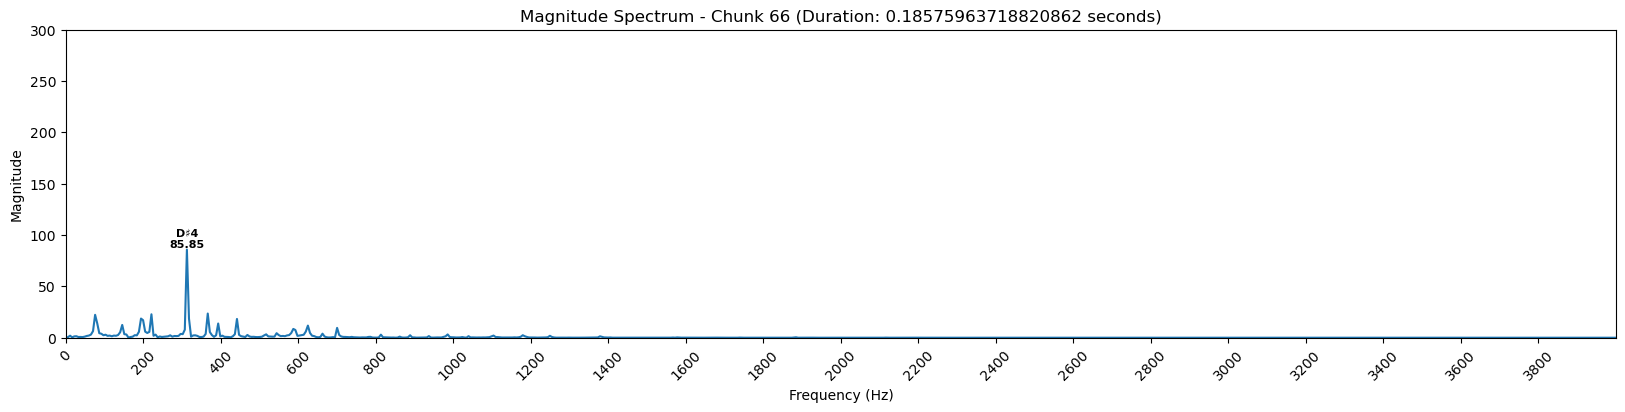

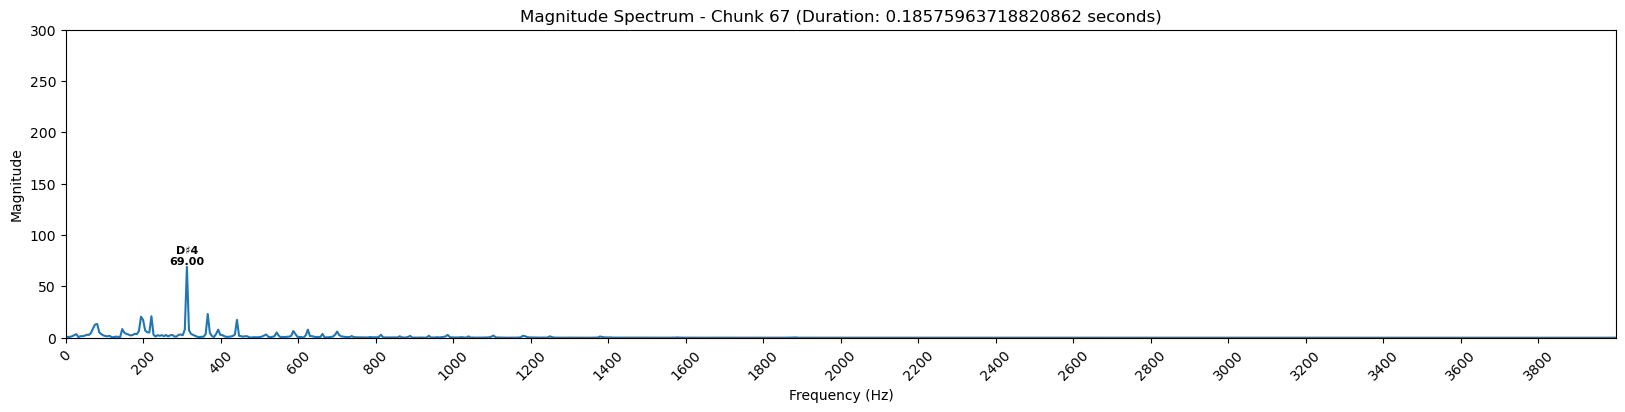

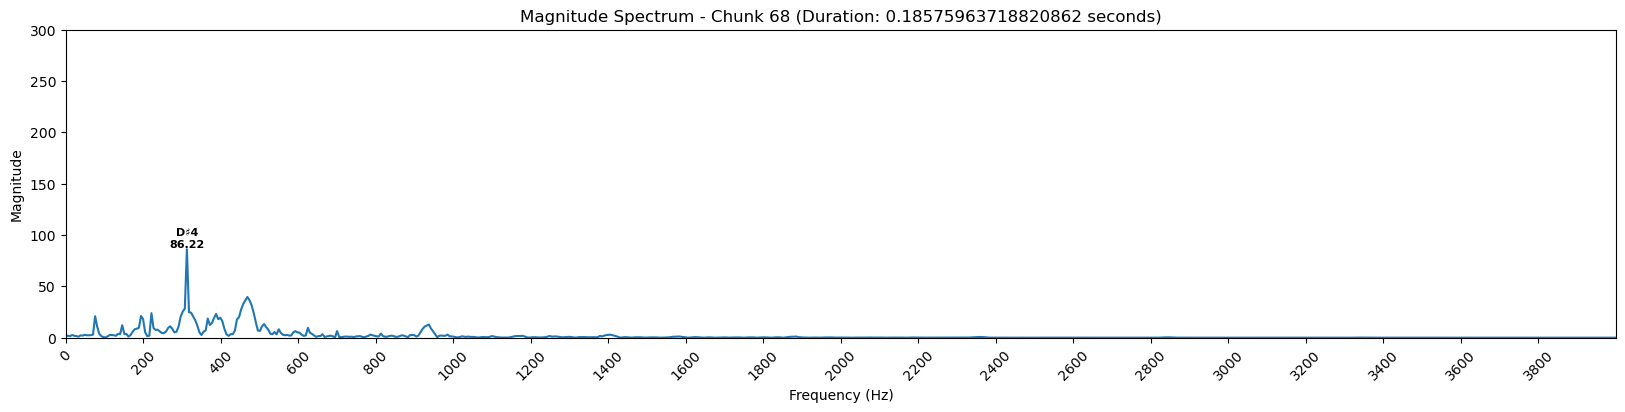

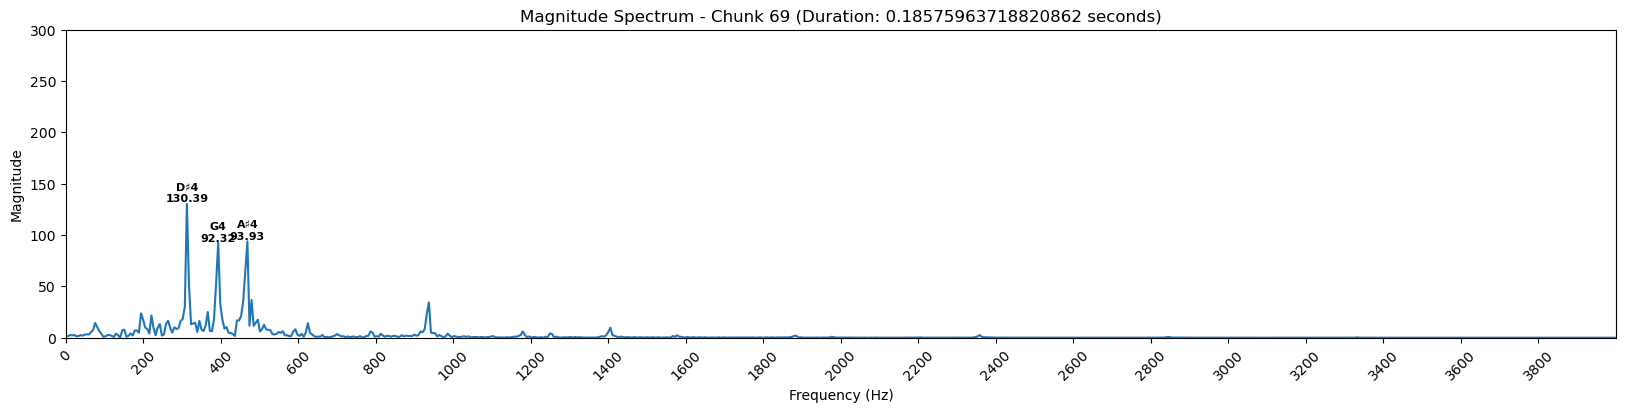

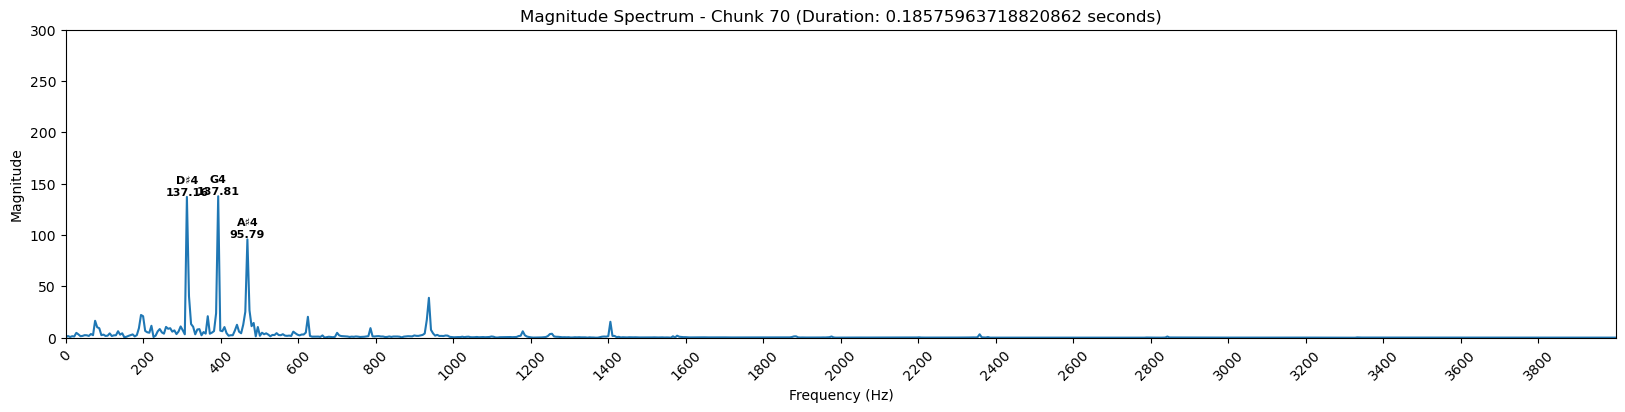

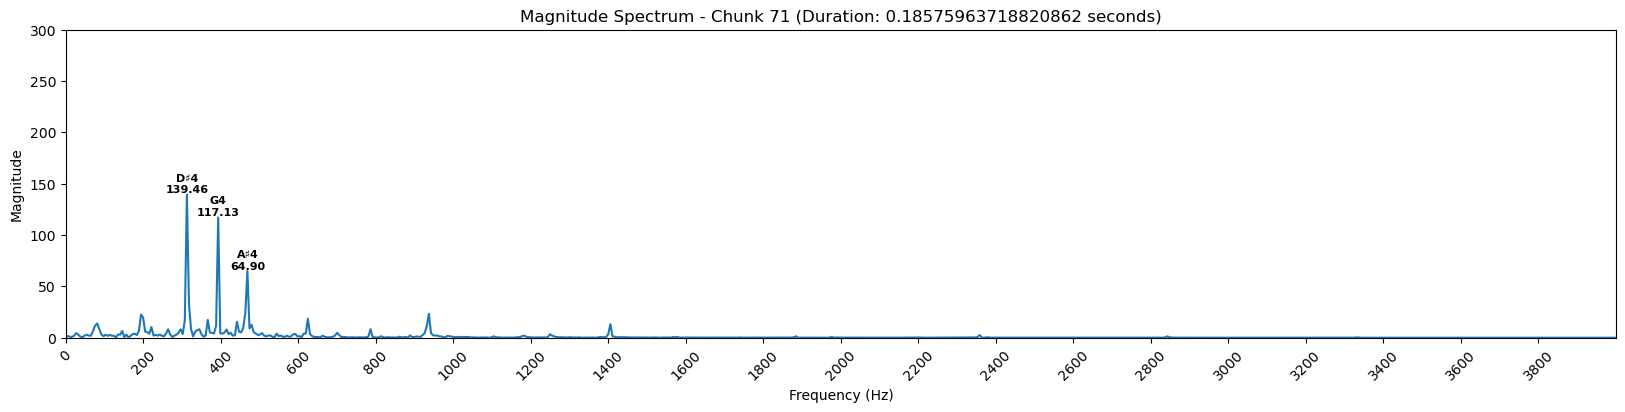

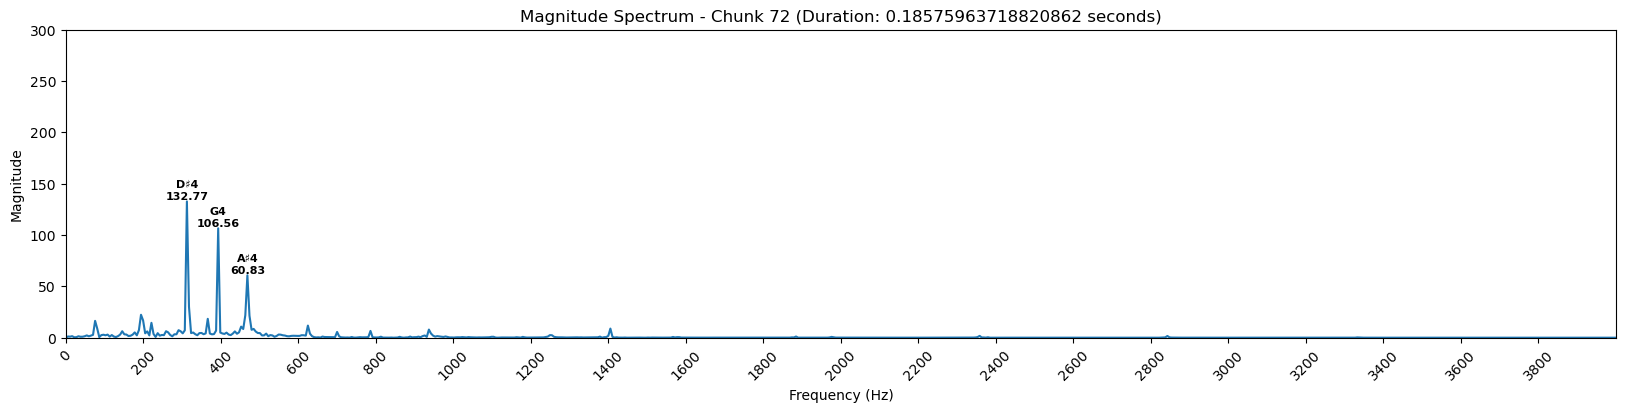

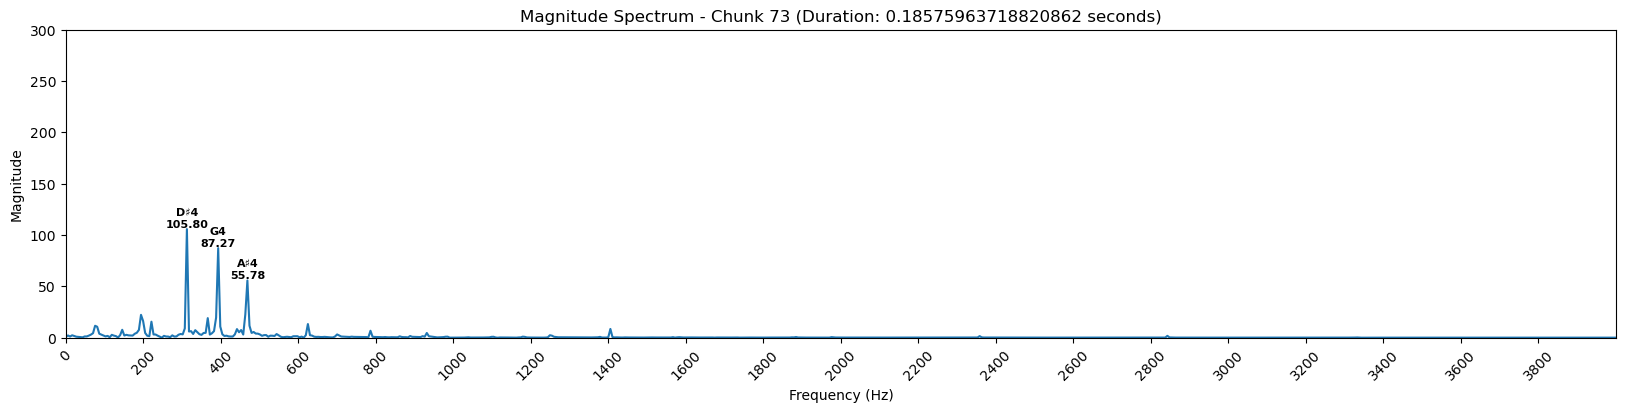

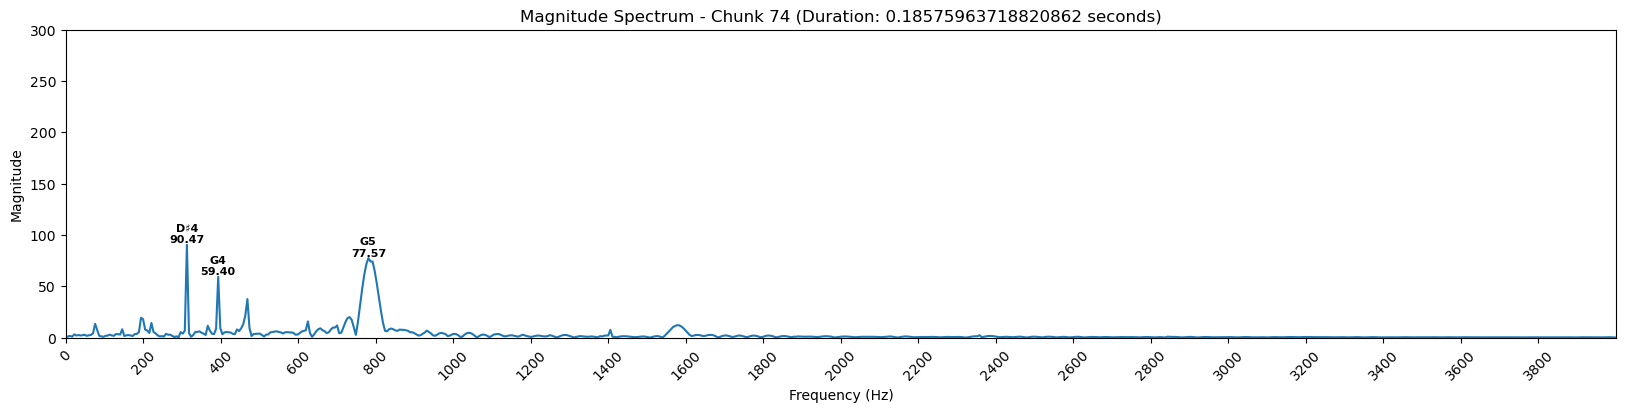

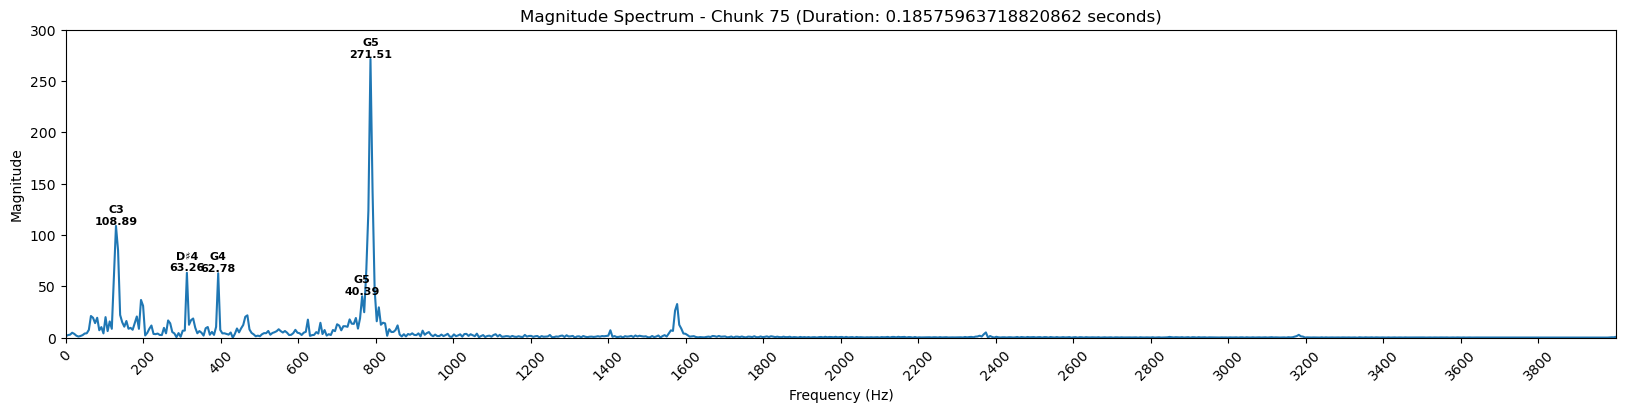

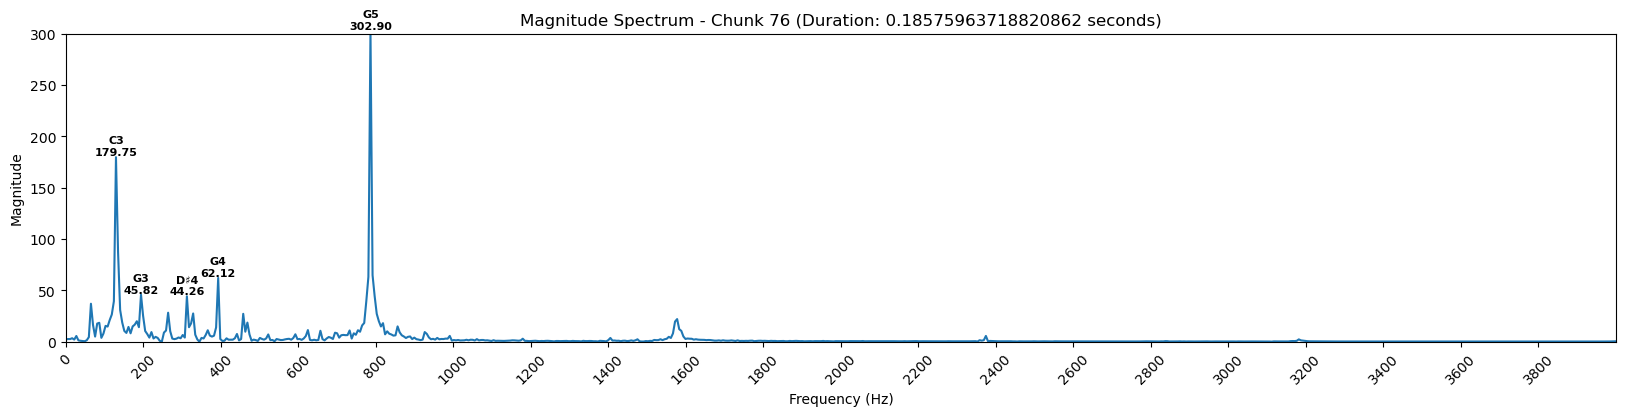

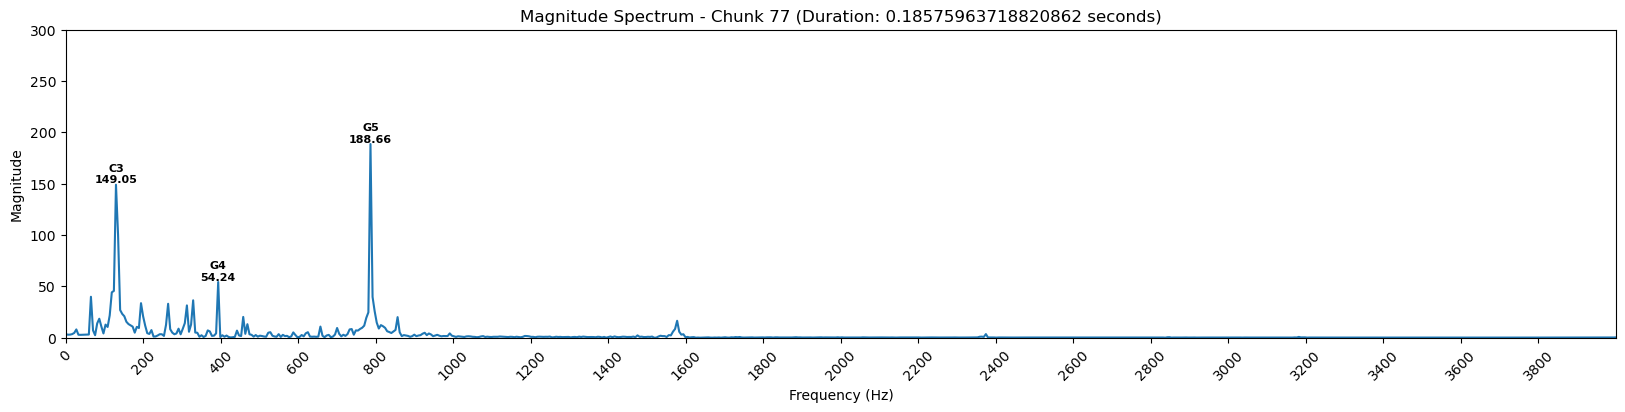

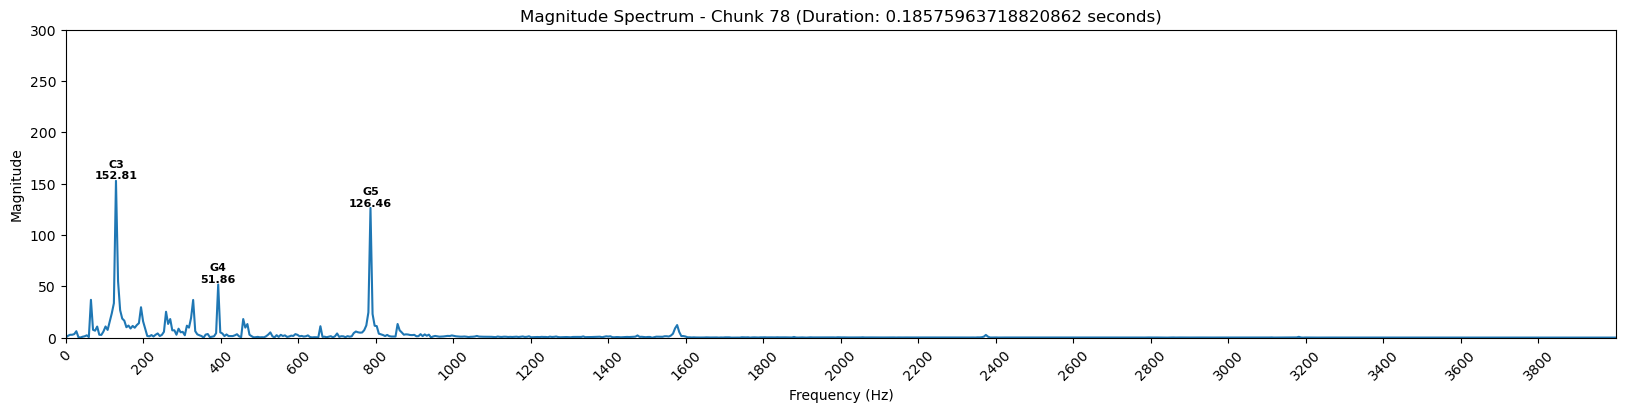

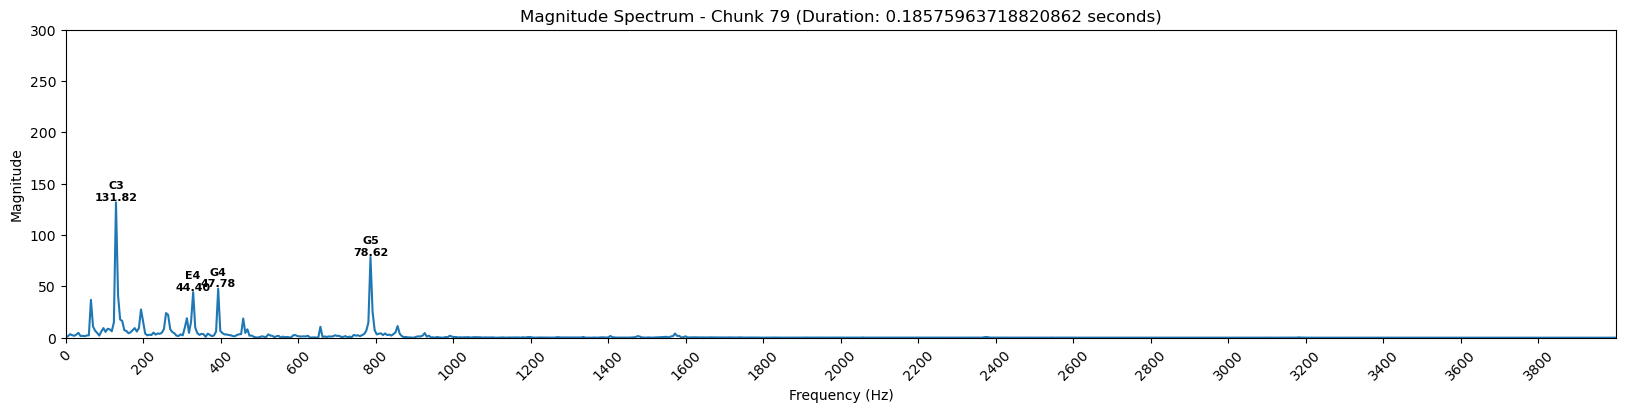

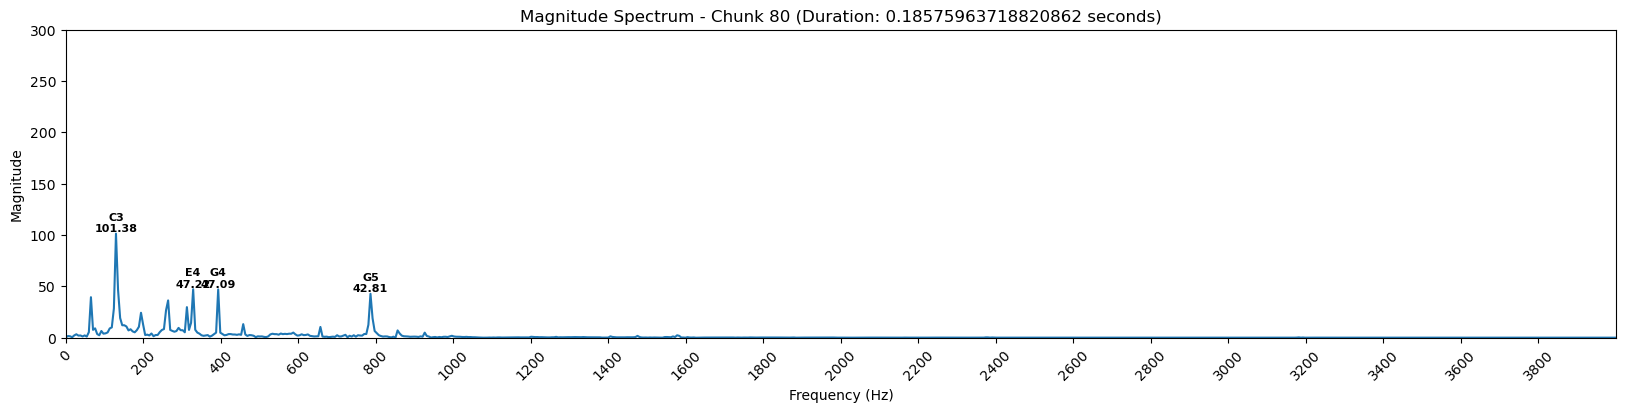

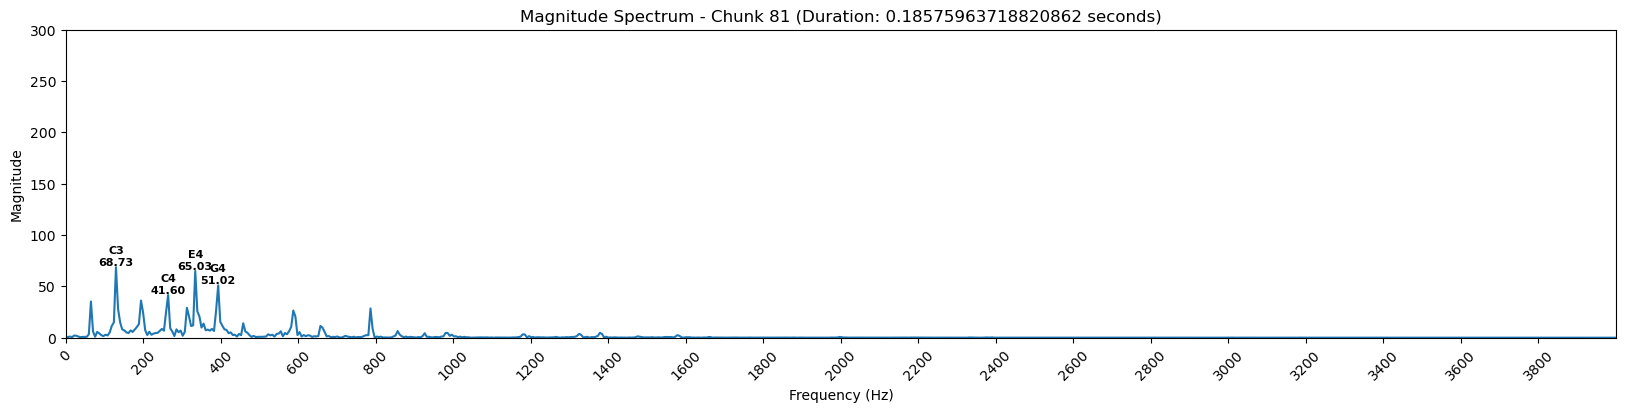

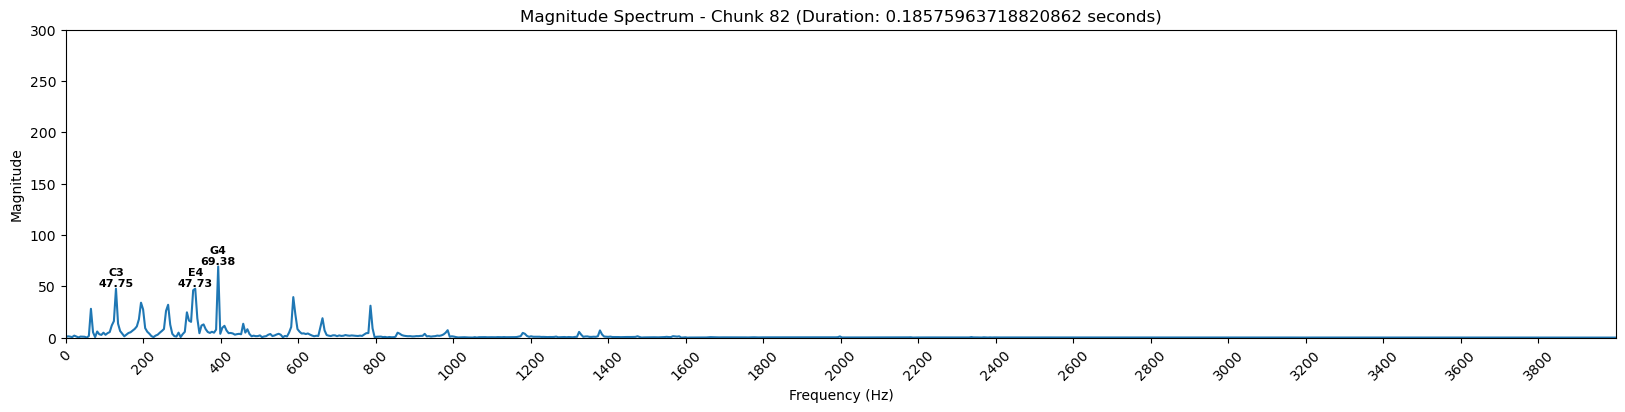

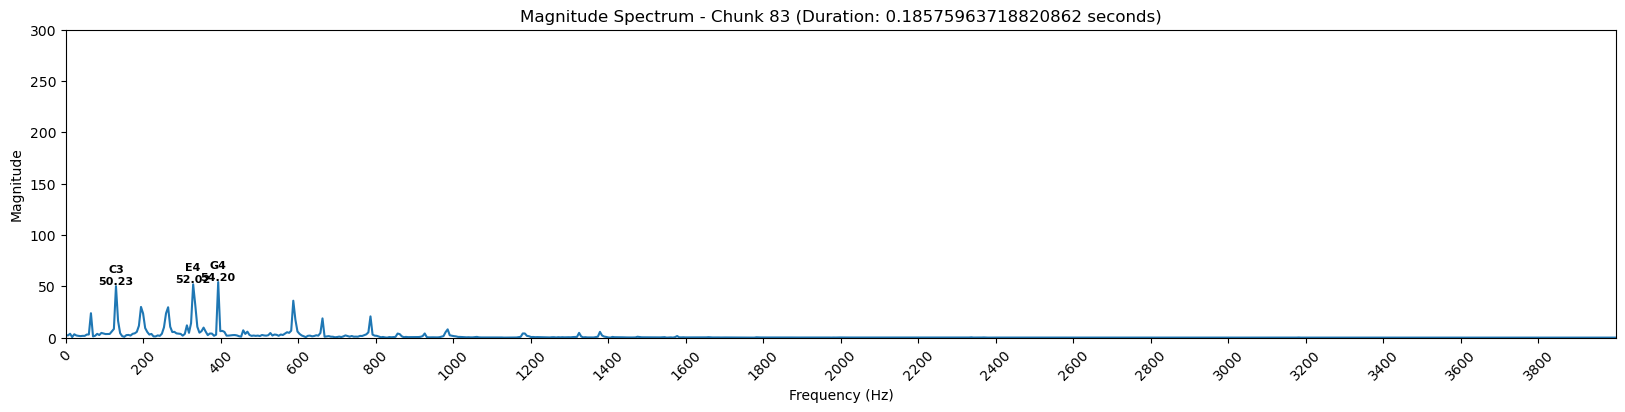

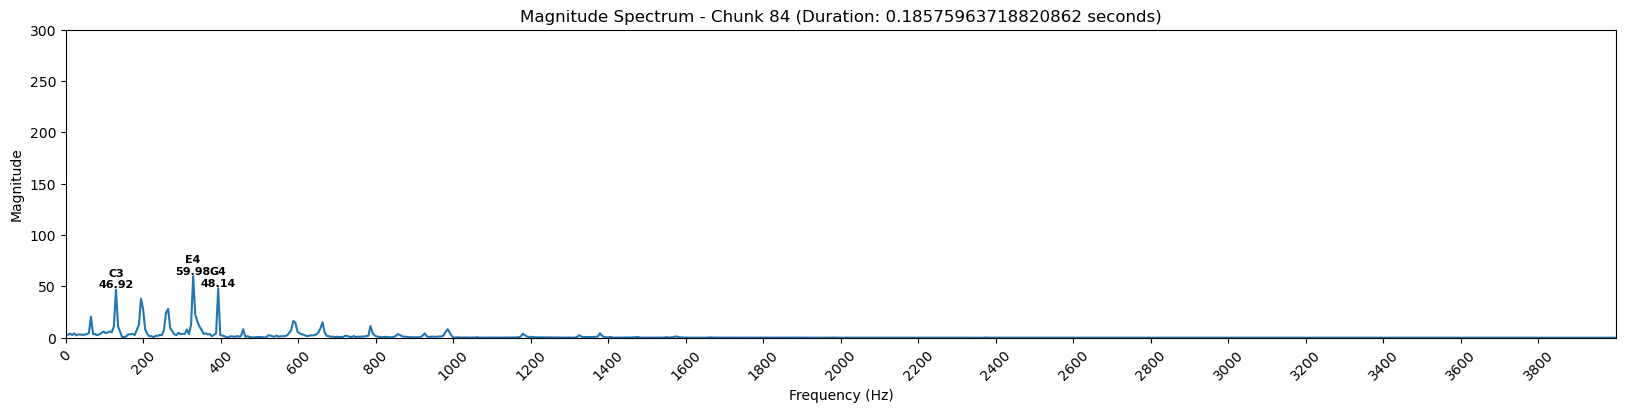

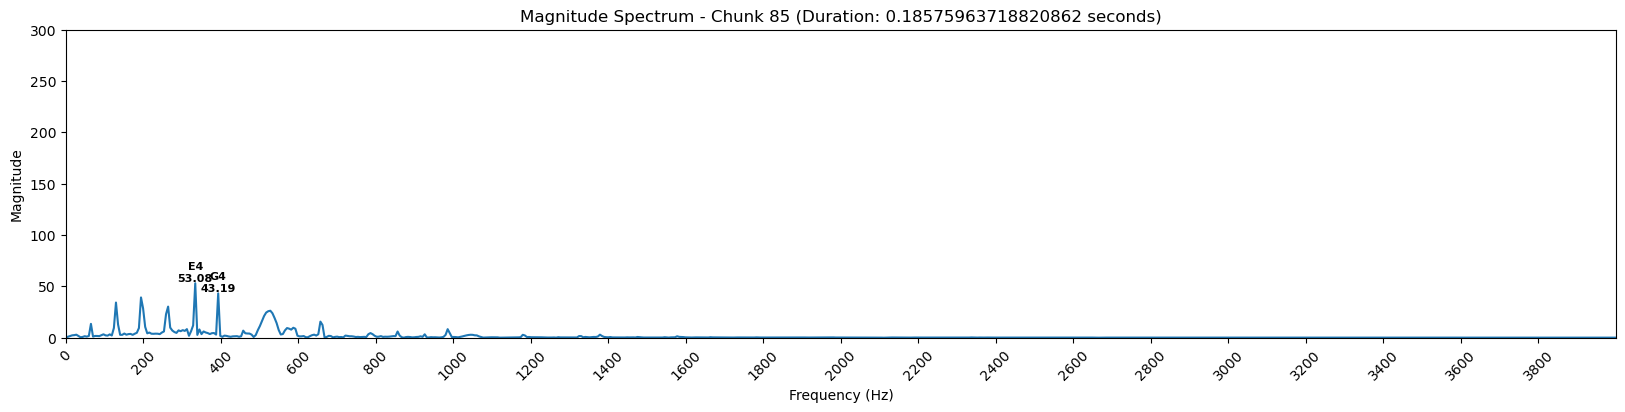

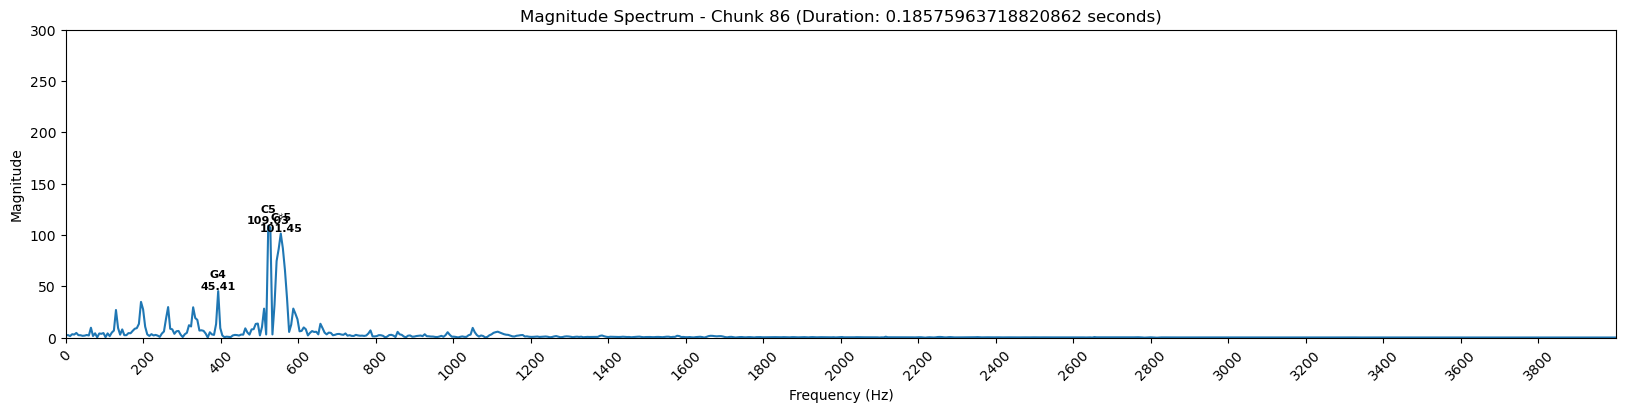

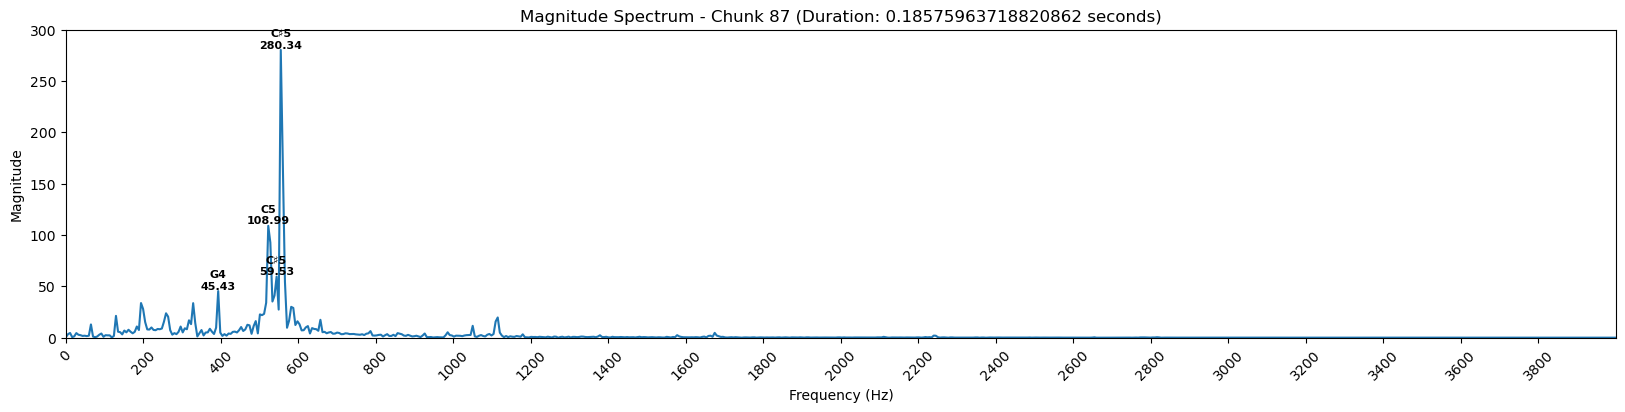

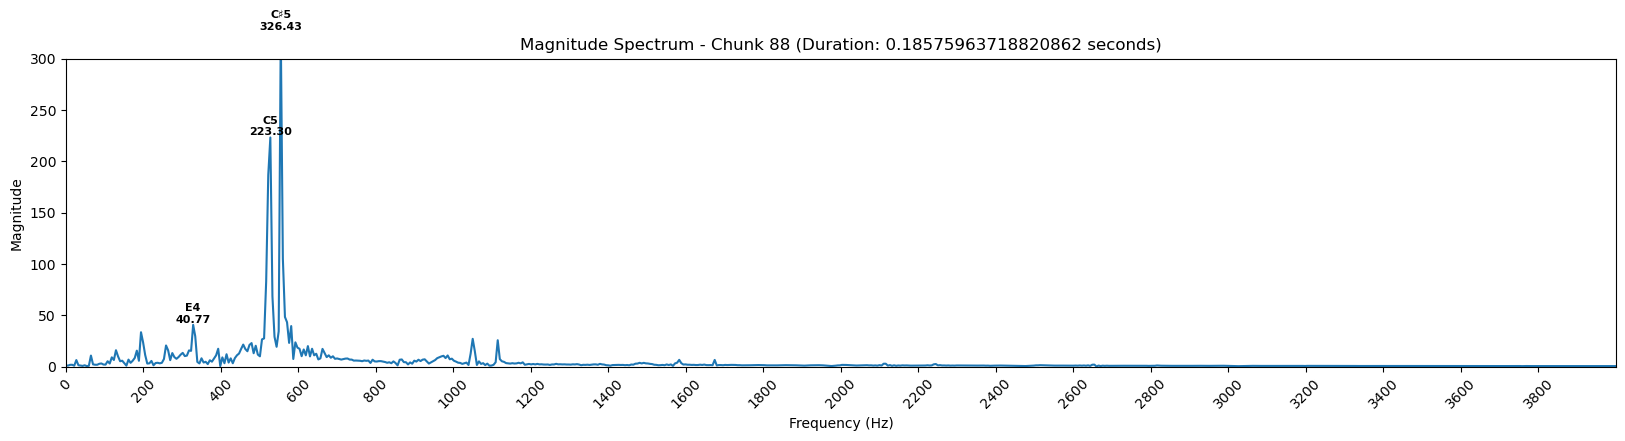

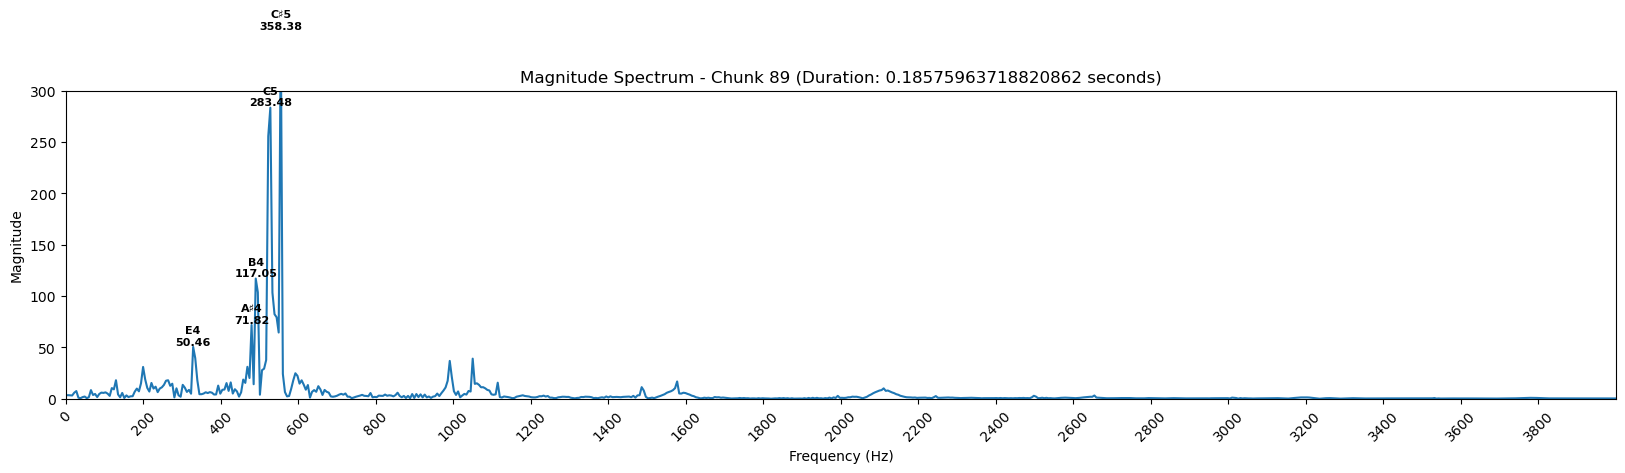

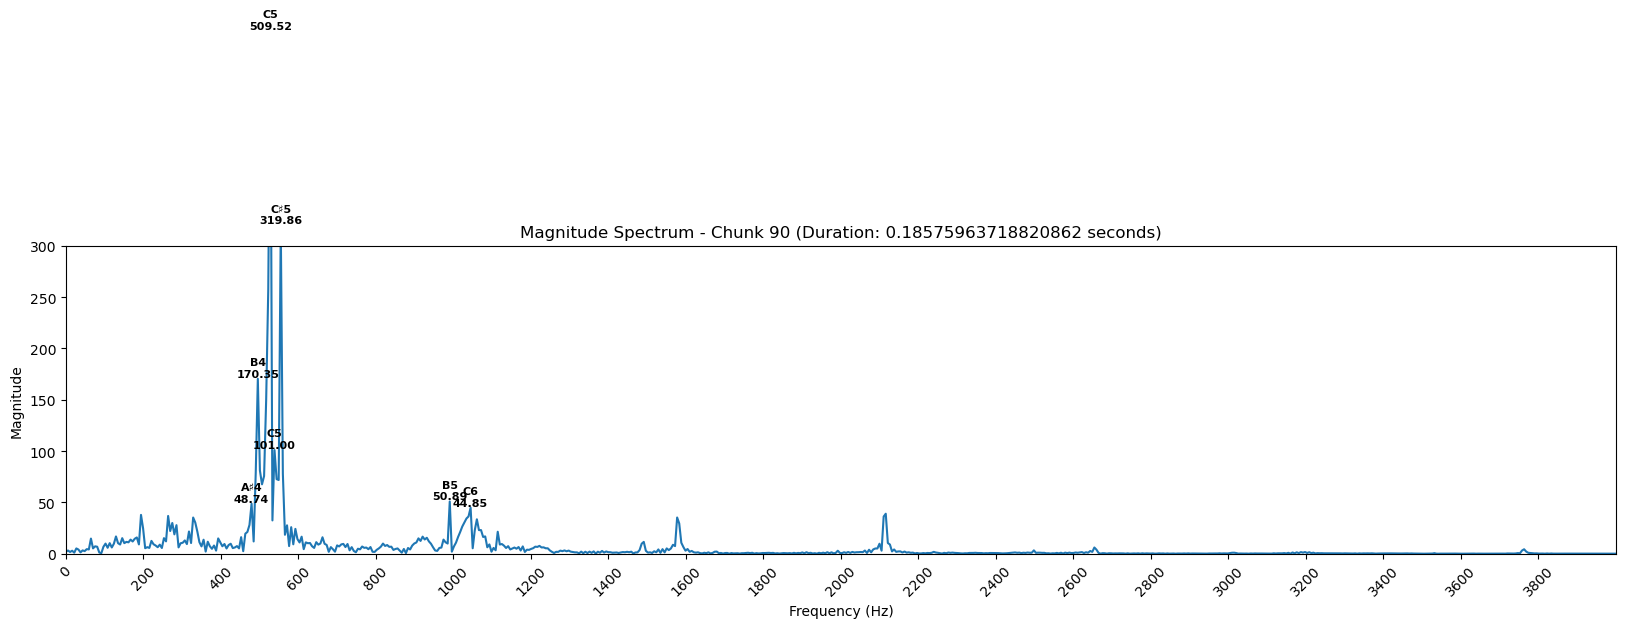

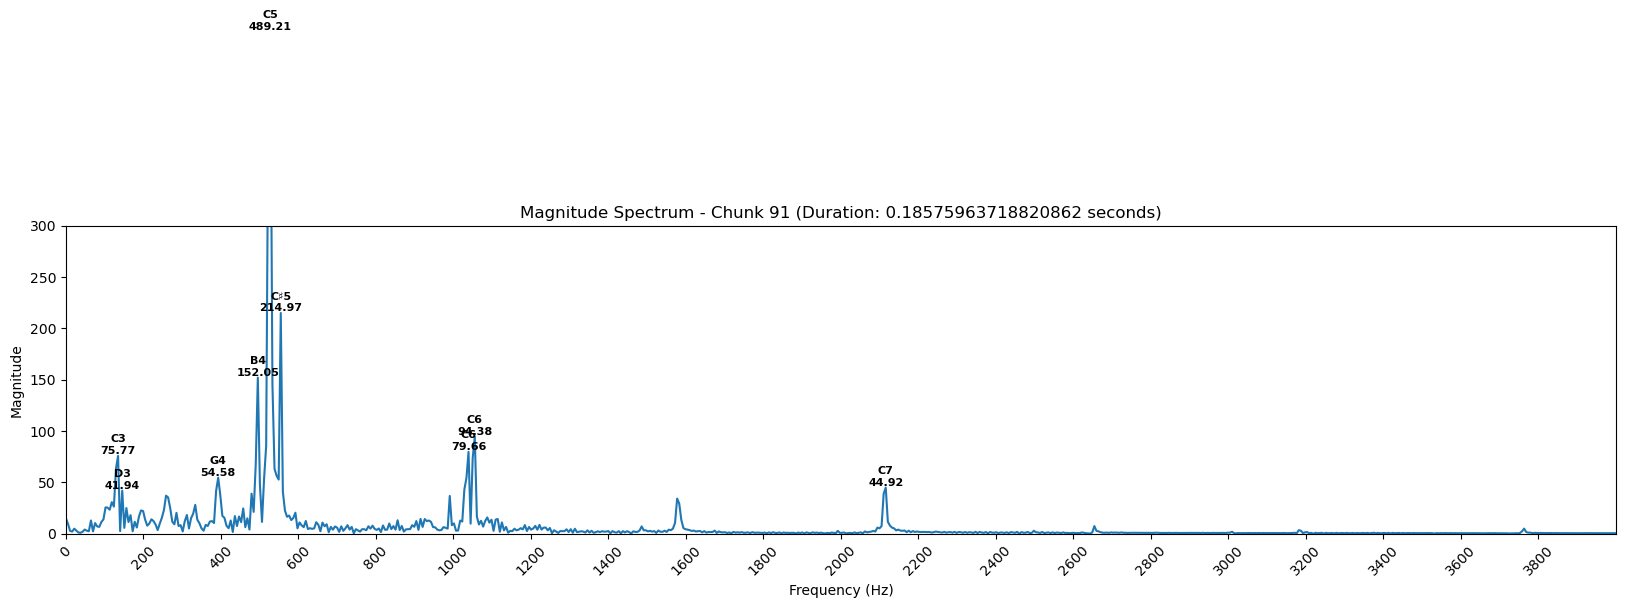

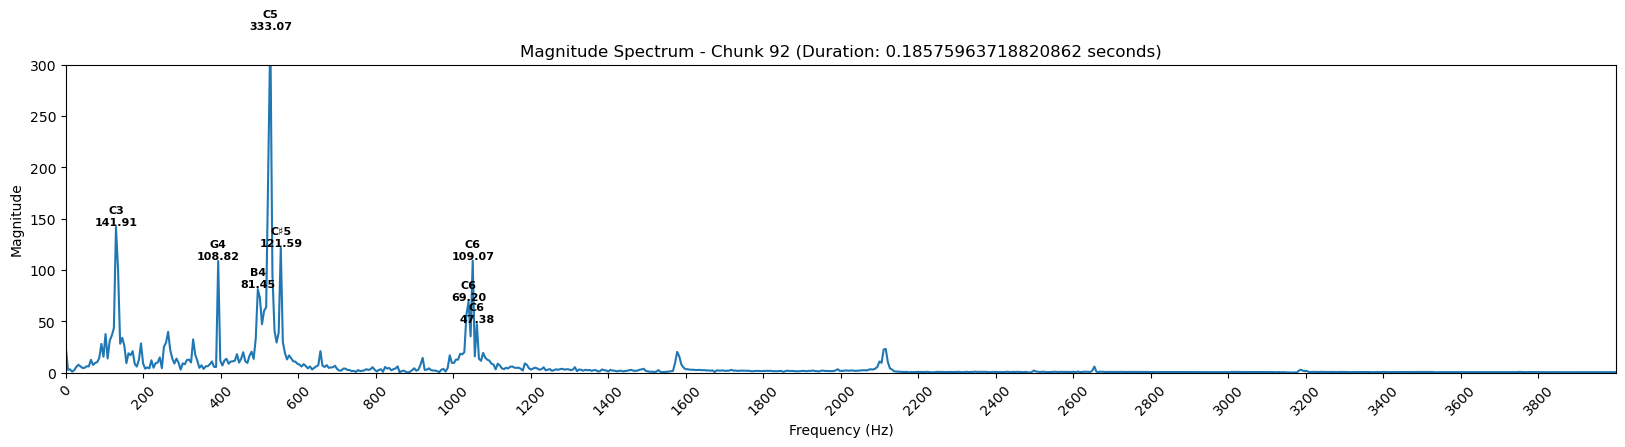

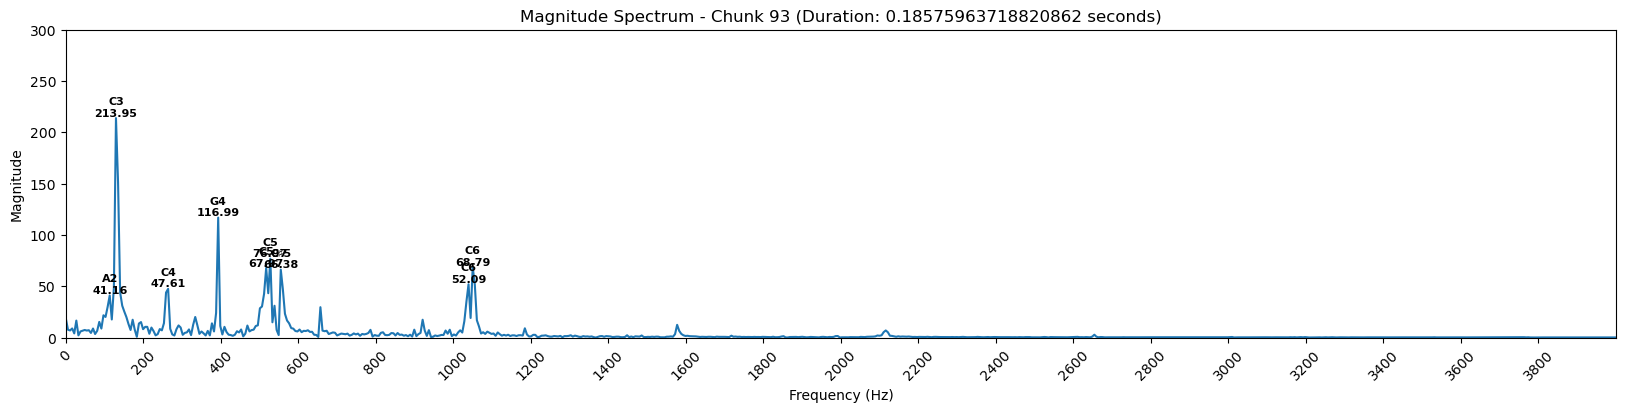

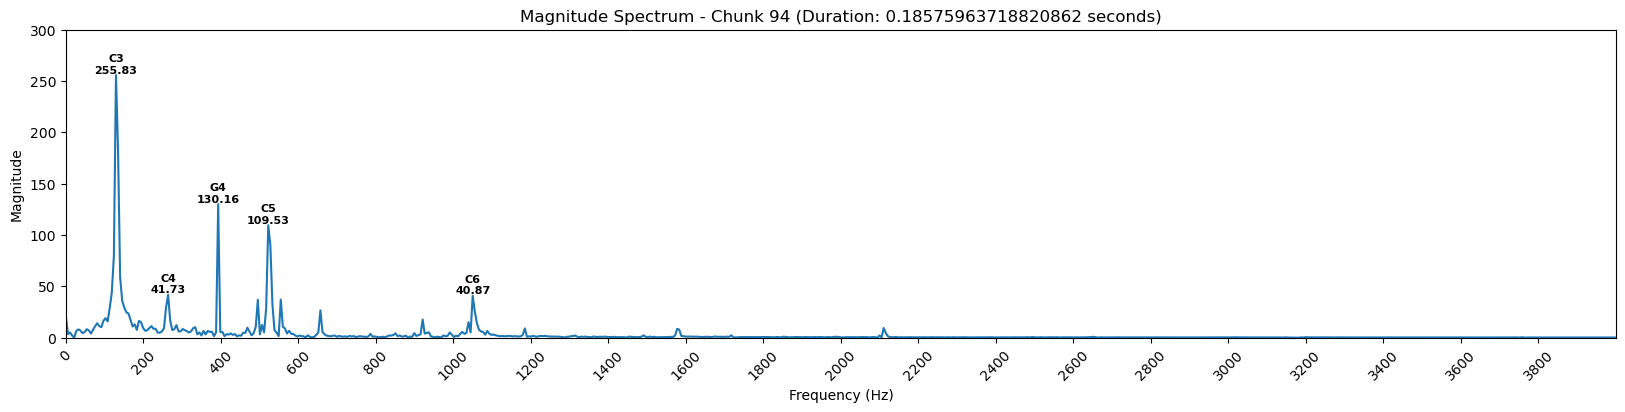

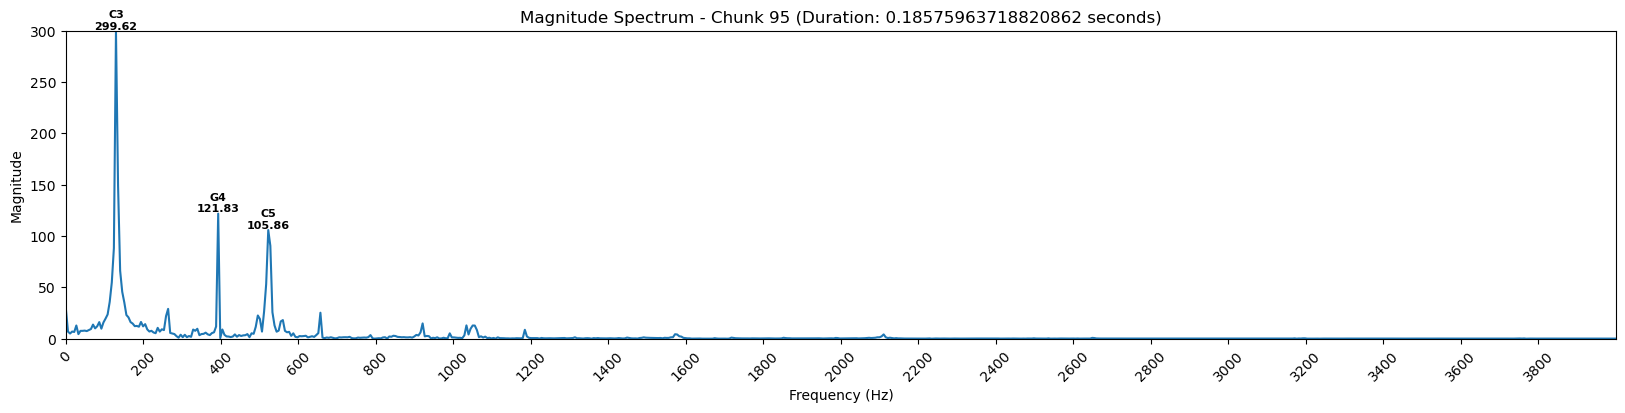

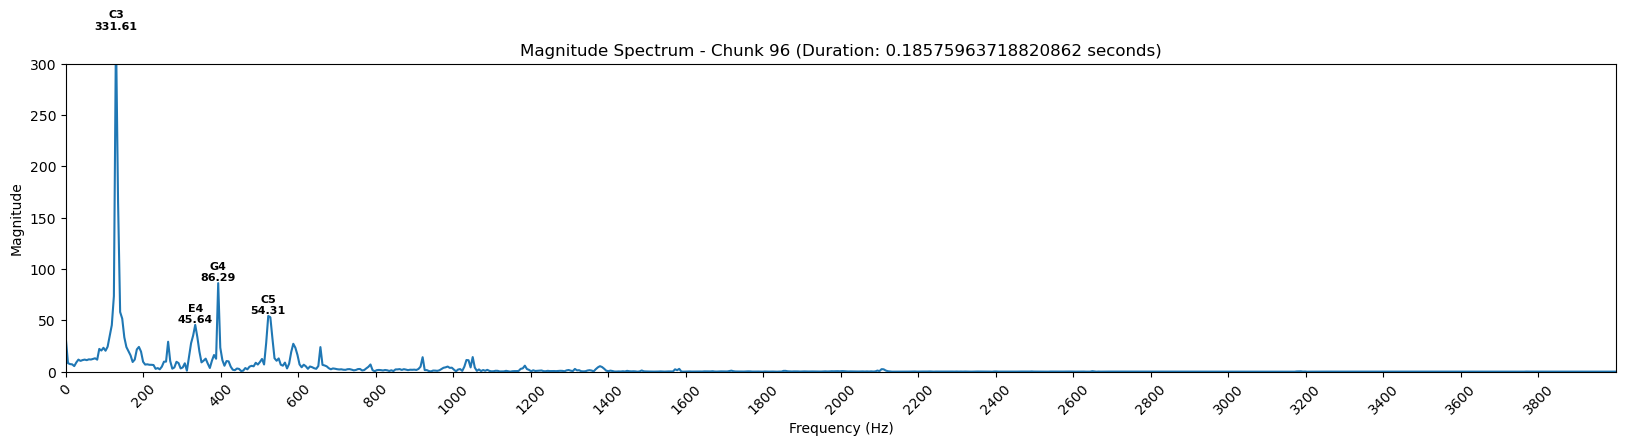

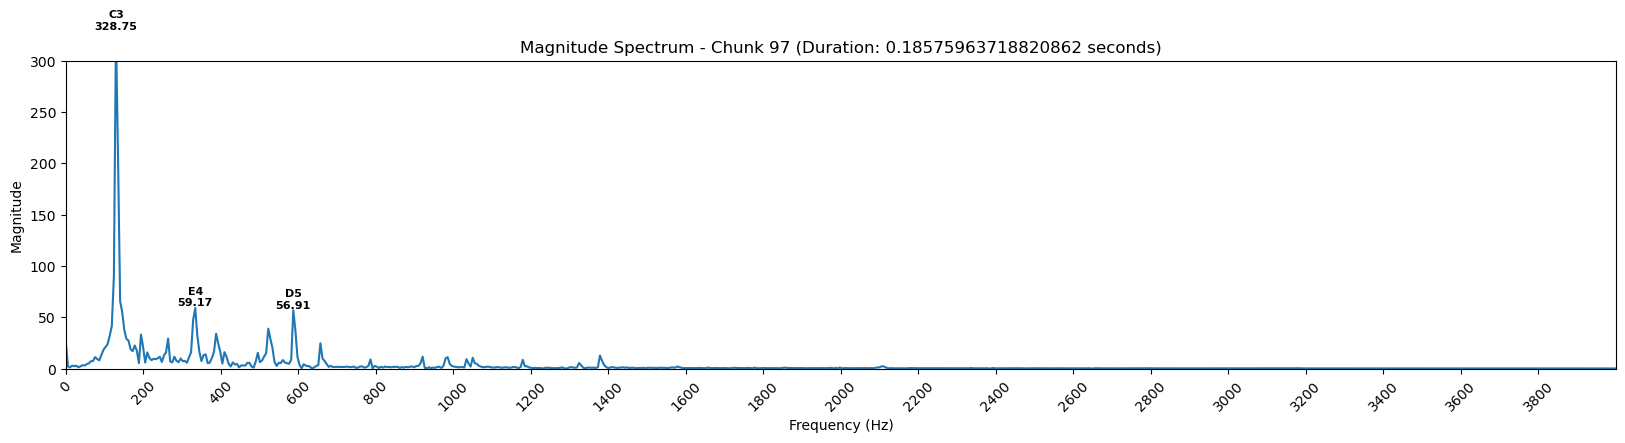

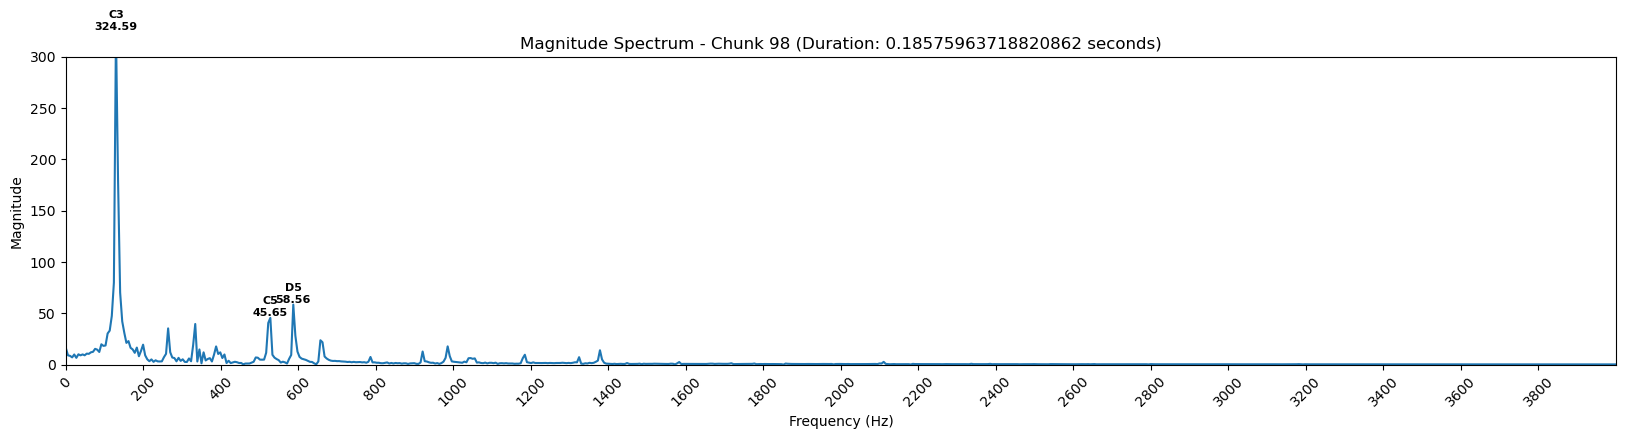

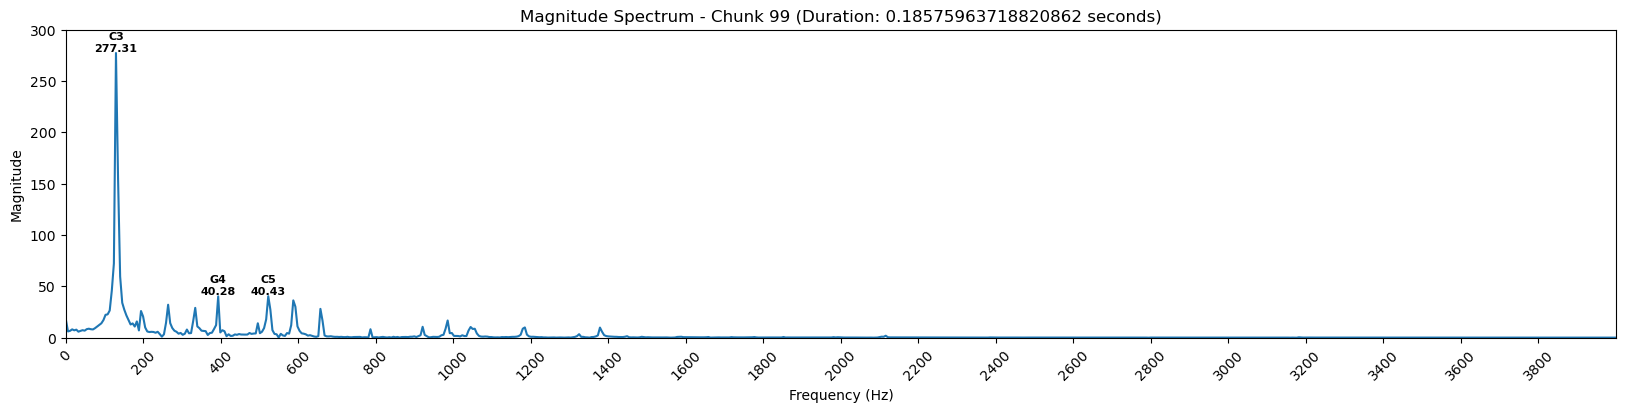

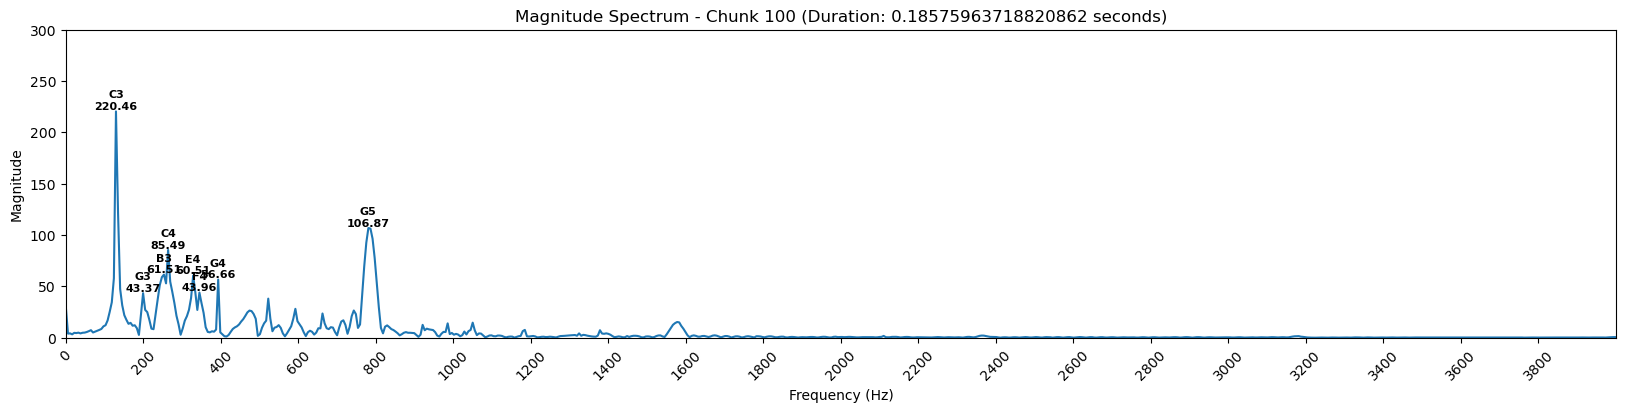

In [29]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the audio file
audio_file = "chopin.wav"
y, sr = librosa.load(audio_file, sr=None)

# Define chunk size and overlap
chunk_size = 8192  # Increase chunk size for higher resolution
overlap = 4096

# MIDI note number for A4 (440 Hz)
A4_note_number = 69

# Function to convert MIDI note number to frequency
def note_number_to_frequency(note_number):
    return 440 * 2 ** ((note_number - 69) / 12)

# Calculate number of chunks
num_chunks = (len(y) - overlap) // (chunk_size - overlap)

# Display FFT plots for the first 25 chunks
for i in range(min(num_chunks, 100)):  # Loop over first 25 chunks or less if the audio has fewer chunks
    start = i * (chunk_size - overlap)
    end = start + chunk_size
    chunk = y[start:end]

    # Perform FFT on the chunk
    fft_result = np.fft.fft(chunk)

    # Calculate frequencies corresponding to FFT result
    frequencies = np.fft.fftfreq(len(chunk), d=1/sr)

    # Keep only positive frequencies
    positive_frequencies = frequencies[:len(chunk)//2]
    magnitude_spectrum = np.abs(fft_result)[:len(chunk)//2]

    # Limit frequencies to 4,000 Hz
    max_frequency_index = np.argmax(positive_frequencies >= 4000)
    positive_frequencies = positive_frequencies[:max_frequency_index]
    magnitude_spectrum = magnitude_spectrum[:max_frequency_index]

    # Find peaks above a certain threshold
    peaks, _ = find_peaks(magnitude_spectrum, height=40)

    # Calculate time duration for the chunk
    duration = chunk_size / sr

    # Plot the magnitude spectrum
    plt.figure(figsize=(20, 4))  # Stretch width
    plt.plot(positive_frequencies, magnitude_spectrum)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum - Chunk {} (Duration: {} seconds)'.format(i+1, duration))
    plt.xticks(np.arange(0, positive_frequencies[-1], 200))  # Set custom x-axis ticks
    plt.xlim(0, positive_frequencies[-1])  # Set x-axis limit to the maximum frequency
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.ylim(0, 300)  # Set y-axis limit to 150

    # Annotate significant peaks with musical notes and amplitude value
    for peak in peaks:
        frequency = positive_frequencies[peak]
        note_number = round(12 * np.log2(frequency / note_number_to_frequency(A4_note_number)) + A4_note_number)
        note_name = librosa.core.midi_to_note(note_number)
        amplitude_value = magnitude_spectrum[peak]
        plt.text(frequency, amplitude_value, f"{note_name}\n{amplitude_value:.2f}", fontsize=8, ha='center', va='bottom', fontweight='bold')

    plt.show()


In [19]:
# Given values
BPM = 115
time_duration_for_chunk = 0.18576

# Calculate chunks per beat
chunks_per_beat = (BPM / 60) * time_duration_for_chunk

print("Chunks per beat:", chunks_per_beat)


Chunks per beat: 0.35604


In [20]:
# Given value
BPM = 115

# Calculate new time duration for chunk
new_time_duration_for_chunk = 60 / BPM

print("New time duration for chunk:", new_time_duration_for_chunk)

New time duration for chunk: 0.5217391304347826
